In [ ]:
import pandas as pd
import os
import sys
import glob

In [ ]:
csv_dir = r'E:\temp\SafeGraph\Social Distancing Metrics v2.1 (formerly Physical Distancing Metrics)\all'
csv_file = r'2020-10-12-social-distancing.csv.gz'
# csv_file = r'2020-10-12-social-distancing.csv'

In [ ]:
# df = pd.read_csv(os.path.join(csv_dir, csv_file), compression='gzip', header=1, sep=' ', quotechar='"', error_bad_lines=False)

df = pd.read_csv(os.path.join(csv_dir, csv_file))

In [ ]:
df.head()

In [ ]:
[print(x) for x in df.columns.to_list()]

In [ ]:
for idx, row in df.iterrows():
    
    interval_num = 10000
    state_id = str(row["origin_census_block_group"])[:2]
    if state_id == "48":
        print(row["origin_census_block_group"])
#     if idx % interval_num == 0:
#         print(row["origin_census_block_group"])

In [ ]:
df_tx = df.copy()

In [ ]:
df_tx = df_tx[0:0]

In [ ]:
df_tx

In [ ]:
files = glob.glob(os.path.join(csv_dir, "*.gz"))
files

In [ ]:
saved_path = r'E:\temp\SafeGraph\Social Distancing Metrics v2.1 (formerly Physical Distancing Metrics)\Texas'
for idx, file in enumerate(files[:]):
#     df_tx = df_tx[0:0]
    df_usa = pd.read_csv(file)
    df_usa["state_id"] = df_usa["origin_census_block_group"].astype(str).str[:2]    
#     df_usa["state_id"] = df_usa["state_id"].str[:2]
    df_filtered = df_usa[df_usa["state_id"] == '48']
    df_filtered = df_filtered.drop(columns=['state_id'])
    
    basename = os.path.basename(file)
    dir_name = os.path.dirname(file)
    new_name = os.path.join(saved_path, basename)
    df_filtered.to_csv(new_name, index=False)

#     state_id = str(row["origin_census_block_group"])[:2]
#     if state_id == "48":
#         print(row["origin_census_block_group"])
        
    print("Processed:", file)

In [ ]:
df_usa["state_id"] = df_usa["origin_census_block_group"].astype(str).str[:2]
# df_usa["state_id"] = df_usa["state_id"].str.slice(start=0, stop=2)
df_usa["state_id"]

In [ ]:
df_filtered = df_usa[df_usa["state_id"] == '48']
df_filtered

In [ ]:
df_filtered

In [ ]:
len(df)

# Extract blockgroups in Brazos

In [ ]:
id_file = r'E:\temp\SafeGraph\texas\brazos\bg_id.csv'
df_bg_ids = pd.read_csv(id_file)
df_bg_ids= df_bg_ids.rename(columns= {"GEOID": "origin_census_block_group"})
df_bg_ids.set_index("origin_census_block_group")
ids_list = df_bg_ids['origin_census_block_group'].tolist()
len(ids_list)

In [ ]:
ids_list[0]

In [ ]:
csv_path = r'E:\temp\SafeGraph\Social Distancing Metrics v2.1 (formerly Physical Distancing Metrics)\Texas'
csv_files = glob.glob(os.path.join(csv_path, "*.gz"))
csv_files

In [1]:
saved_path = r'E:\temp\SafeGraph\texas\brazos\extracted_rows'
for idx, file in enumerate(csv_files[:]):
    print("Processing: ", file)
    basename = os.path.basename(file).replace(".csv.gz", ".csv")
    new_name = os.path.join(saved_path, basename)
    df_tx = pd.read_csv(file)
    joined = df_bg_ids.join(df_tx.set_index("origin_census_block_group"), on='origin_census_block_group')
    joined.to_csv(new_name, index=False)
    
joined

NameError: name 'csv_files' is not defined

In [ ]:
to_blocks = joined["destination_cbgs"]
to_blocks

## extract origin-destination

In [ ]:
csv_path = r'E:\temp\SafeGraph\texas\brazos\extracted_rows'
csv_files = glob.glob(os.path.join(csv_path, "*.csv"))

saved_path = r'E:\temp\SafeGraph\texas\brazos'

csv_files


In [ ]:
def list_to_file(a_list, file_name):
    with open(file_name, mode='w', encoding='utf-8') as myfile:
        myfile.write('\n'.join(a_list))
        myfile.write('\n')

In [ ]:
import json
lines = []
for idx, file in enumerate(csv_files[:]):
    print("Processing: ", file)
    basename = os.path.basename(file) 
    date = basename[:10]
    df = pd.read_csv(file)
    
    for idx, row in df.iterrows():  # for each block group
        try:
            jdata = json.loads(row["destination_cbgs"])
            for key in jdata.keys():
    #             pass
                fields = [date, str(row["origin_census_block_group"]), str(key), str(jdata[key])]
                lines.append(",".join(fields))
#                 print(fields)

        except Exception as e:
            print( idx, e)
 

In [ ]:
csv_file =  r'E:\temp\SafeGraph\texas\brazos\origin-destination.csv'
df_od = pd.read_csv(csv_file)
# list_to_file(["date,origin,destination,count"] + lines, csv_file)

In [ ]:
df_od[df_od["count"] > 1]

In [ ]:
df_od

In [ ]:
df_filtered = df_od[df_od['date'].between("2019-04-01", "2019-04-07")]  
df_filtered.to_csv(r'E:\temp\SafeGraph\texas\brazos\o-d_2019_04_01_week.csv', index=False)

df_filtered

In [ ]:
df_filtered2 = df_od[df_od['date'].between("2020-04-06", "2020-04-12")]   

In [ ]:
df_filtered2.to_csv(r'E:\temp\SafeGraph\texas\brazos\o-d_2020_04_06_week.csv', index=False)

In [ ]:
df_filtered2 

## extract matrix

In [137]:
id_file = r'E:\temp\SafeGraph\texas\brazos\bg_id.csv'
df_bg_ids = pd.read_csv(id_file)
df_bg_ids= df_bg_ids.rename(columns= {"GEOID": "origin_census_block_group"})
df_bg_ids.set_index("origin_census_block_group")
ids_list = df_bg_ids['origin_census_block_group'].tolist()
len(ids_list)

118

In [102]:
df_filtered = pd.read_csv(r'E:\temp\SafeGraph\texas\brazos\origin-destination_weekly.csv')

df_filtered

date        origin   destination  count
0        2019-01-06  480410001011   10030116011      1
1        2019-01-06  480410001011   40159548003      1
2        2019-01-06  480410001011   40179605001      1
3        2019-01-06  480410001011   50690003033      1
4        2019-01-06  480410001011   51190041052      1
...             ...           ...           ...    ...
3391599  2020-10-18  480410020151  484999505002      1
3391600  2020-10-18  480410020151  484999508001      1
3391601  2020-10-18  480410020151  550939603003      1
3391602  2020-10-18  480410020151  550939604001      1
3391603  2020-10-18  480410020151  551091201001      1

[3391604 rows x 4 columns]

In [138]:
id_cnt = len(ids_list)


In [ ]:
# df_filtered = df_filtered2 

In [ ]:
# df_filtered['date'] = pd.to_datetime(df_filtered['date'], format="%Y-%m-%d")

In [104]:
df_filtered['date'] 

0          2019-01-06
1          2019-01-06
2          2019-01-06
3          2019-01-06
4          2019-01-06
              ...    
3391599    2020-10-18
3391600    2020-10-18
3391601    2020-10-18
3391602    2020-10-18
3391603    2020-10-18
Name: date, Length: 3391604, dtype: object

In [ ]:
# df_filtered = df_filtered.set_index("date")
# df_filtered

In [ ]:
# date_list = df_filtered.groupby(df_filtered.index.date).count().index


In [105]:
date_list  = df_filtered['date'].unique() 
date_list = list(date_list)
date_list

['2019-01-06',
 '2019-01-13',
 '2019-01-20',
 '2019-01-27',
 '2019-02-03',
 '2019-02-10',
 '2019-02-17',
 '2019-02-24',
 '2019-03-03',
 '2019-03-10',
 '2019-03-17',
 '2019-03-24',
 '2019-03-31',
 '2019-04-07',
 '2019-04-14',
 '2019-04-21',
 '2019-04-28',
 '2019-05-05',
 '2019-05-12',
 '2019-05-19',
 '2019-05-26',
 '2019-06-02',
 '2019-06-09',
 '2019-06-16',
 '2019-06-23',
 '2019-06-30',
 '2019-07-07',
 '2019-07-14',
 '2019-07-21',
 '2019-07-28',
 '2019-08-04',
 '2019-08-11',
 '2019-08-18',
 '2019-08-25',
 '2019-09-01',
 '2019-09-08',
 '2019-09-15',
 '2019-09-22',
 '2019-09-29',
 '2019-10-06',
 '2019-10-13',
 '2019-10-20',
 '2019-10-27',
 '2019-11-03',
 '2019-11-10',
 '2019-11-17',
 '2019-11-24',
 '2019-12-01',
 '2019-12-08',
 '2019-12-15',
 '2019-12-22',
 '2019-12-29',
 '2020-01-05',
 '2020-01-12',
 '2020-01-19',
 '2020-01-26',
 '2020-02-02',
 '2020-02-09',
 '2020-02-16',
 '2020-02-23',
 '2020-03-01',
 '2020-03-08',
 '2020-03-15',
 '2020-03-22',
 '2020-03-29',
 '2020-04-05',
 '2020-04-

In [130]:
df_filtered['count'].sum()

26919758

In [139]:
bg_idx_dict = {}

for idx, x in enumerate(ids_list):
    bg_idx_dict[x]=idx 

In [140]:
bg_idx_dict

{480419800001: 0,
 480410020151: 1,
 480410004003: 2,
 480410014001: 3,
 480410006031: 4,
 480410005002: 5,
 480410005001: 6,
 480410019003: 7,
 480410007003: 8,
 480410007001: 9,
 480410006044: 10,
 480410002012: 11,
 480410013023: 12,
 480410005005: 13,
 480410008001: 14,
 480410002025: 15,
 480410006042: 16,
 480410014003: 17,
 480410002023: 18,
 480410016012: 19,
 480410020101: 20,
 480410011004: 21,
 480410009002: 22,
 480410020141: 23,
 480410007004: 24,
 480410007002: 25,
 480410004002: 26,
 480410002021: 27,
 480410016042: 28,
 480410003001: 29,
 480410013012: 30,
 480410013033: 31,
 480410006032: 32,
 480410001011: 33,
 480410006041: 34,
 480410002024: 35,
 480410003004: 36,
 480410019005: 37,
 480410008002: 38,
 480410006034: 39,
 480410010004: 40,
 480410017021: 41,
 480410010001: 42,
 480410016061: 43,
 480410006033: 44,
 480410005004: 45,
 480410018041: 46,
 480410020091: 47,
 480410013034: 48,
 480410011003: 49,
 480410008004: 50,
 480410013031: 51,
 480410001014: 52,
 48

In [141]:
date_idx_dict = {}

for idx, x in enumerate(date_list):
    date_idx_dict[x]=idx 

In [142]:


# mob_arr_dict = {}
day_cnt = len(date_list)

out_county = np.zeros((day_cnt,), dtype=int)
    
mob_arr = np.zeros([day_cnt, id_cnt, id_cnt], dtype=int)

# ids_list = [str(x) for x in ids_list]

interval = len(df_filtered) / 10000
interval = int(interval)
   
for idx, row in df_filtered[:].iterrows():
    ori = row['origin']
    des = row['destination']
    day = row['date']    
    

#     print(interval)

    interval = 100000
    
    if idx % interval == 0:
        print("Processing row: ", idx)    
    
    try:        

        ori_idx = bg_idx_dict[ori]
        day_idx = date_idx_dict[day]
        
    except:
        continue

    try:
        des_idx = bg_idx_dict[des]

    except:
        out_county[day_idx] += row['count']
#         print(des)
        continue

#     print(day_idx, ori, des)
    
    mob_arr[day_idx][ori_idx][des_idx] += row['count']

print(mob_arr.sum() )       
#     print(row['origin'])

Processing row:  0
Processing row:  100000
Processing row:  200000
Processing row:  300000
Processing row:  400000
Processing row:  500000
Processing row:  600000
Processing row:  700000
Processing row:  800000
Processing row:  900000
Processing row:  1000000
Processing row:  1100000
Processing row:  1200000
Processing row:  1300000
Processing row:  1400000
Processing row:  1500000
Processing row:  1600000
Processing row:  1700000
Processing row:  1800000
Processing row:  1900000
Processing row:  2000000
Processing row:  2100000
Processing row:  2200000
Processing row:  2300000
Processing row:  2400000
Processing row:  2500000
Processing row:  2600000
Processing row:  2700000
Processing row:  2800000
Processing row:  2900000
Processing row:  3000000
Processing row:  3100000
Processing row:  3200000
Processing row:  3300000
22340007


In [143]:
for i in range(mob_arr.shape[0]):
    print(mob_arr[i].sum()) 

175380
253895
291909
286576
307318
321368
325949
321287
325694
309501
232185
336558
327613
324815
332566
303815
343926
318770
299128
264197
251951
242565
256162
246591
247983
223504
207394
219363
217674
215736
224974
235698
264283
288625
297185
376494
390411
382767
356364
337062
298873
282193
288306
285275
283985
292002
282490
193764
248702
232899
202738
157626
172824
196529
211285
205311
227948
277723
269741
254508
266255
283104
172260
160438
145898
148396
142636
137356
147144
151180
159085
156554
164186
167644
171948
172404
161272
163085
157227
161800
162684
165434
172996
173375
178346
181101
172987
212233
224482
219059
214369
231625
256480
35006


In [144]:
out_county

array([ 68664,  60210,  33637,  33677,  37285,  39979,  43625,  45636,
        44676,  70840, 134958,  43287,  43230,  44179,  40824,  72765,
        53391,  42564,  61410,  77233,  78045,  68767,  49161,  51071,
        51360,  49092,  55395,  46189,  46639,  45447,  50450,  60099,
        58684,  42755,  44405,  53121,  50124,  45759,  62256,  55313,
        39862,  48642,  41777,  40312,  43023,  35493,  39475, 118391,
        28870,  49286,  76522,  91156,  77097,  53770,  35831,  33116,
        36366,  39235,  42234,  43363,  42246,  80471, 143344,  64872,
        54518,  38313,  35145,  33785,  36928,  31712,  32496,  35536,
        41212,  41970,  43834,  41951,  39301,  34468,  37085,  34553,
        34747,  35469,  37793,  36433,  34902,  30355,  26602,  37321,
        35245,  34239,  31252,  43491,  43059,   5080])

In [145]:
out_county.sum()

4579751

## head map

In [146]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm
from colorspacious import cspace_converter
from collections import OrderedDict

cmaps = OrderedDict()


In [147]:
mob_arr.shape

(94, 118, 118)

In [148]:
mob_arr[6, :, :] 

array([[   0,    0,    0, ...,    0,    0,    0],
       [   8, 6708,    0, ...,   28,   78,   45],
       [   0,    0,    0, ...,    0,    0,    0],
       ...,
       [   8,   95,    4, ..., 2171,   19,   47],
       [   4,  958,    2, ...,   59, 4858,  220],
       [   6,  133,    0, ...,   78,   26, 3374]])

clean diagonal line

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


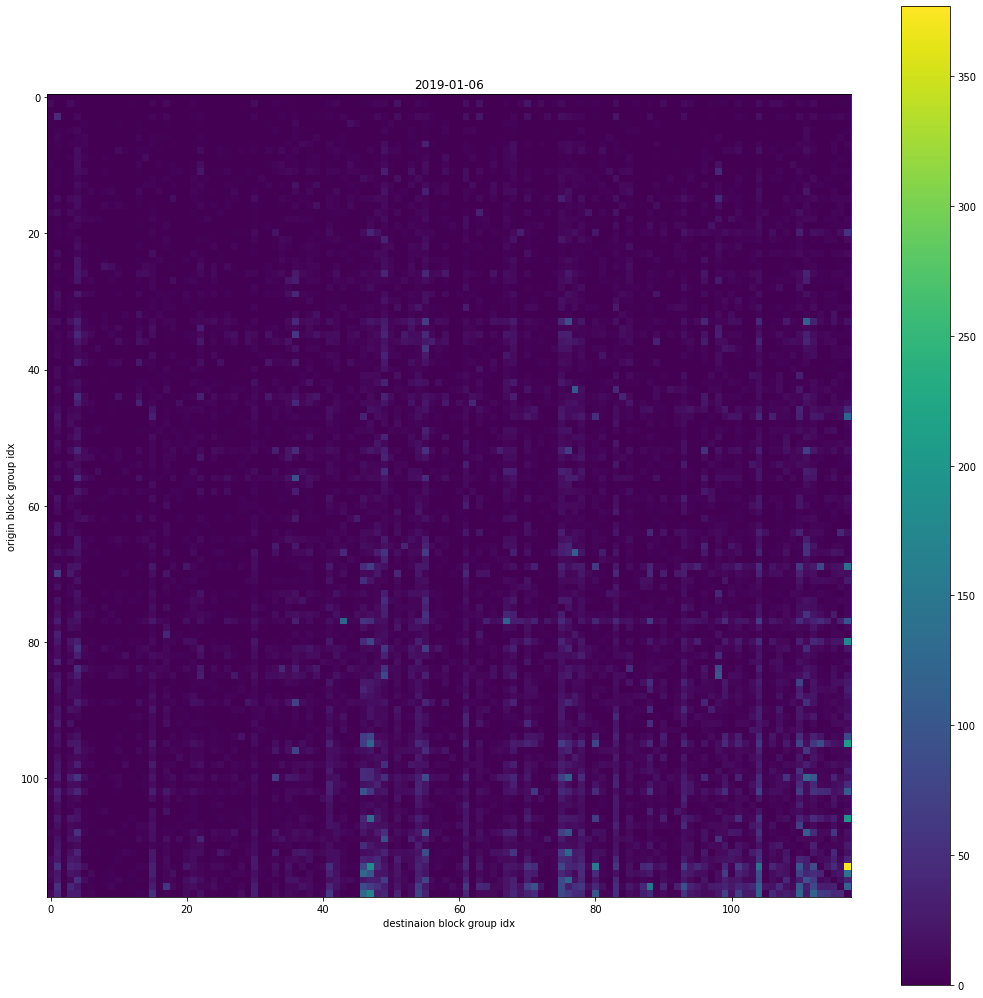

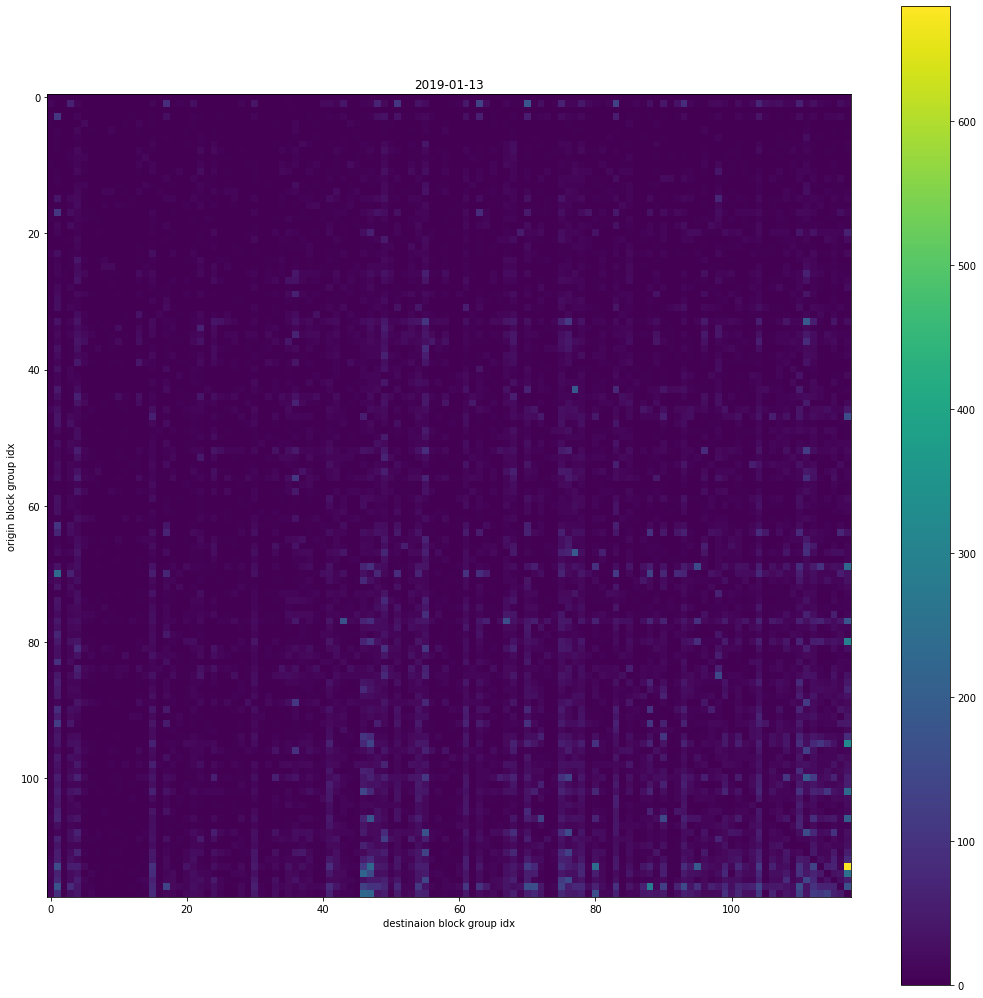

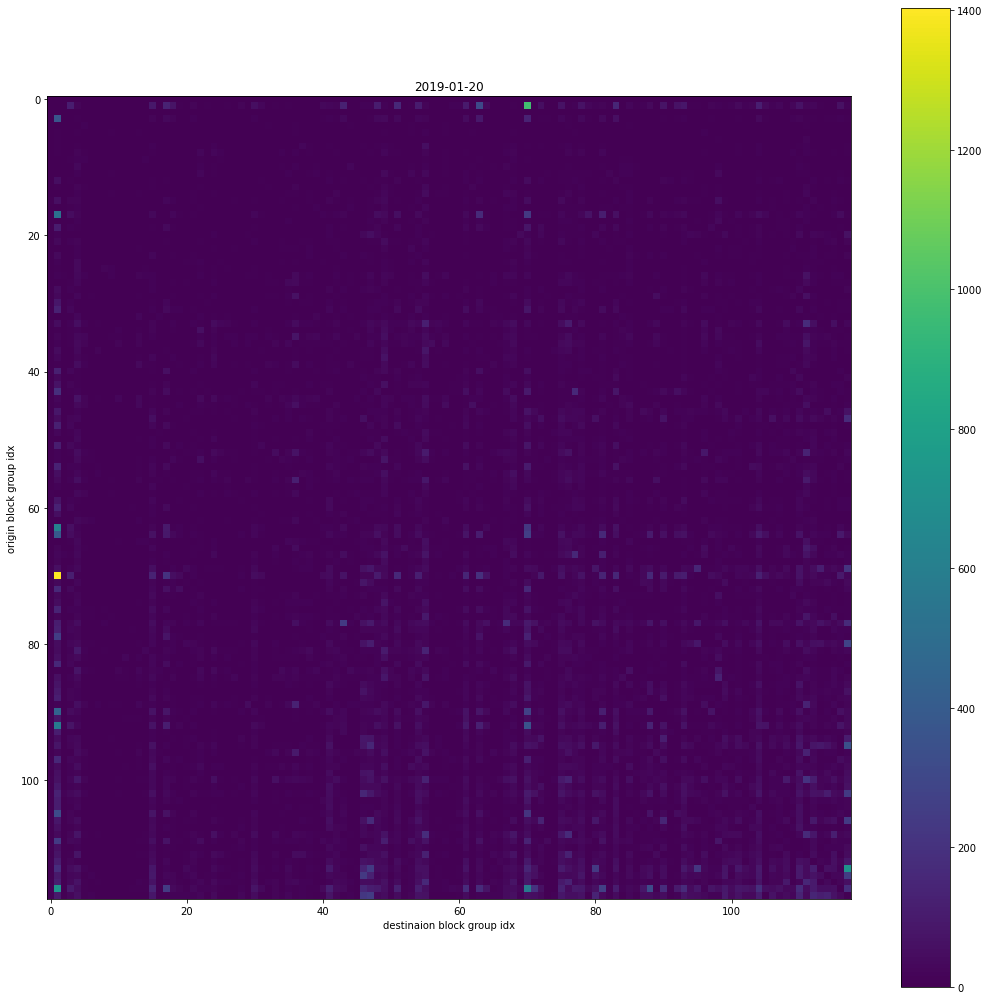

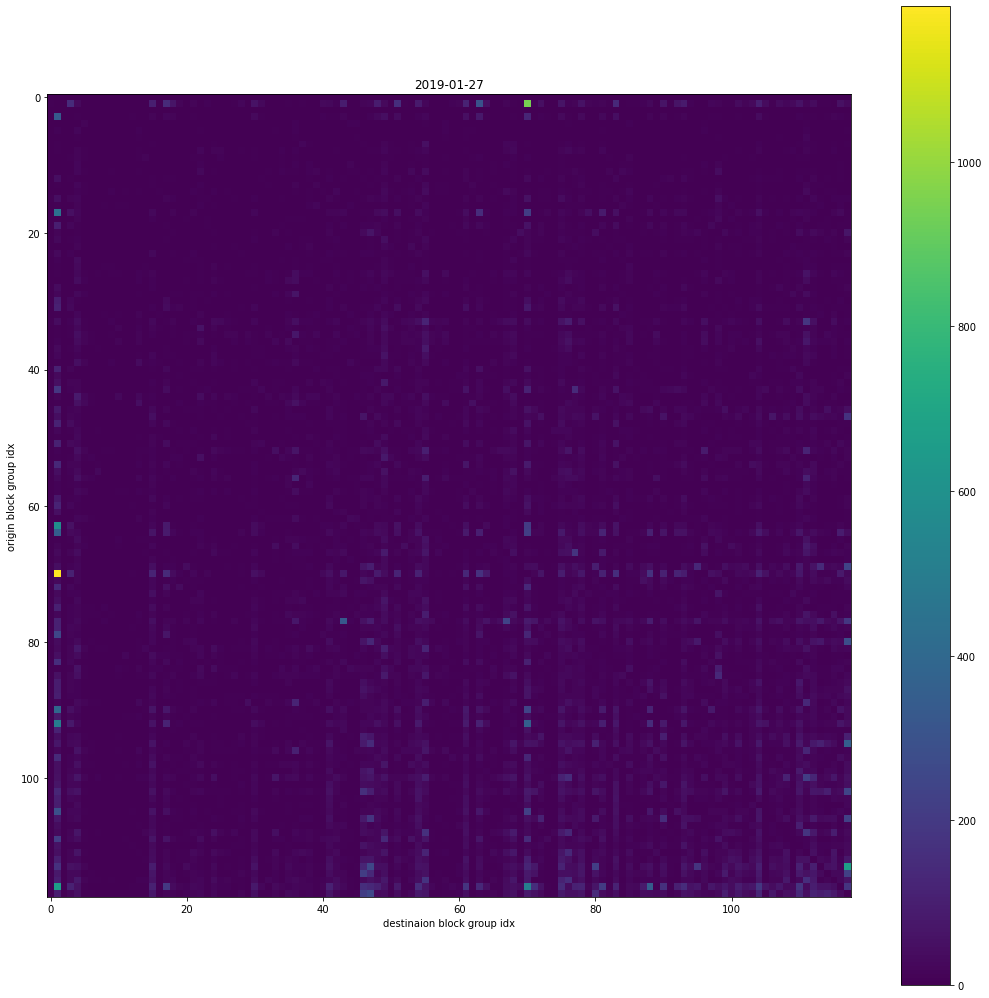

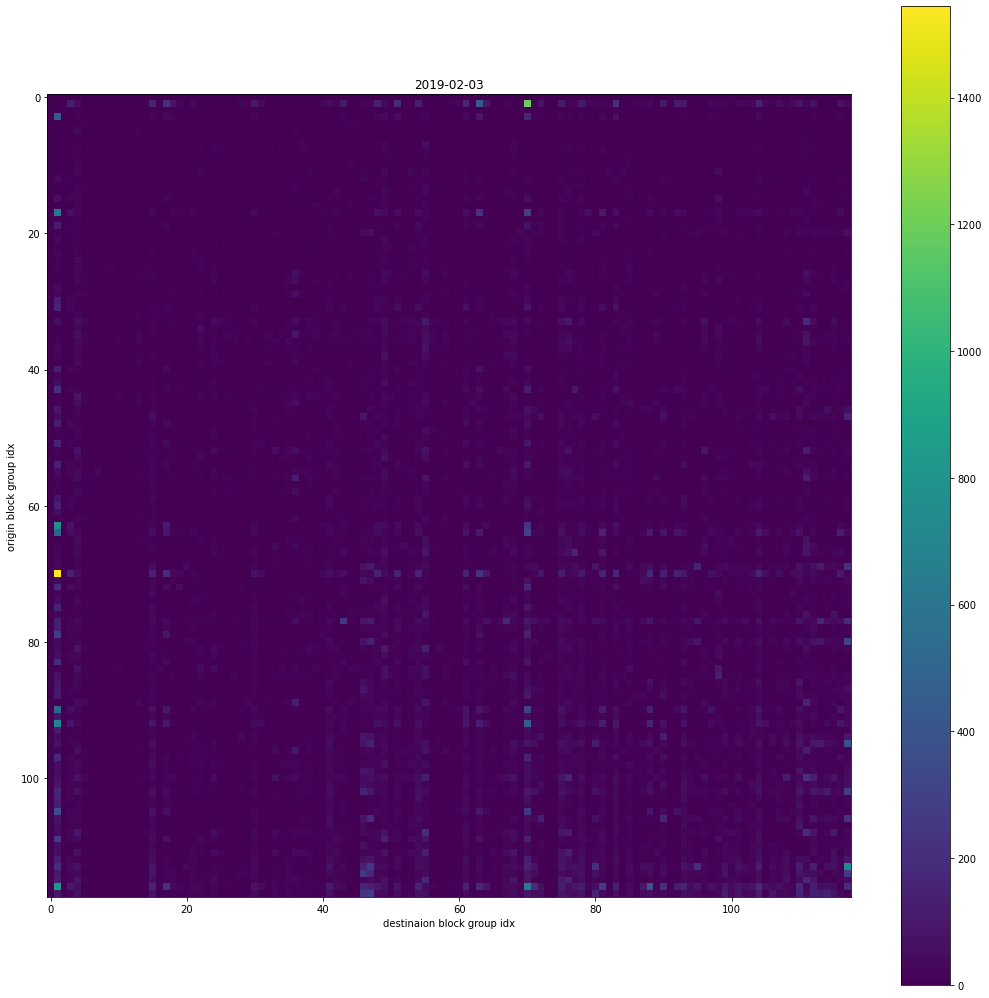

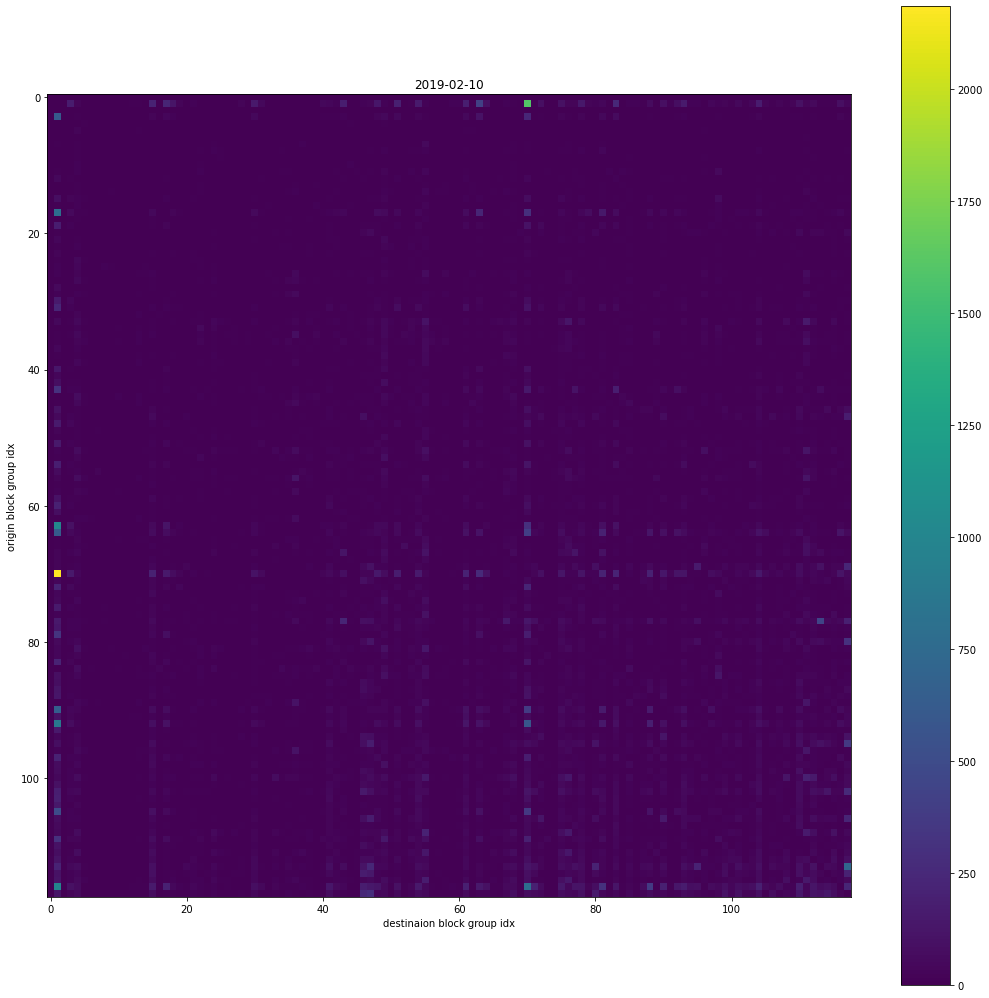

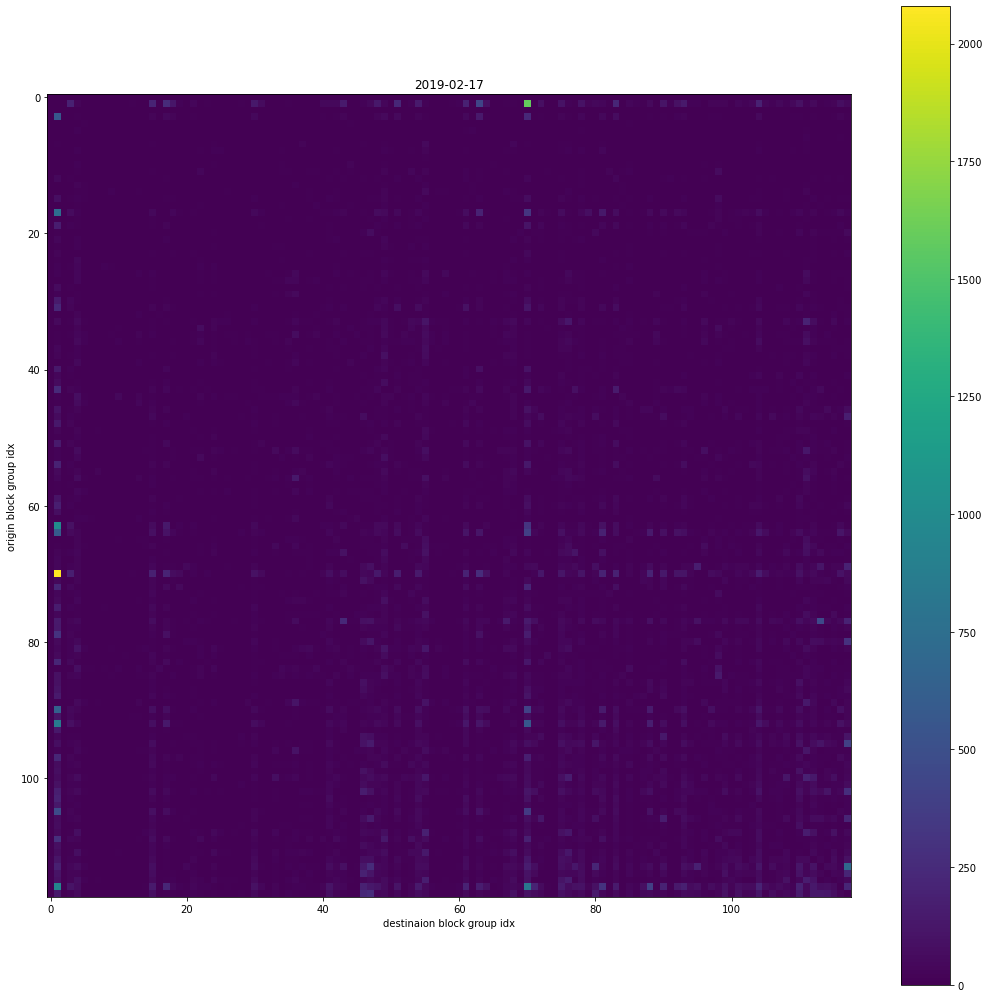

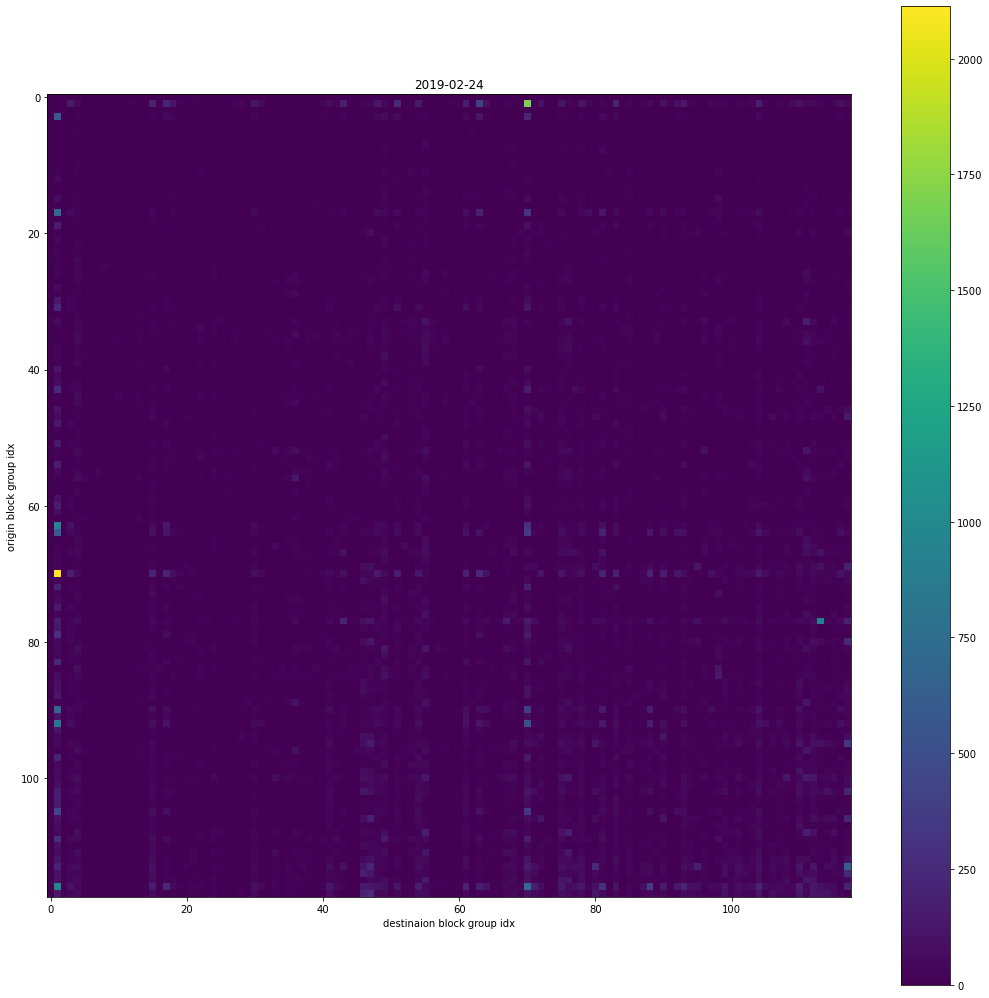

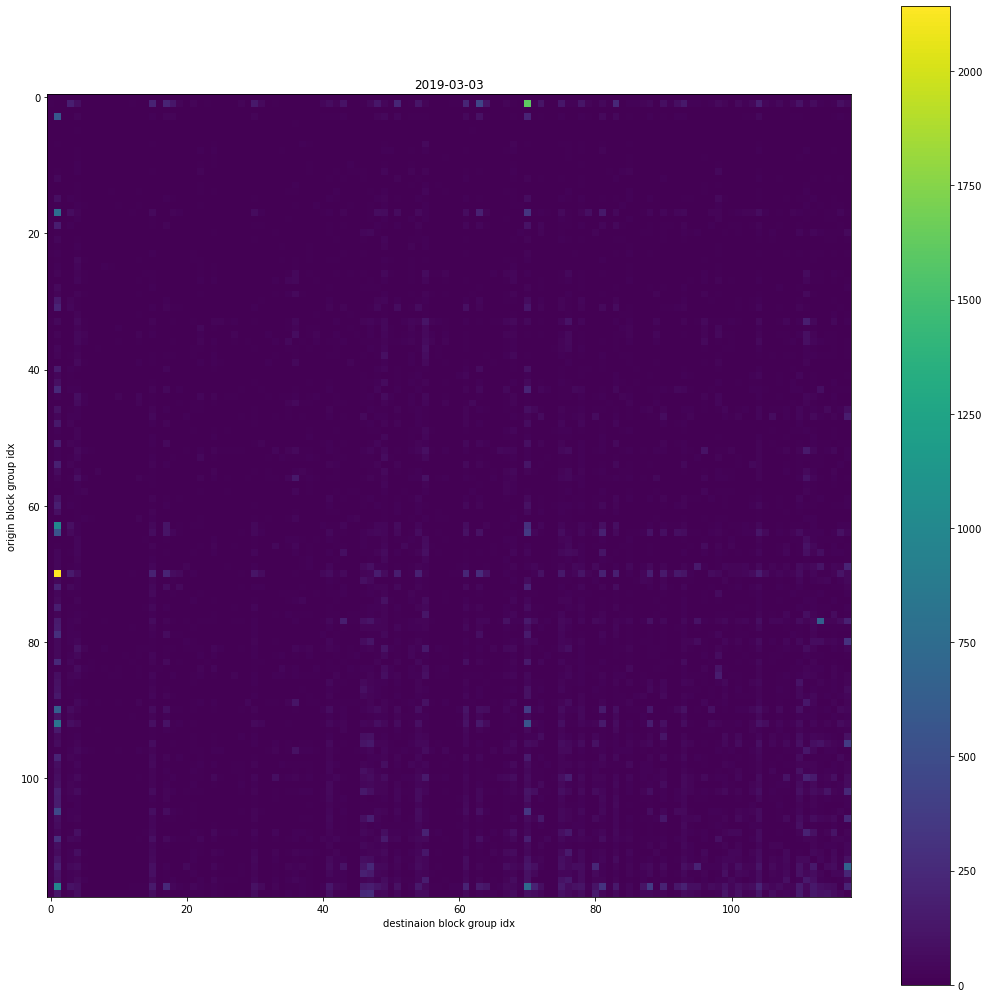

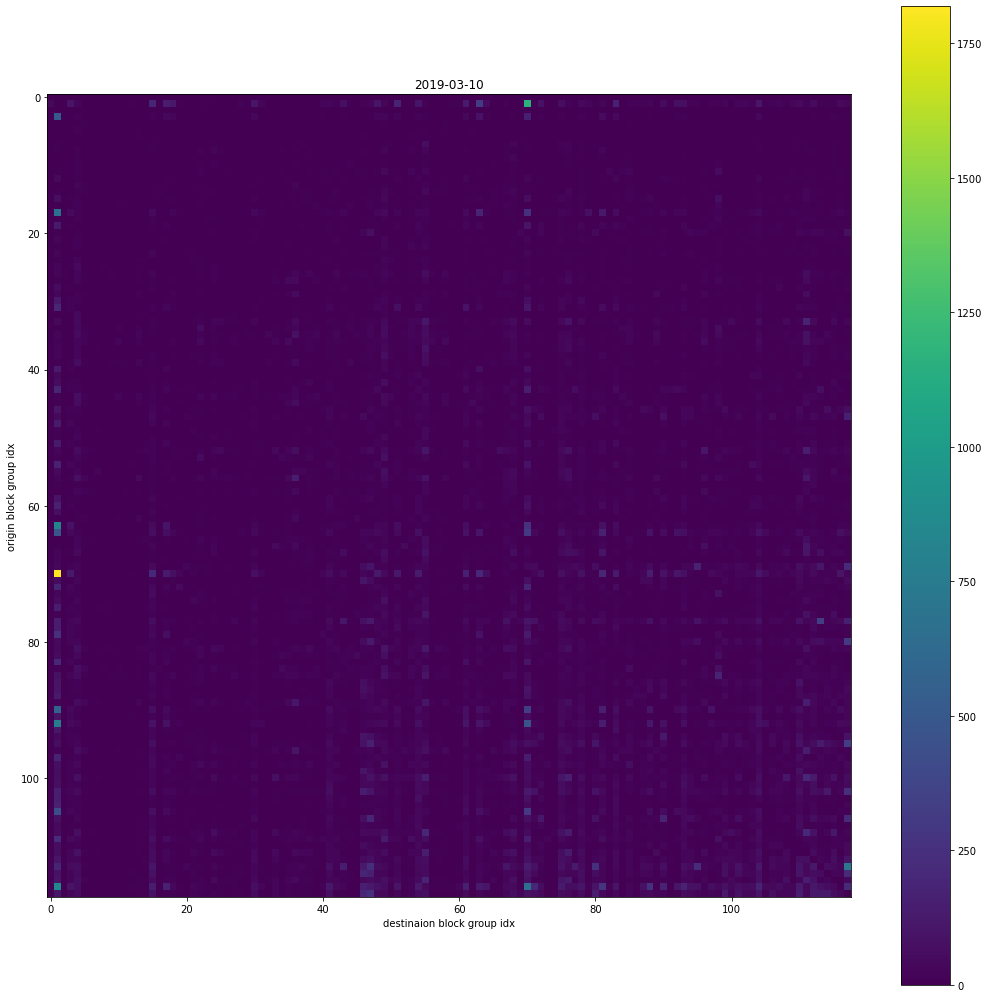

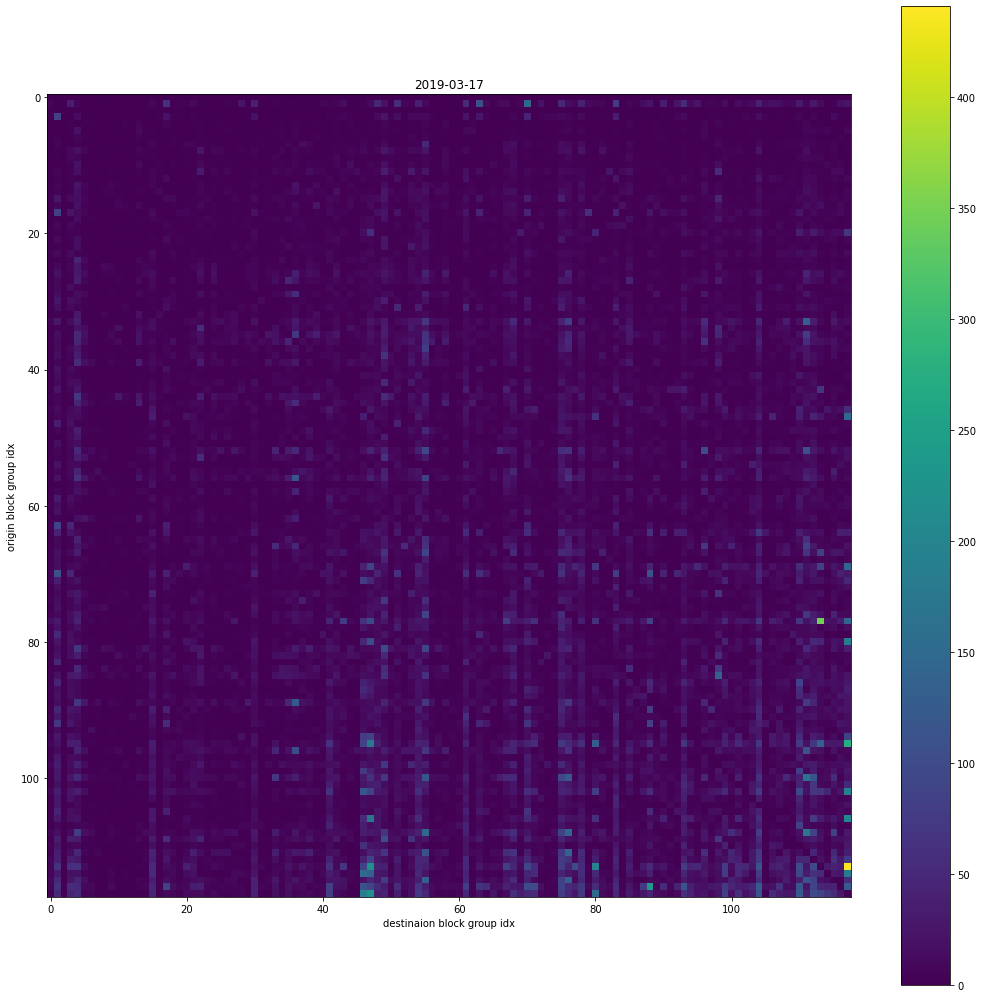

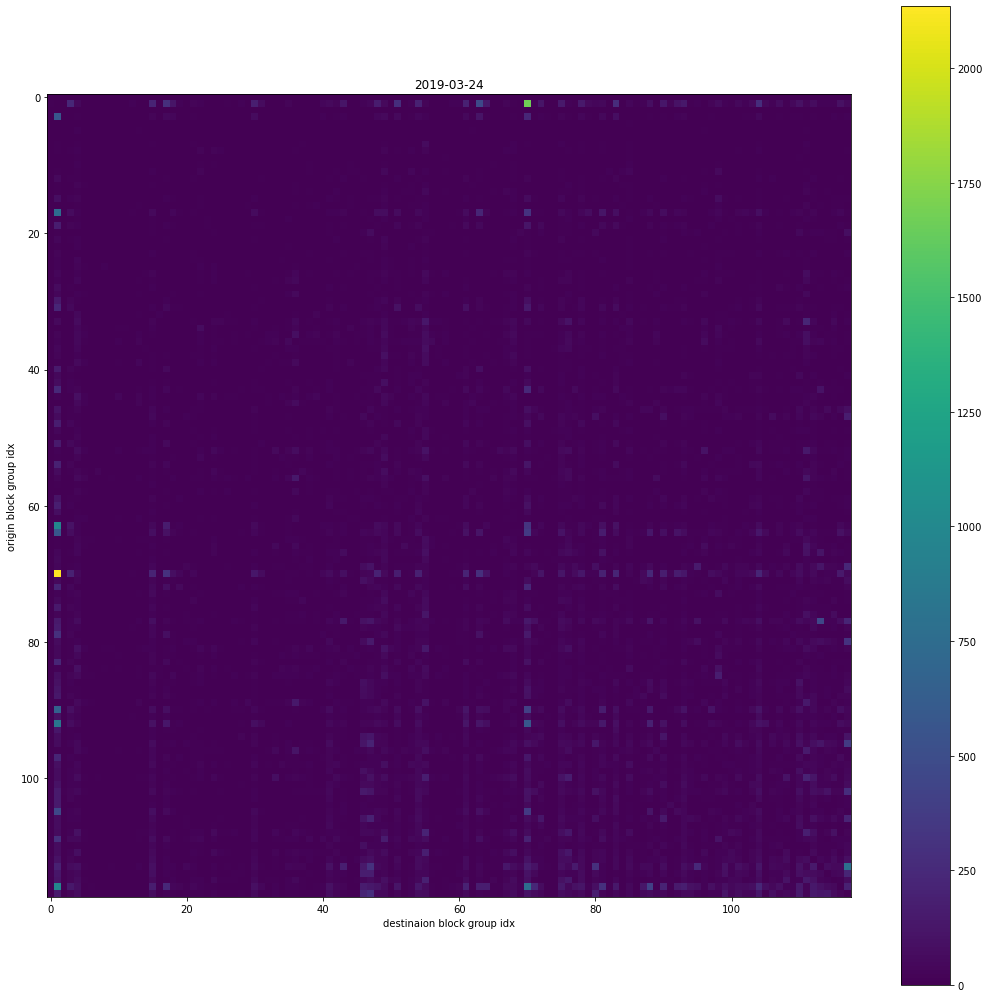

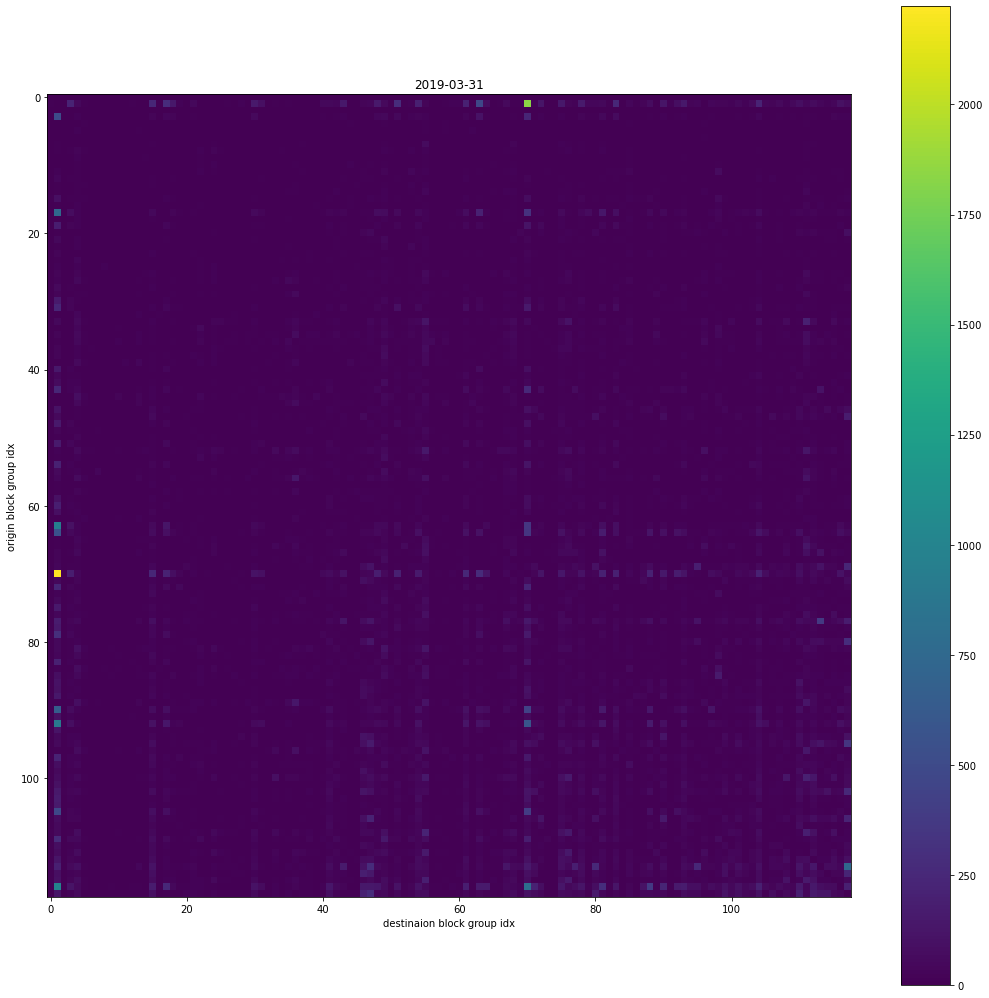

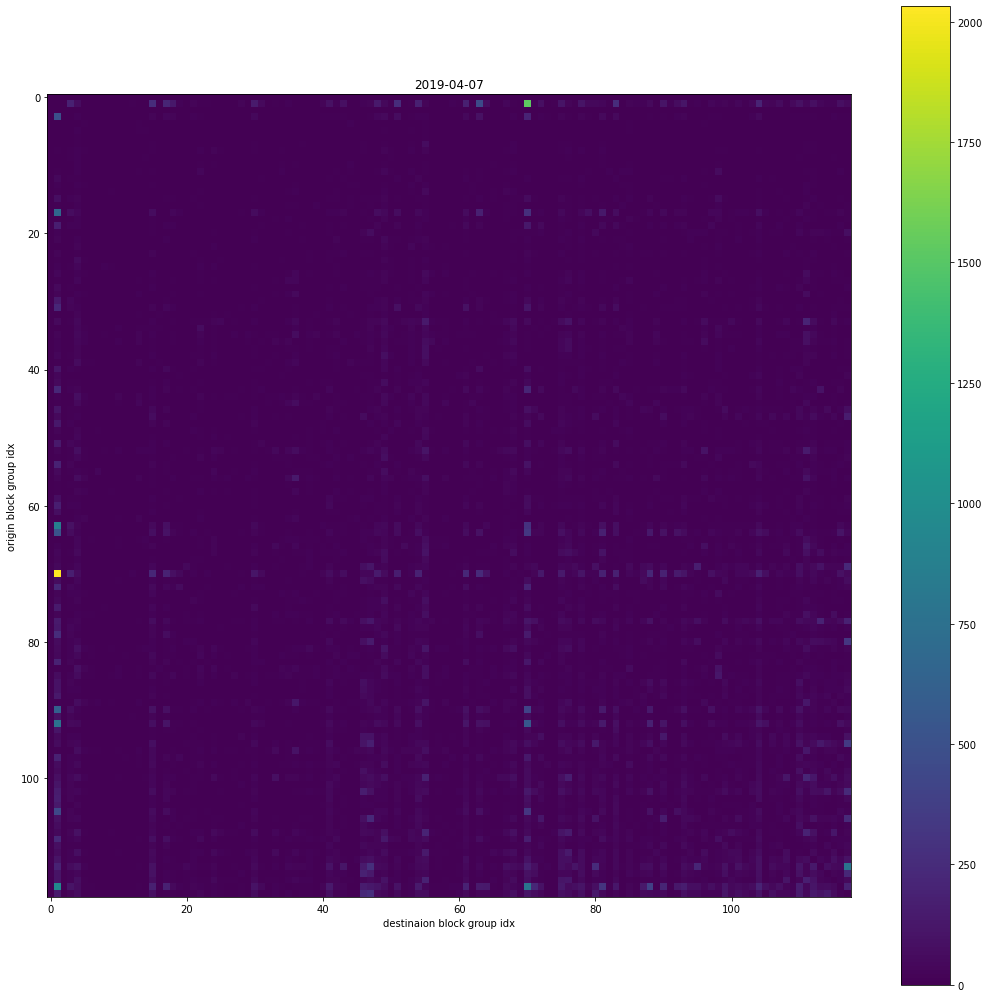

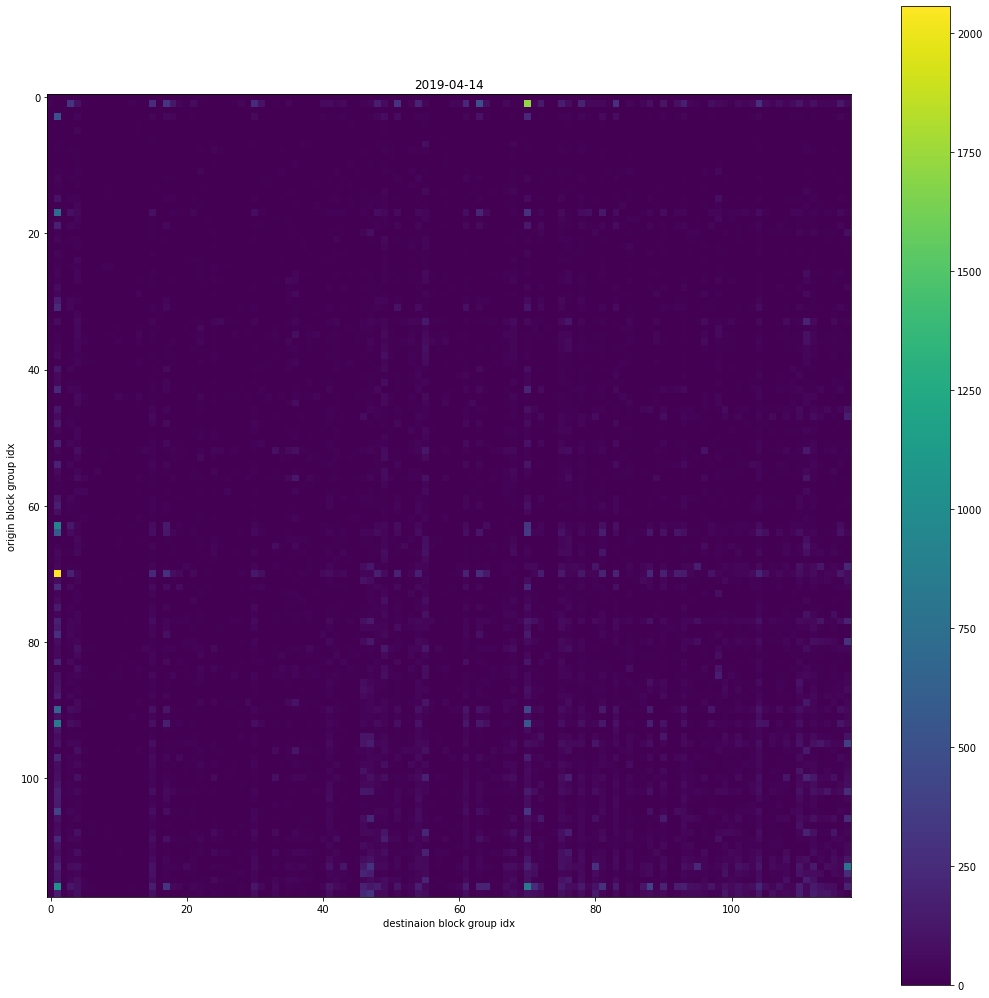

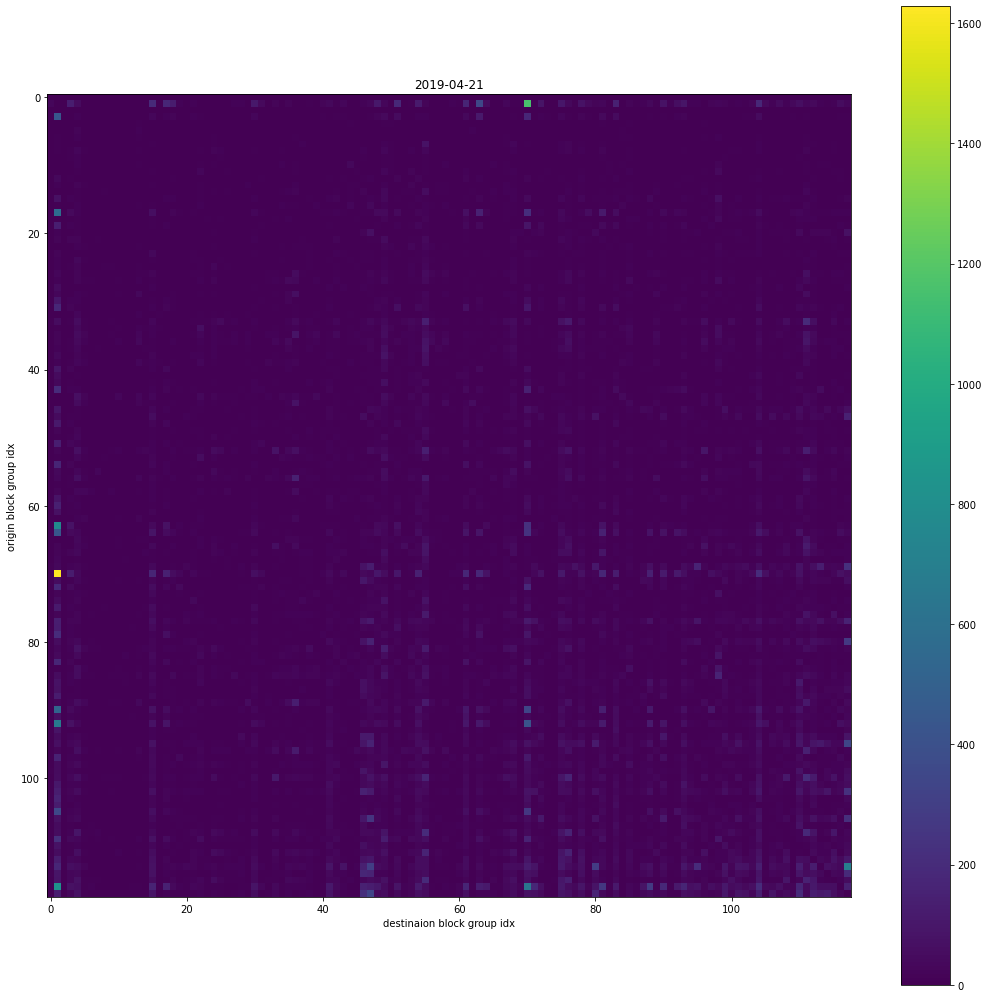

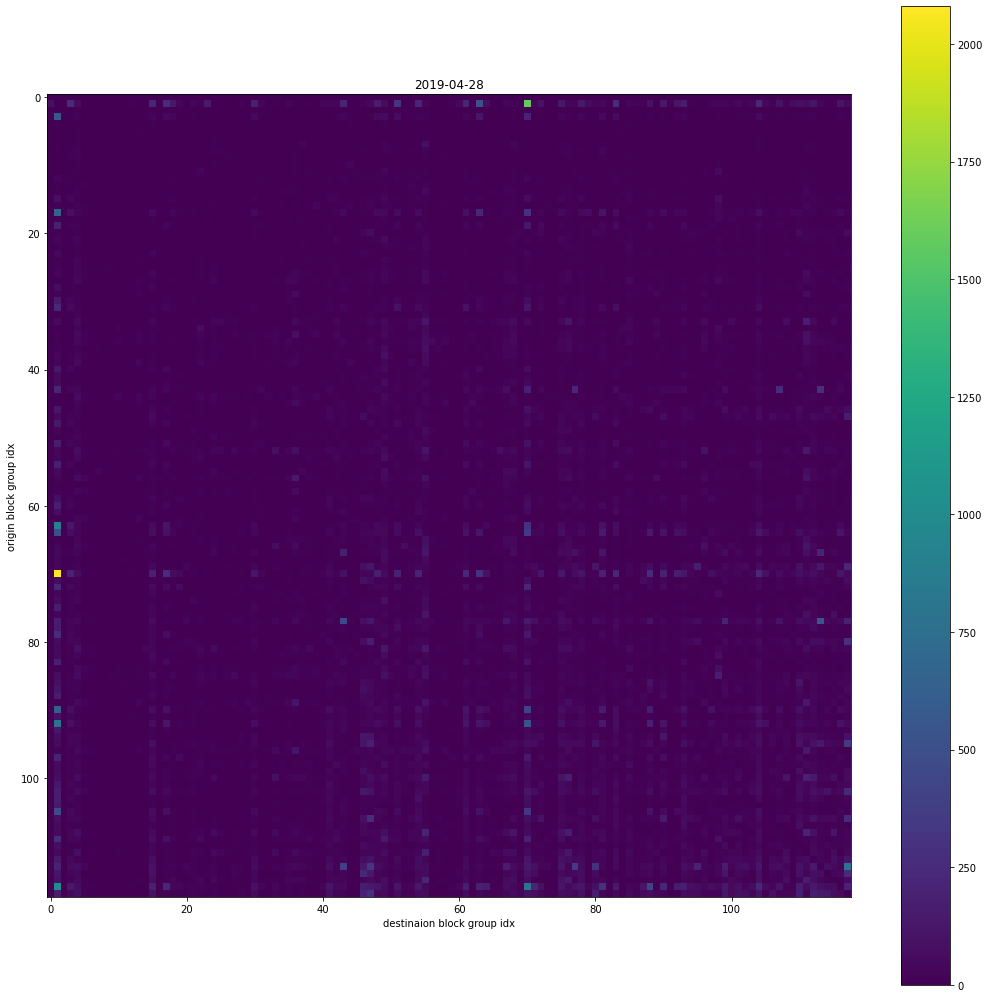

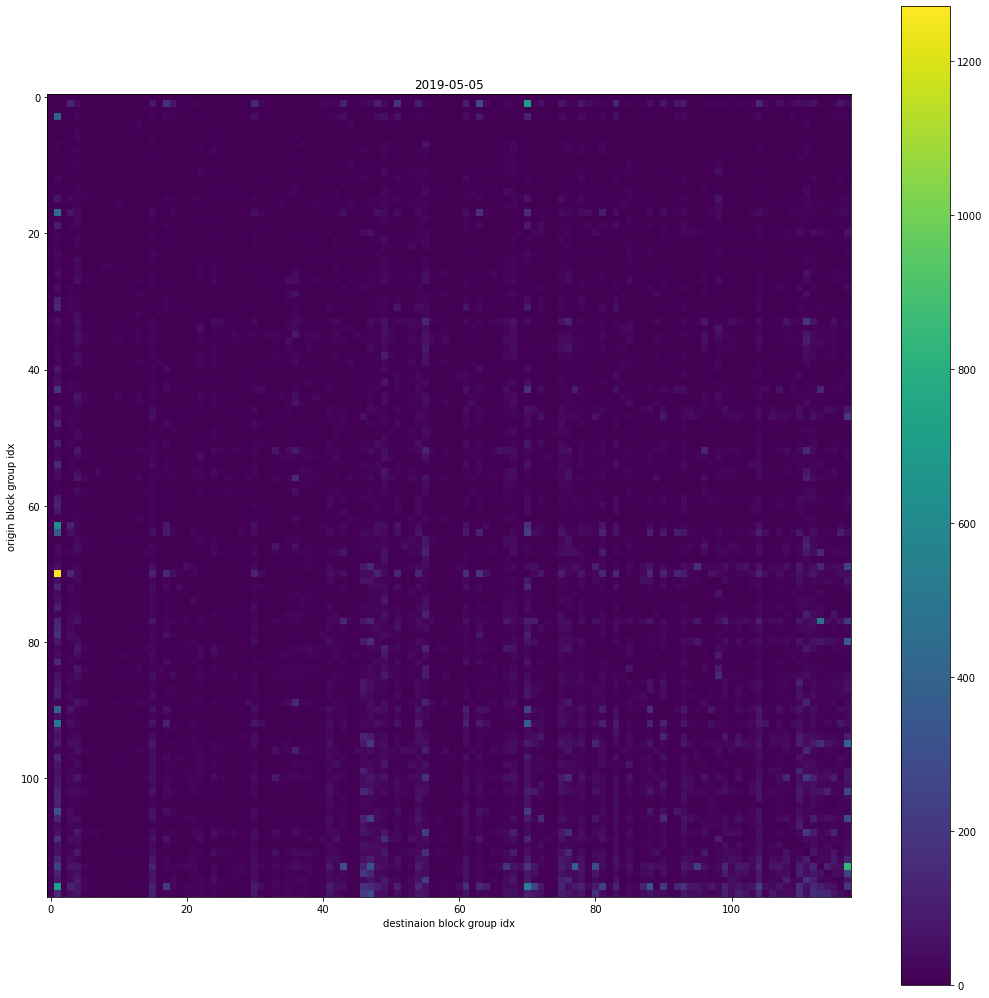

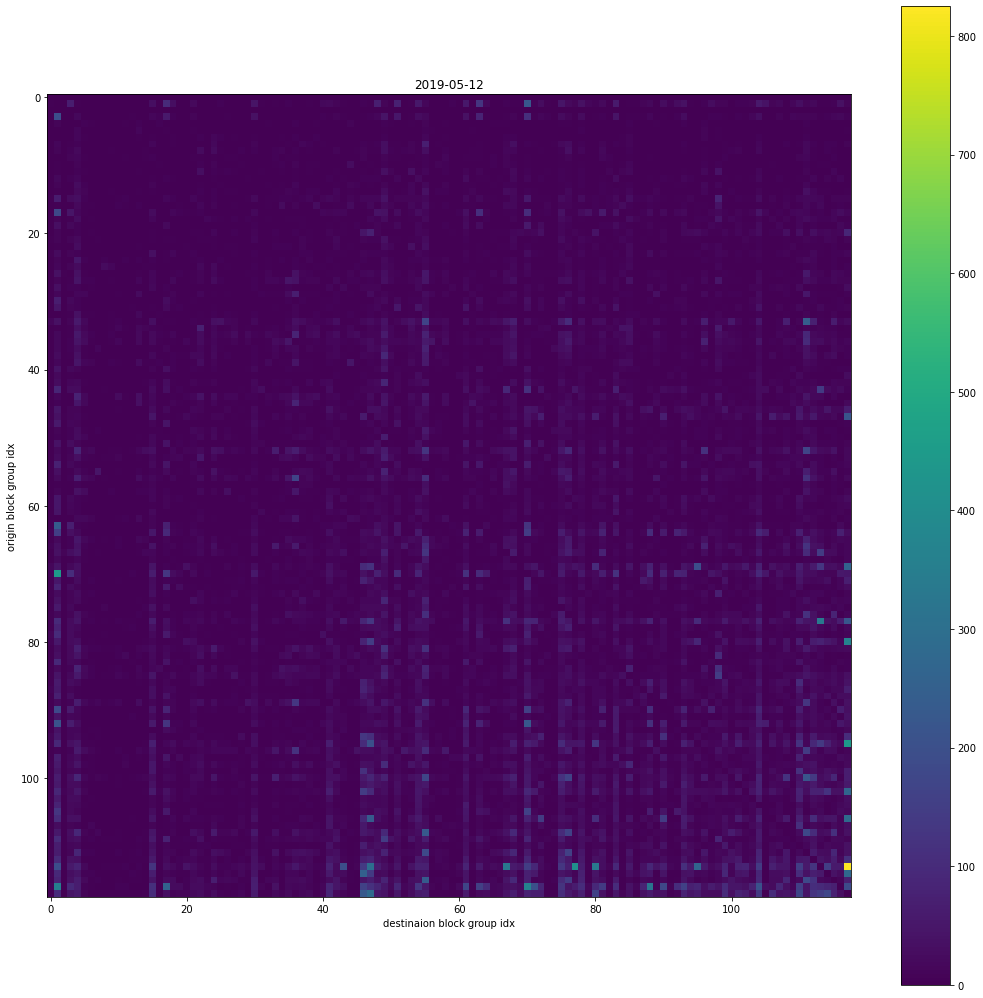

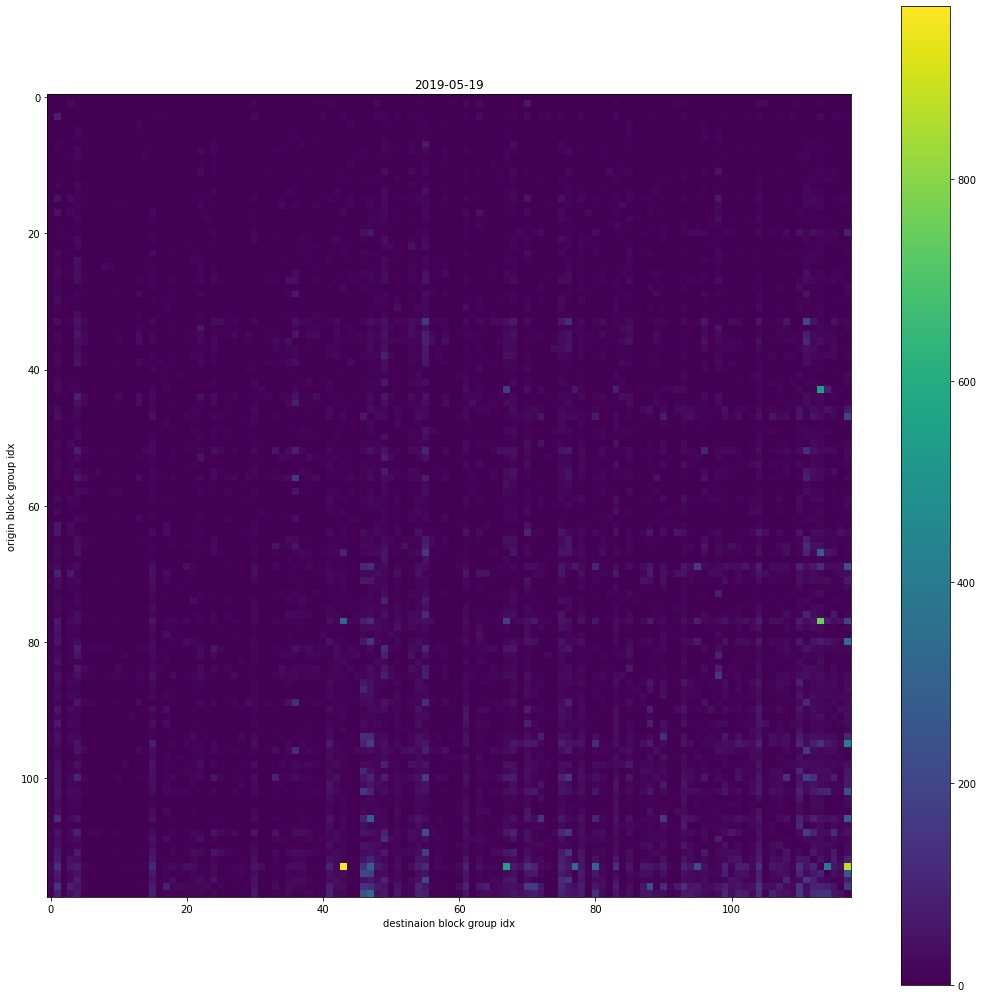

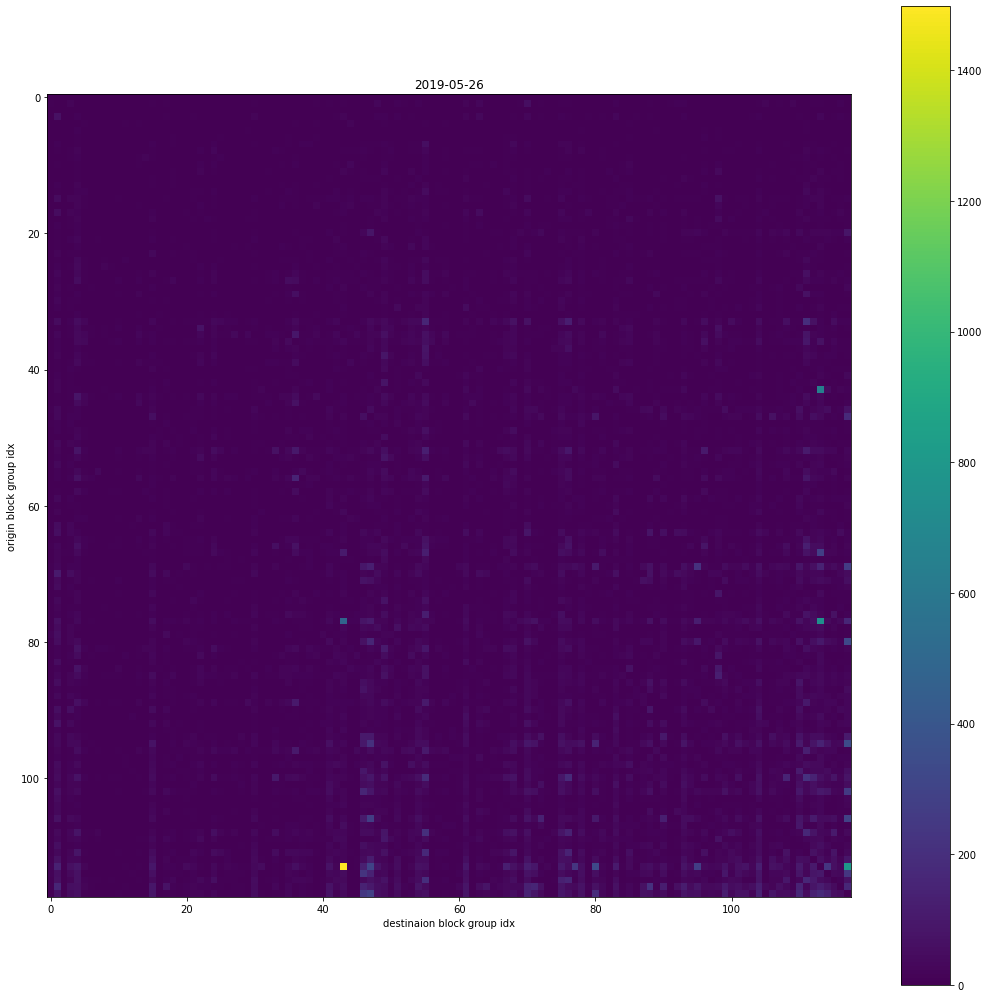

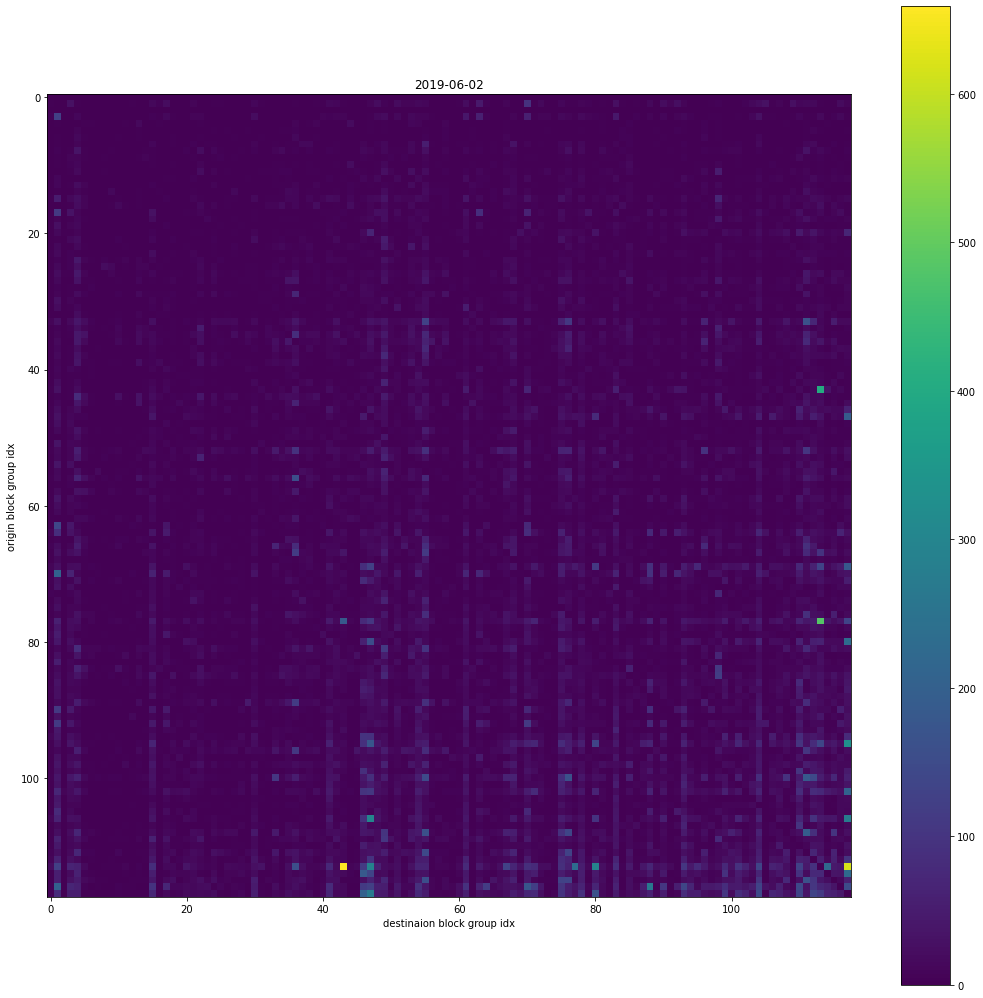

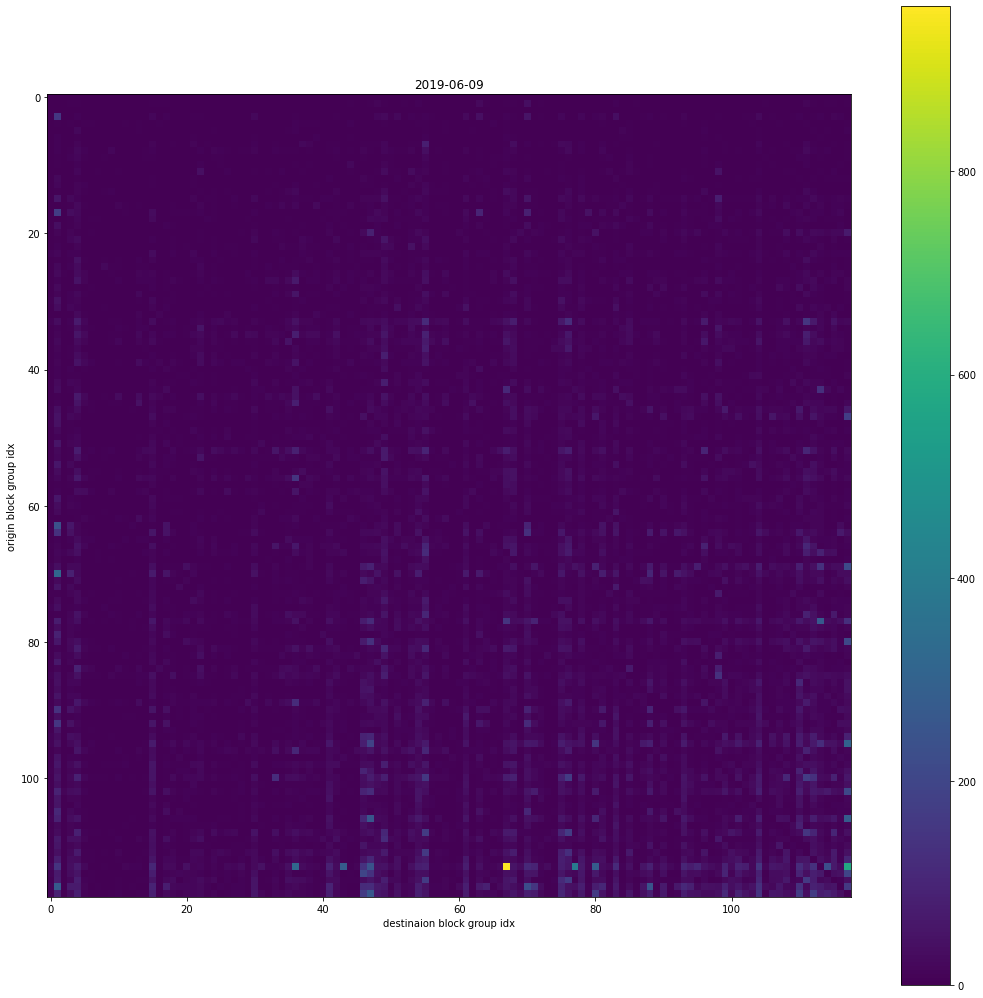

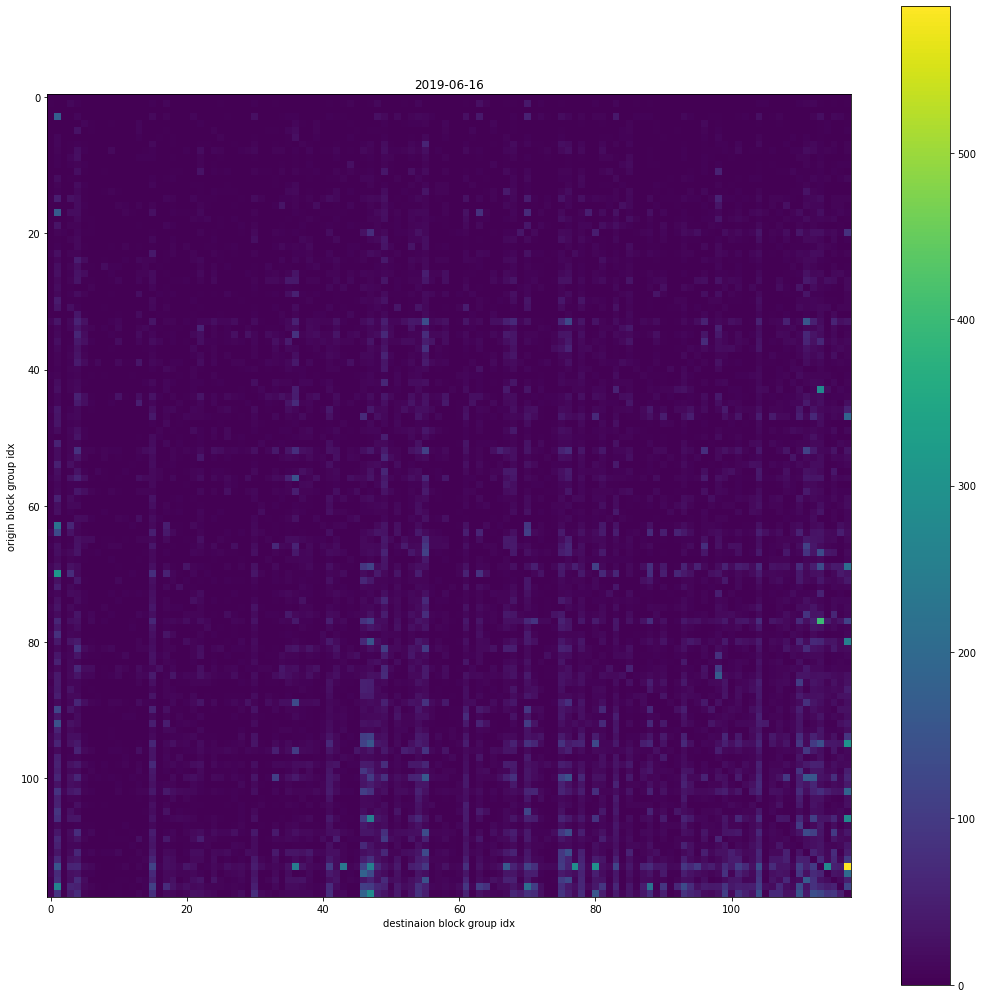

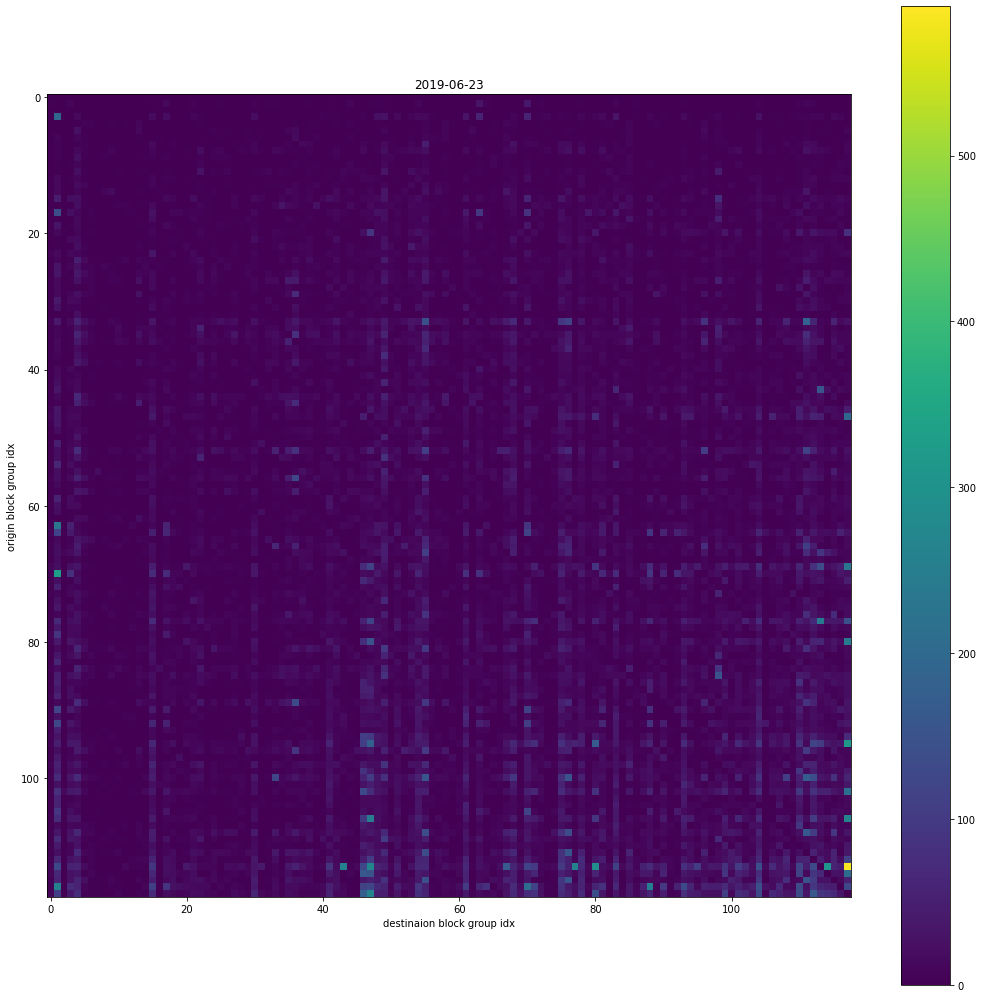

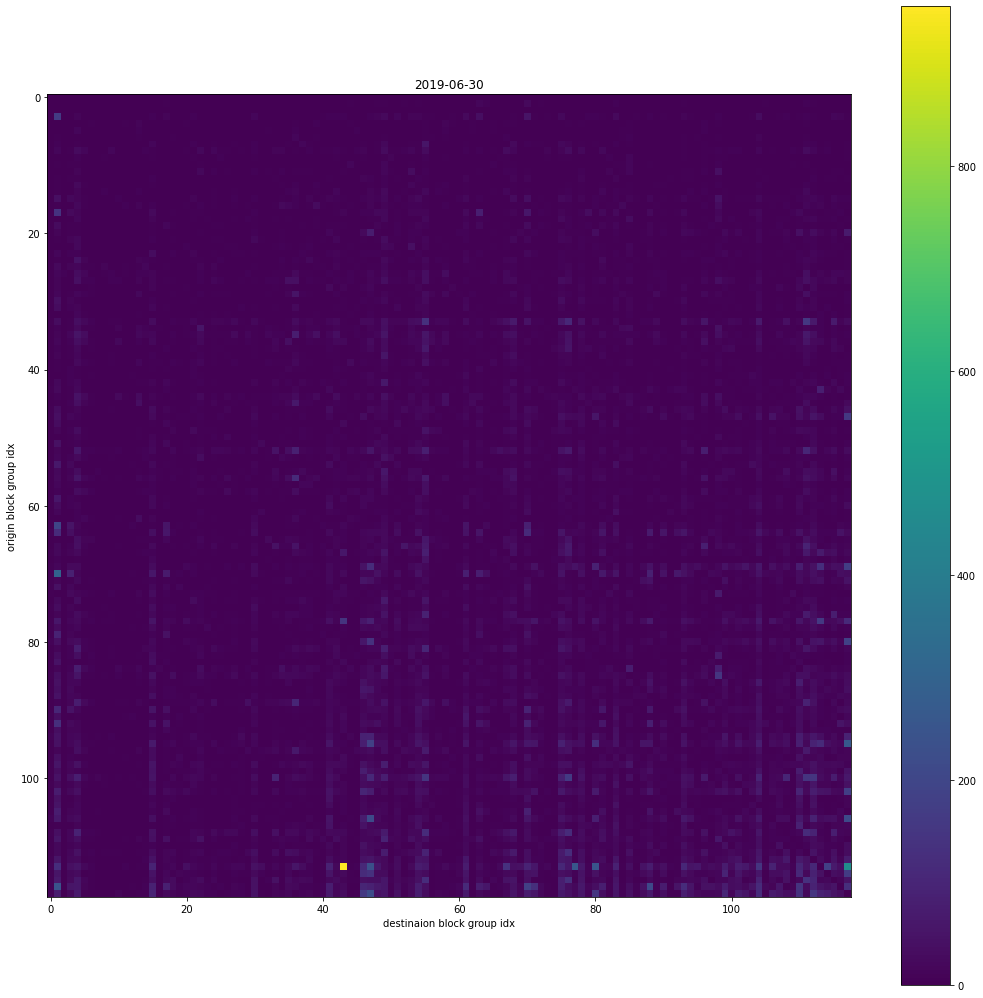

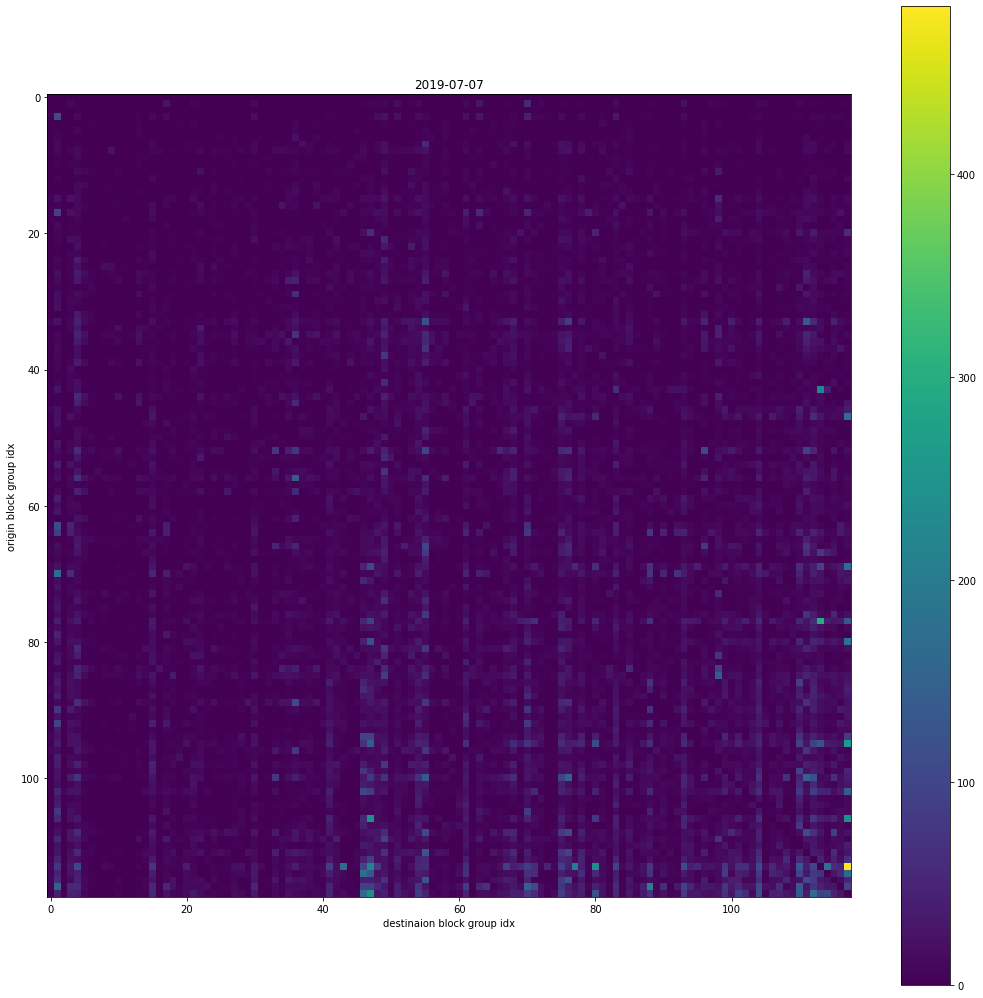

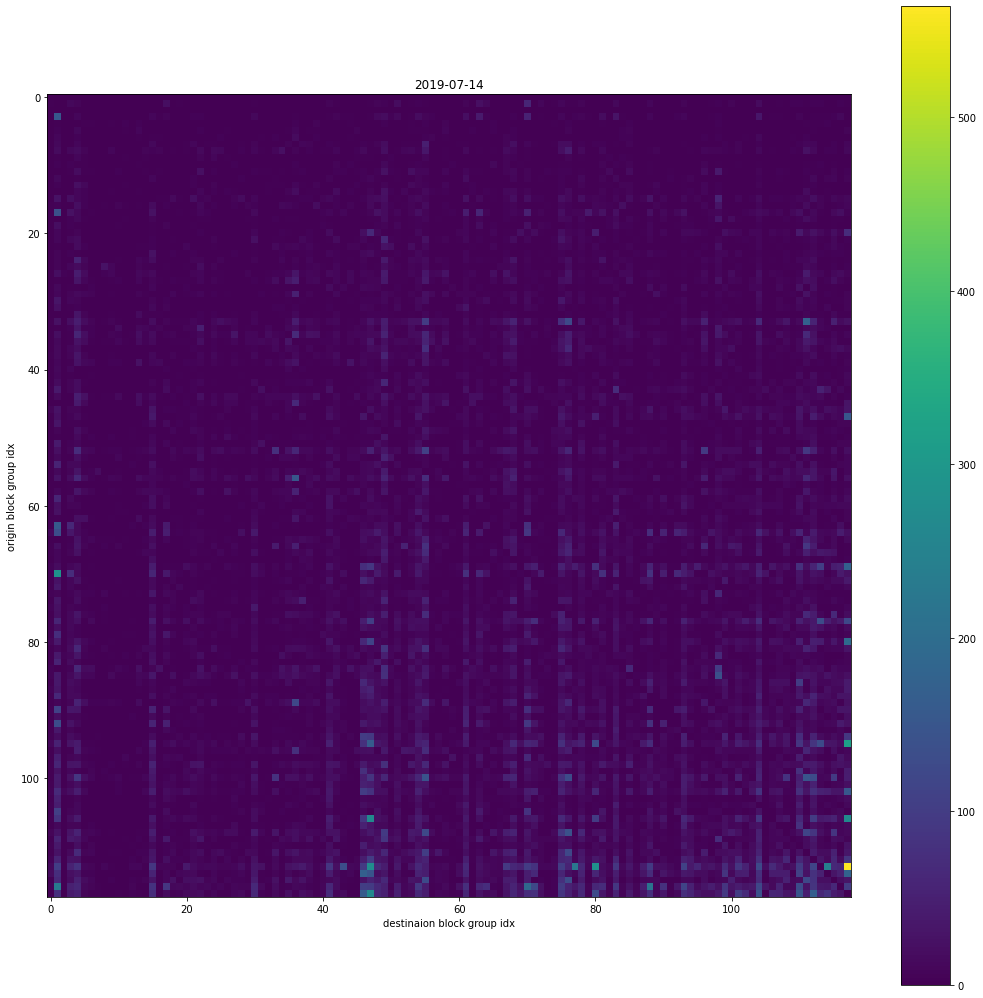

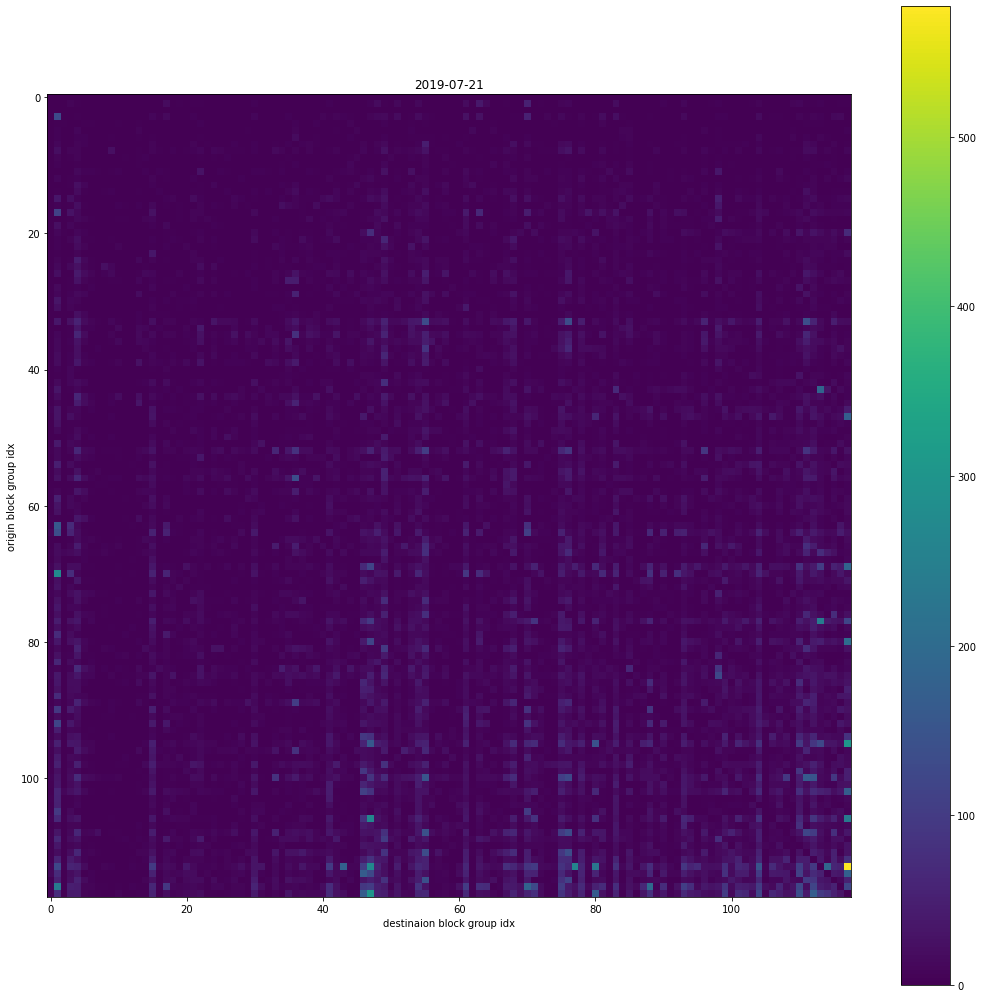

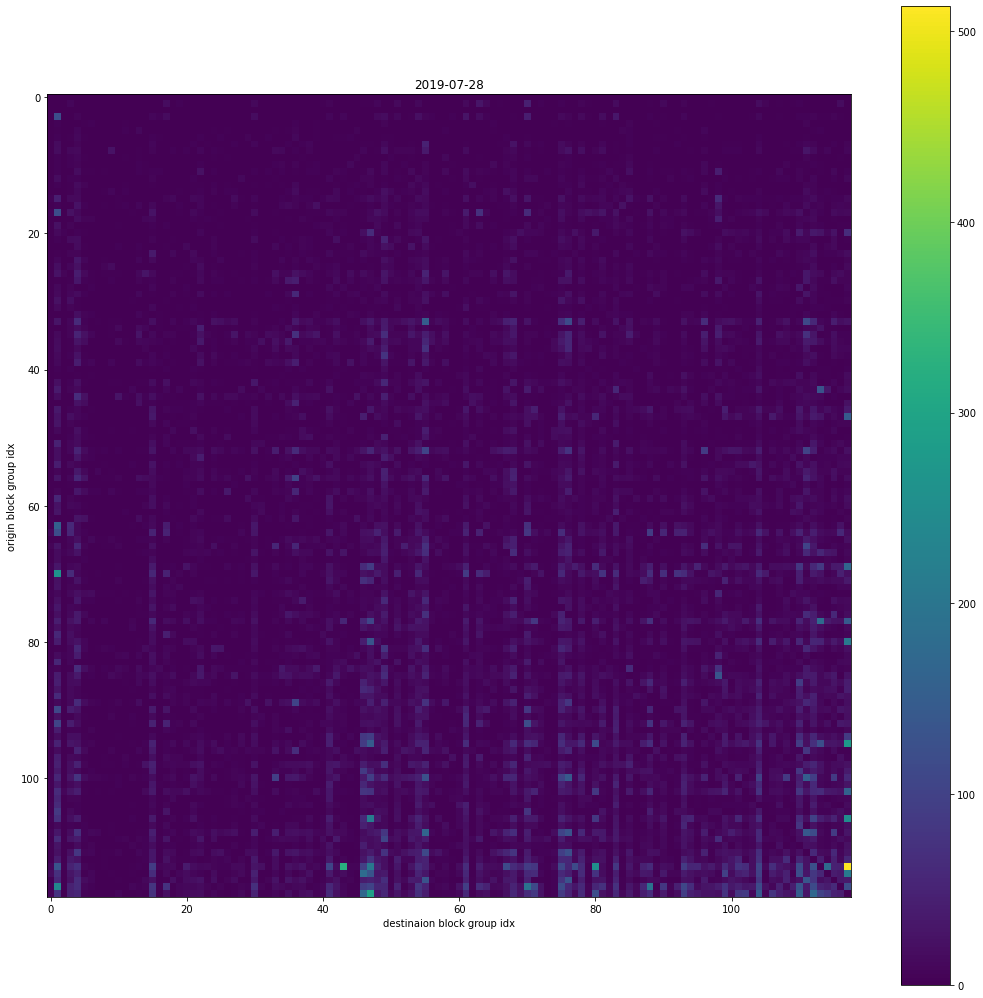

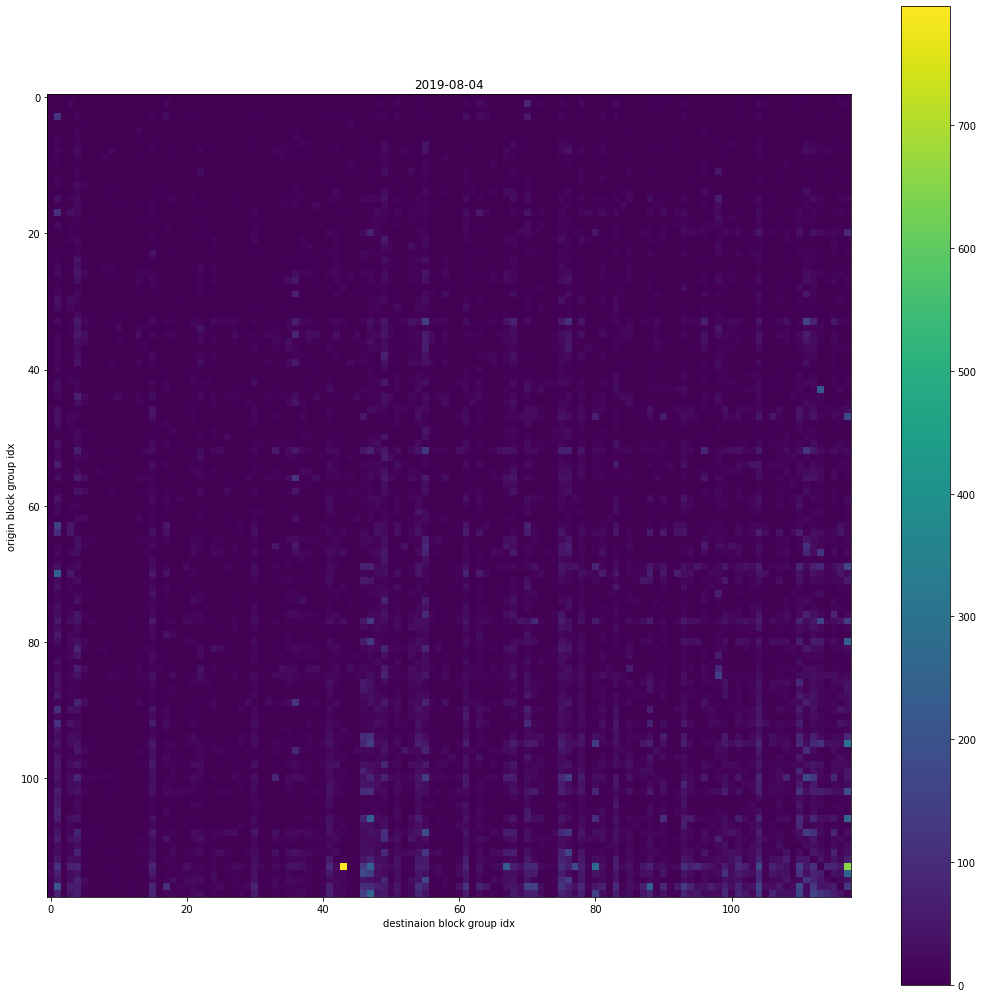

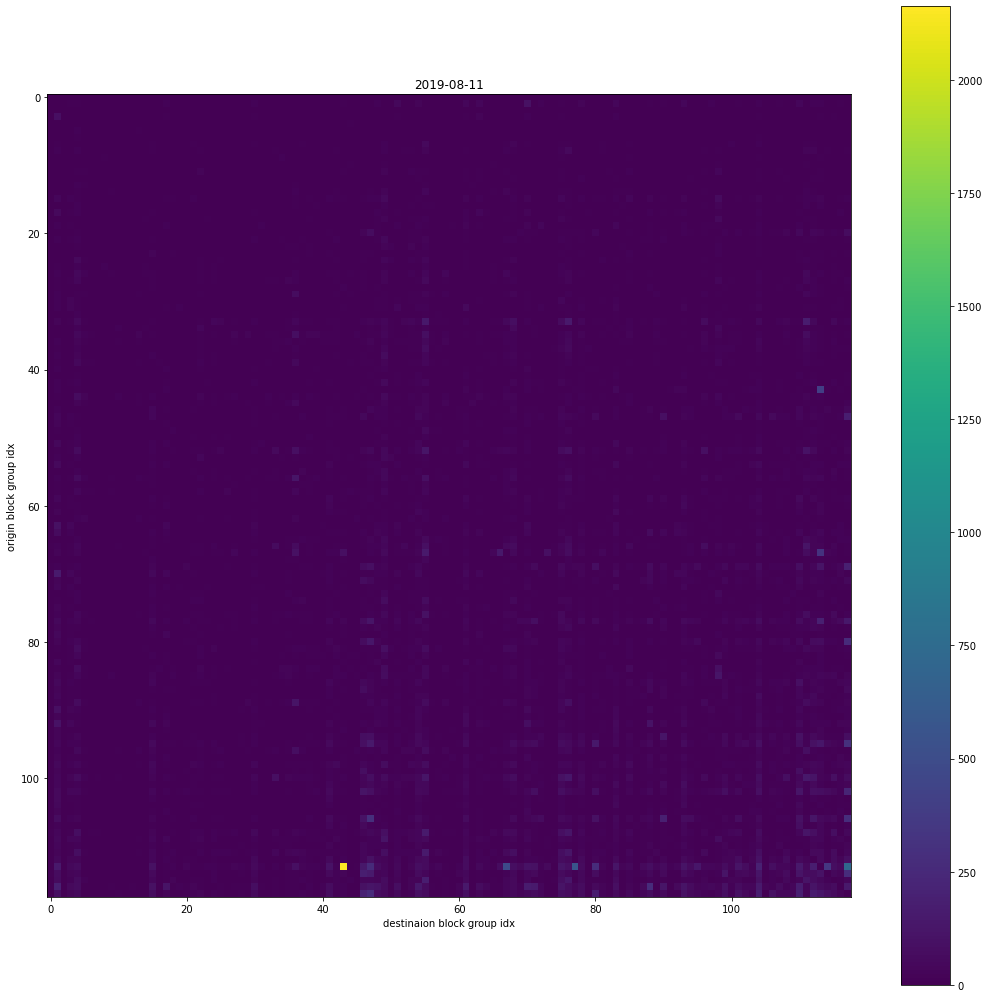

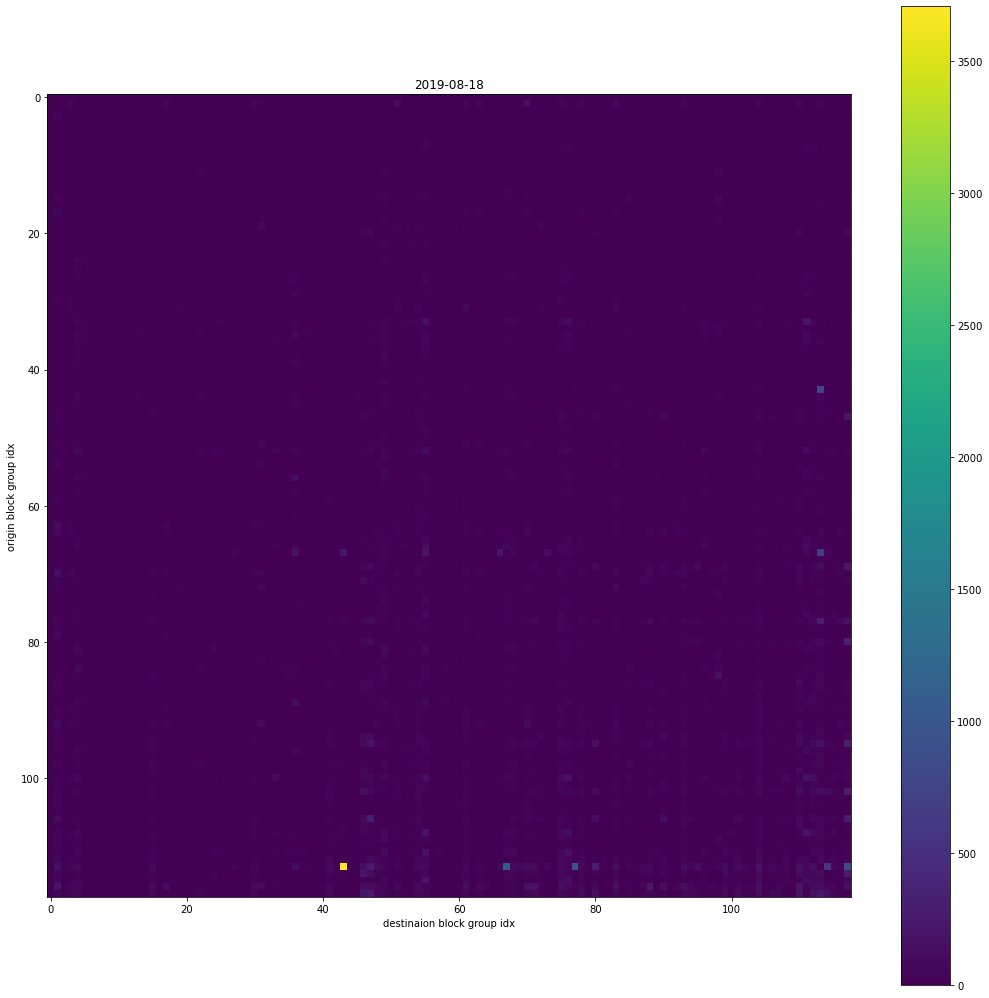

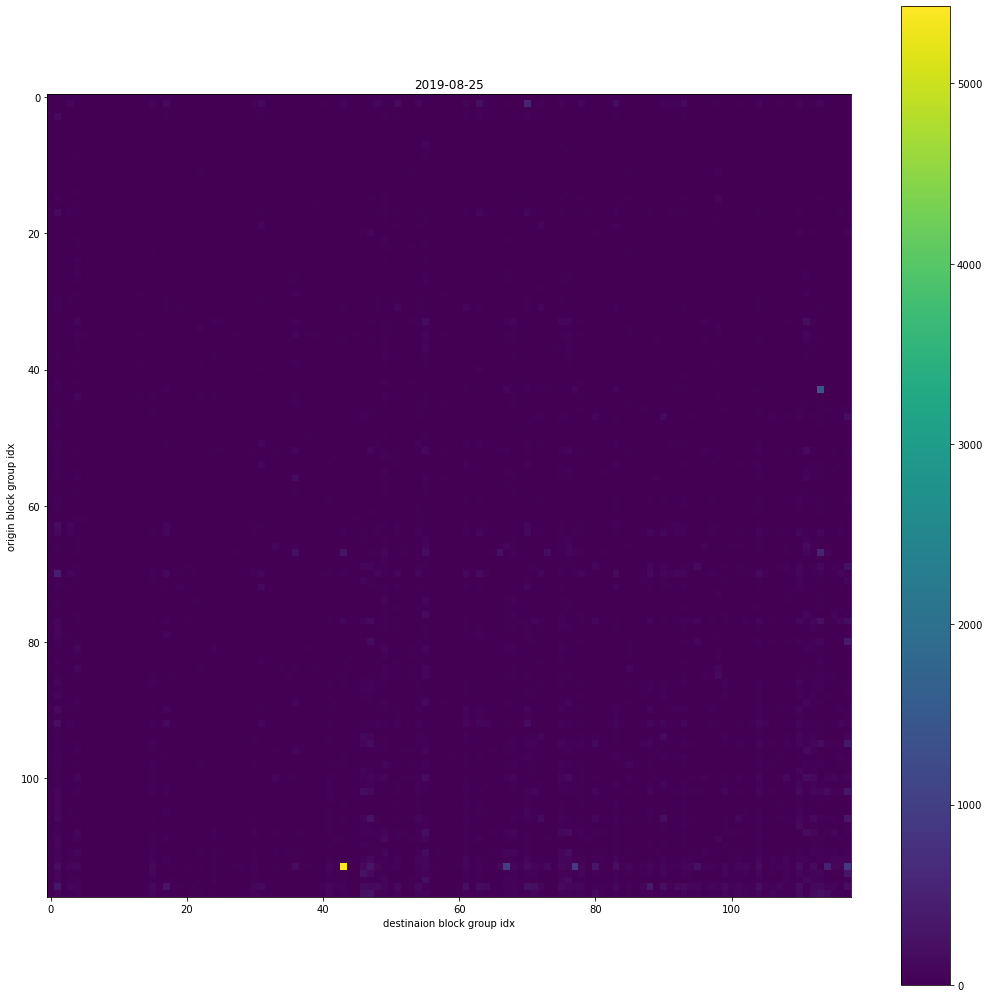

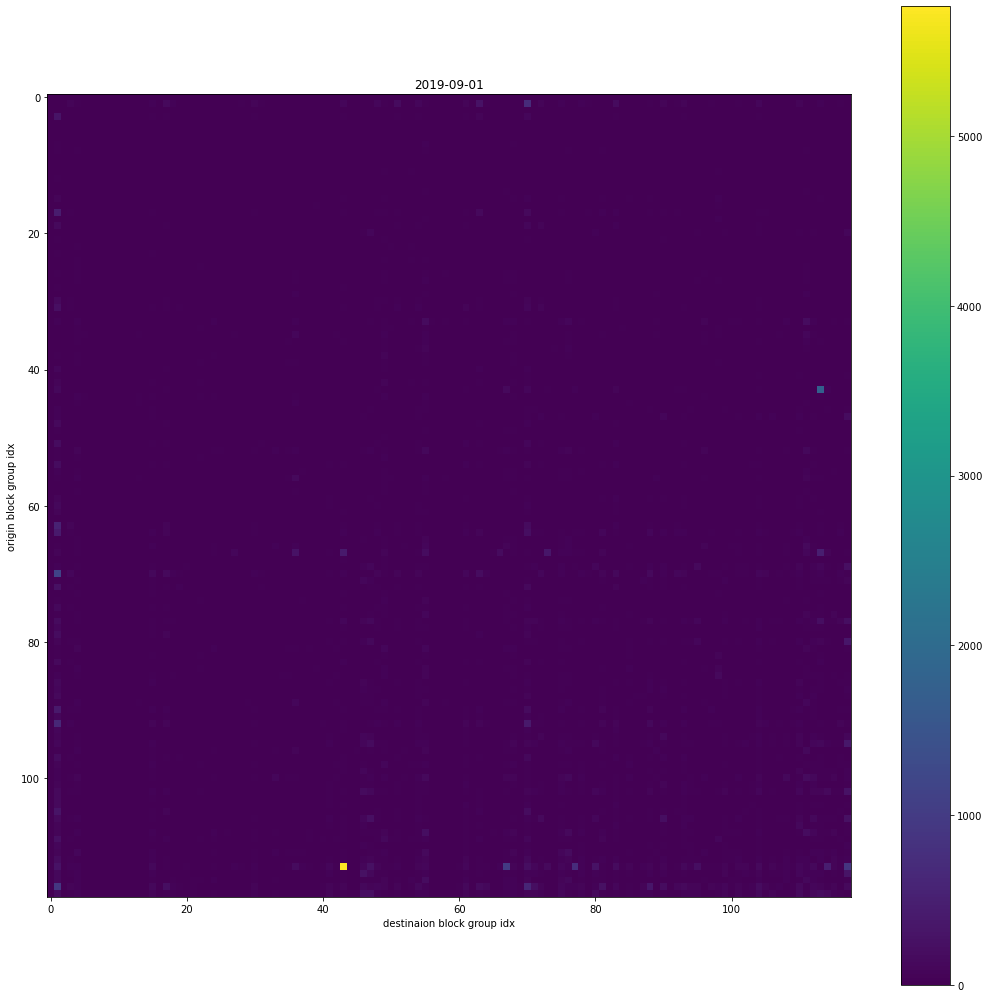

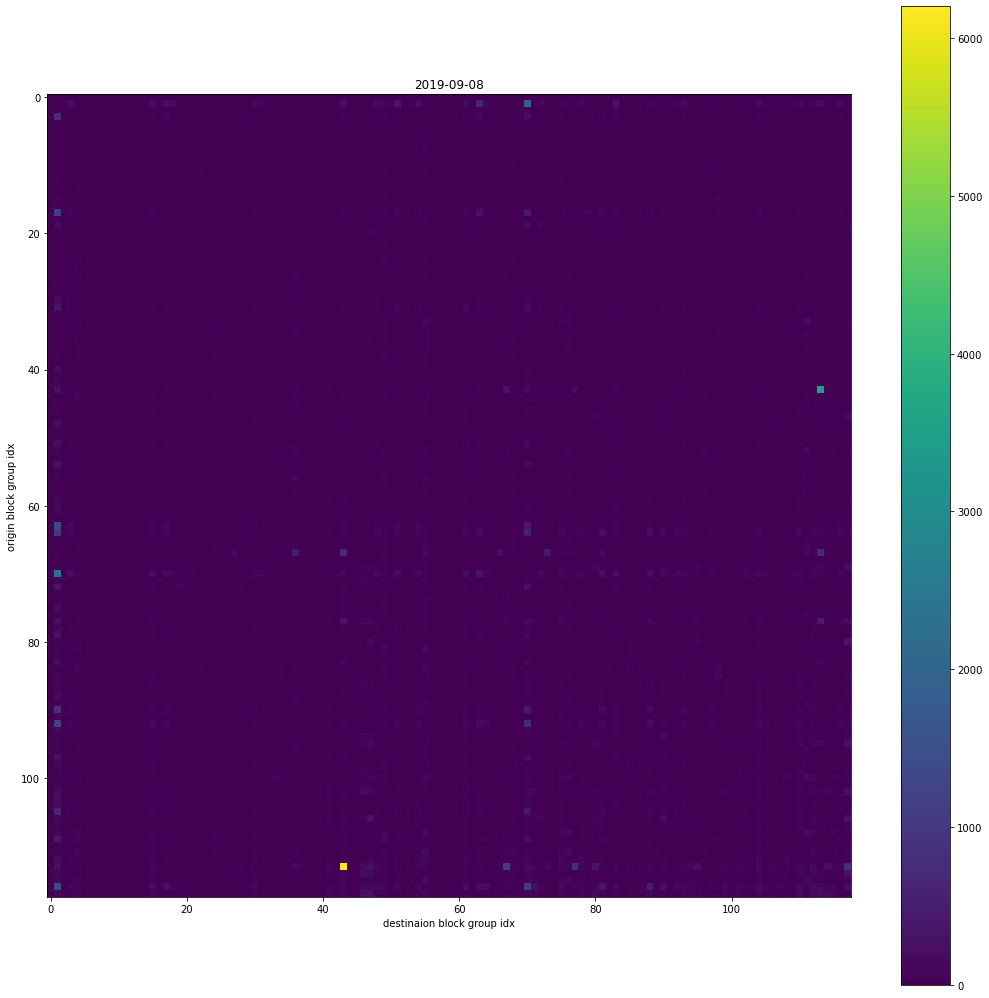

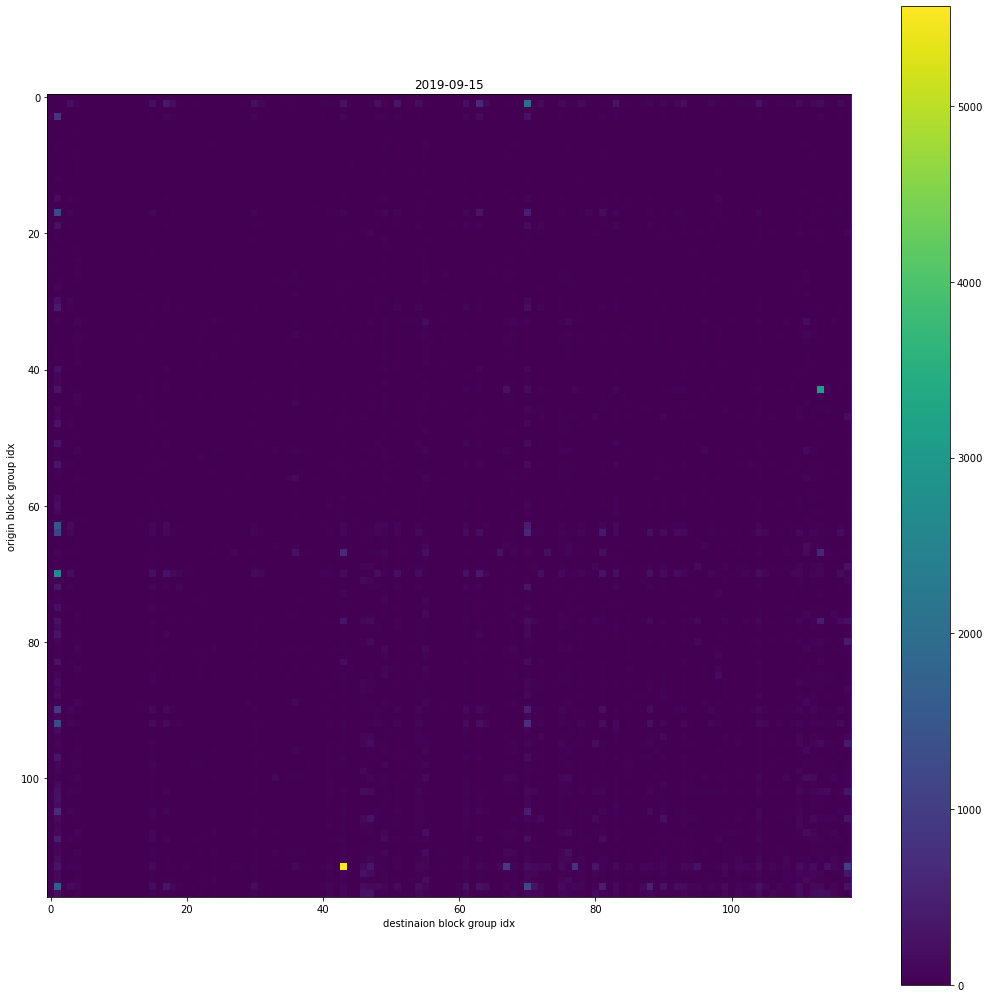

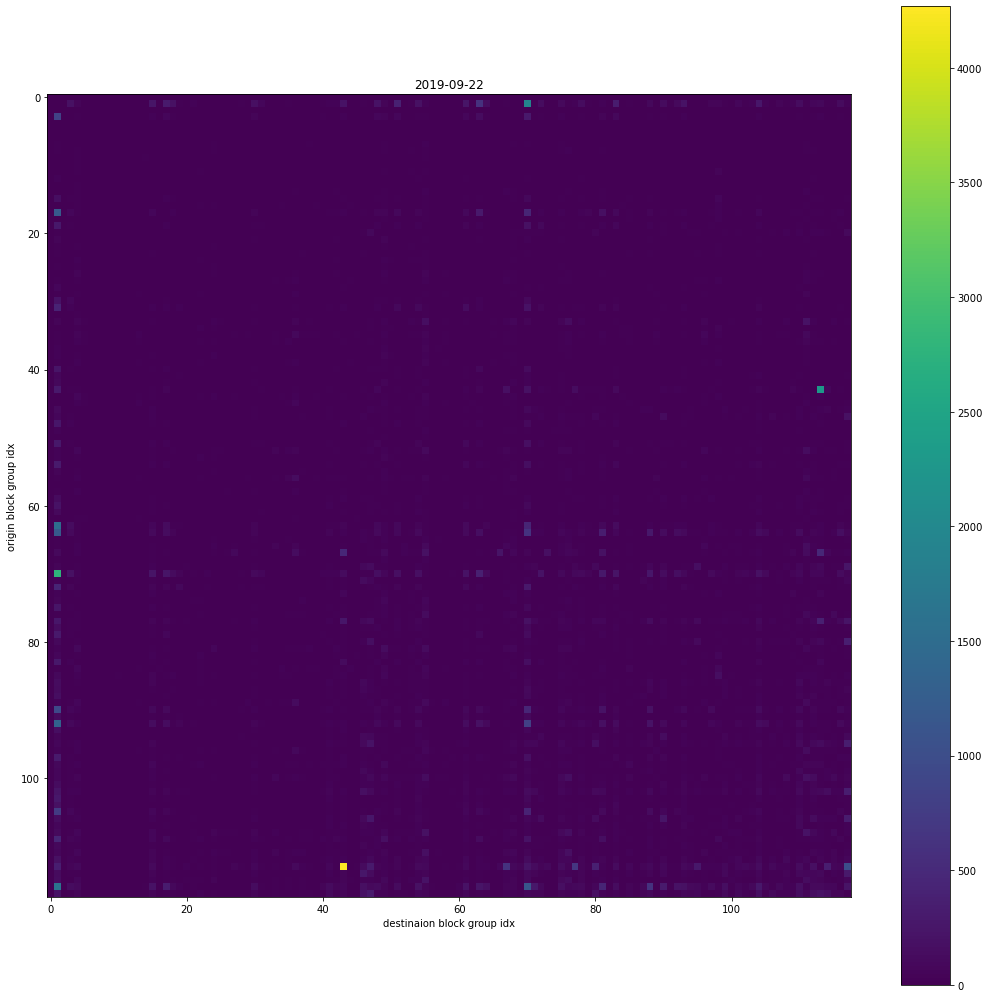

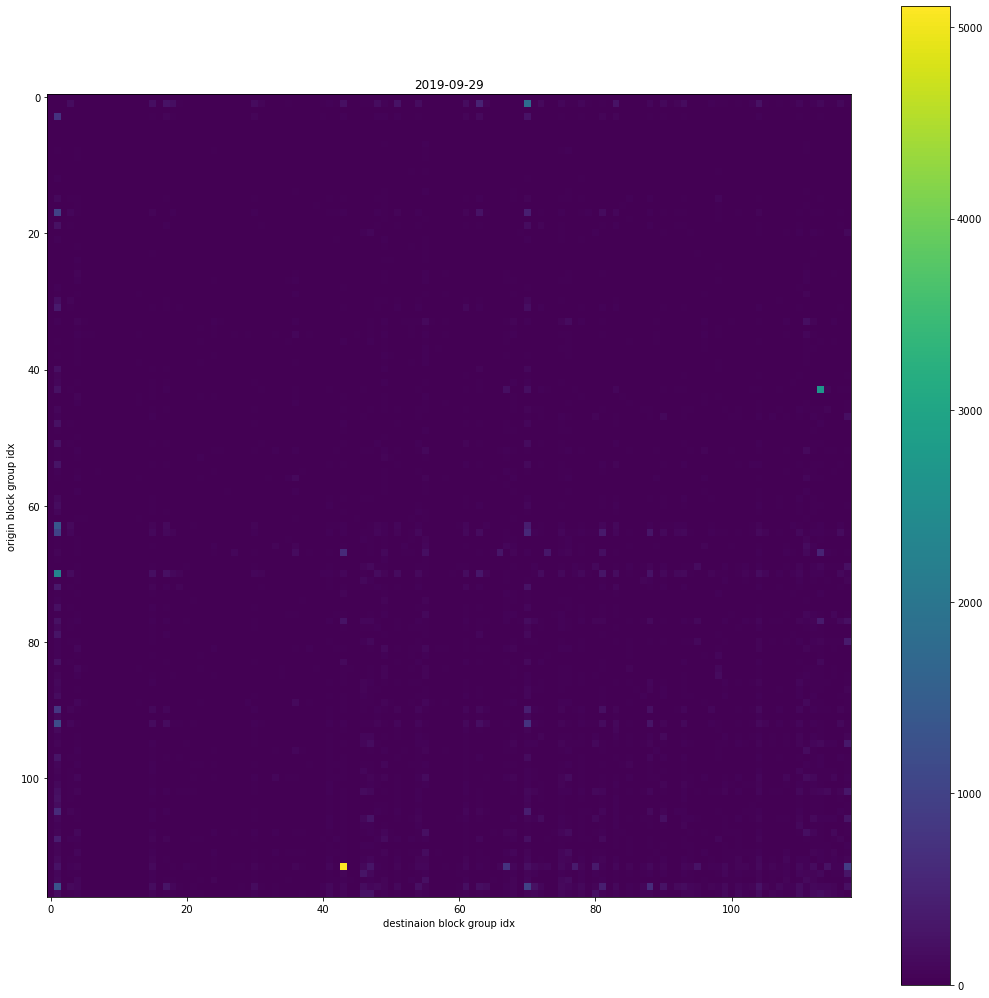

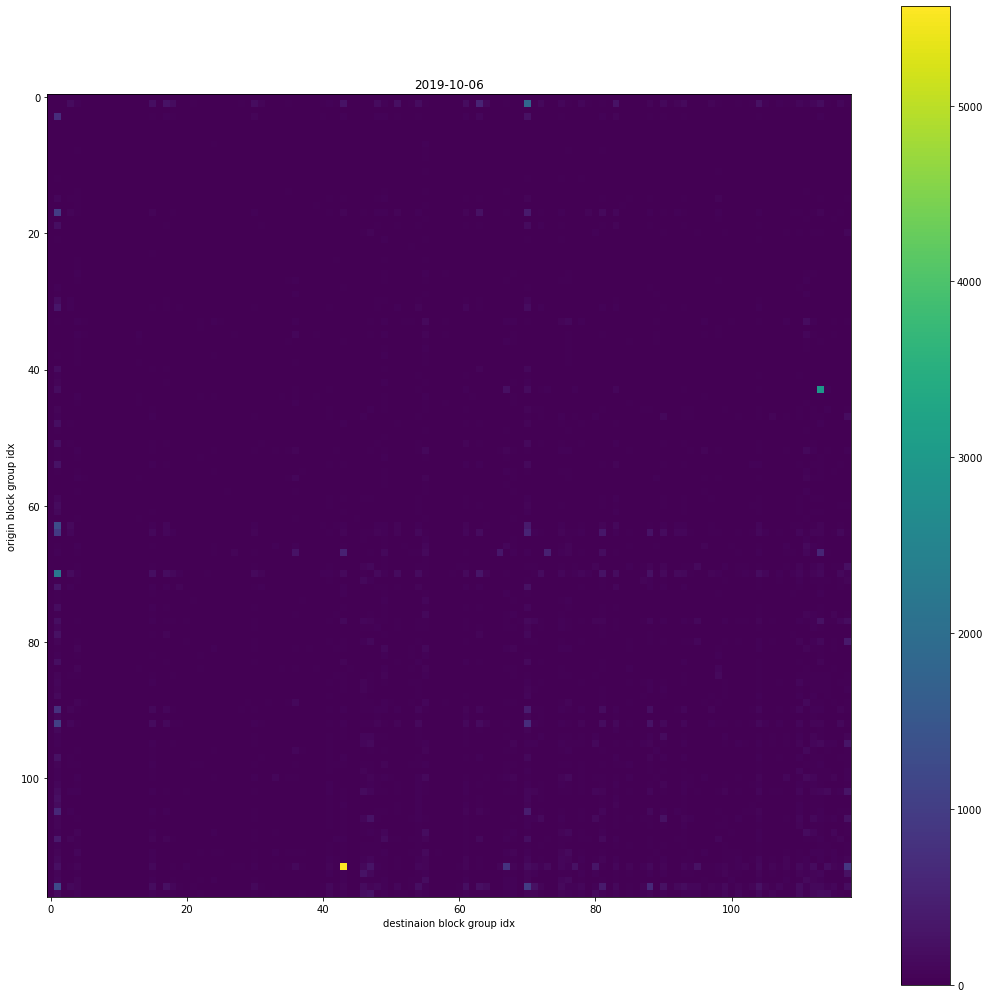

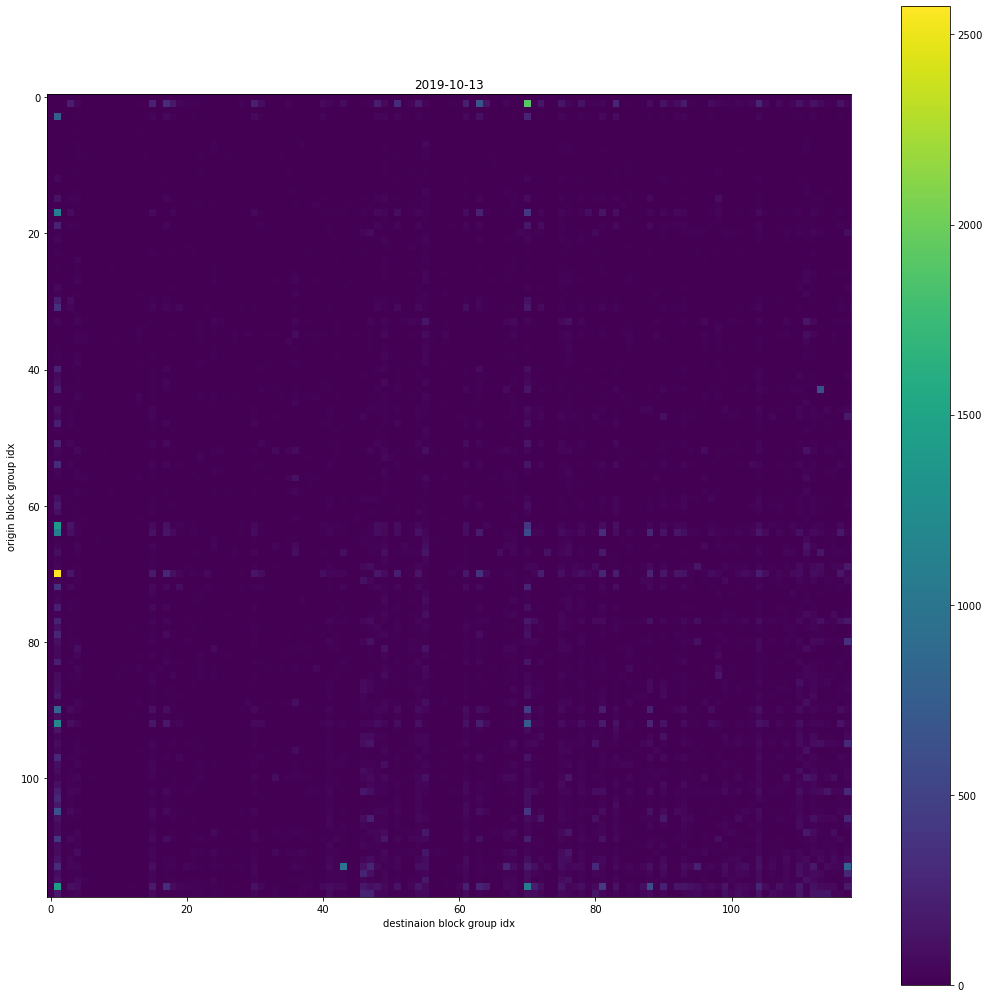

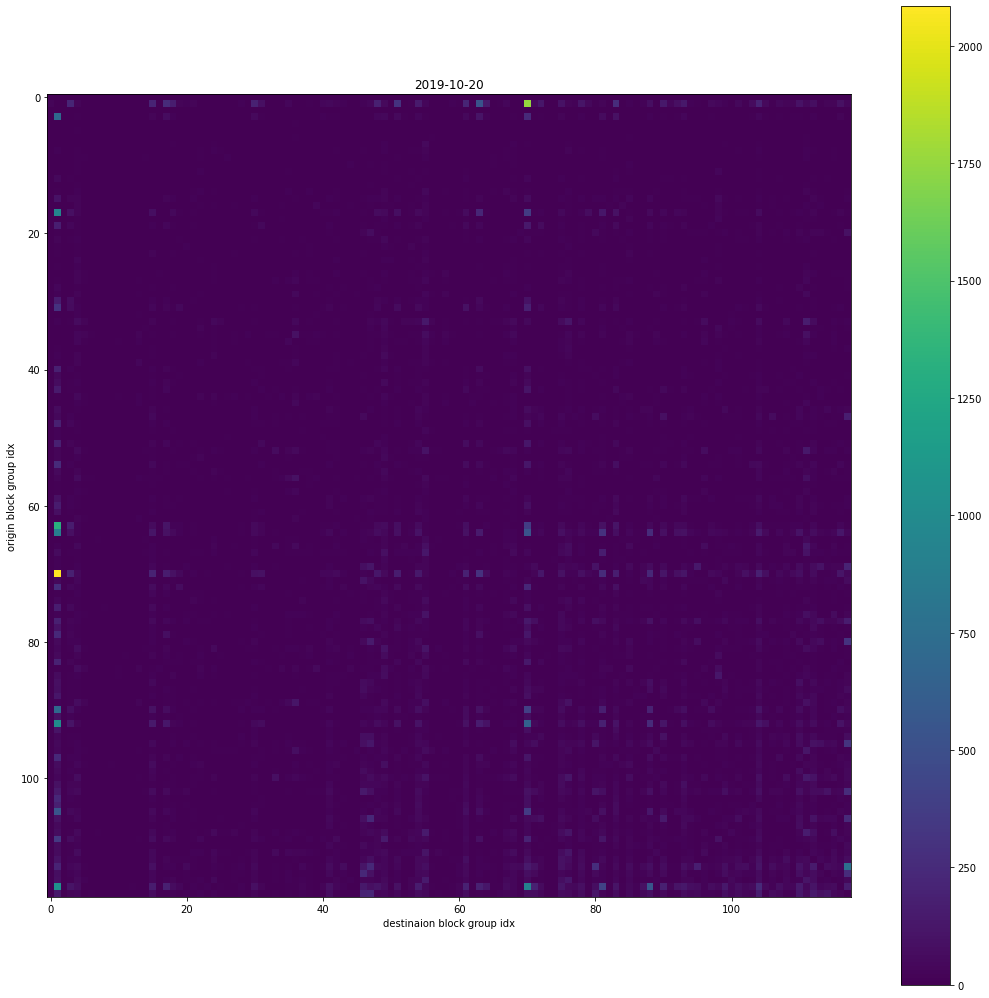

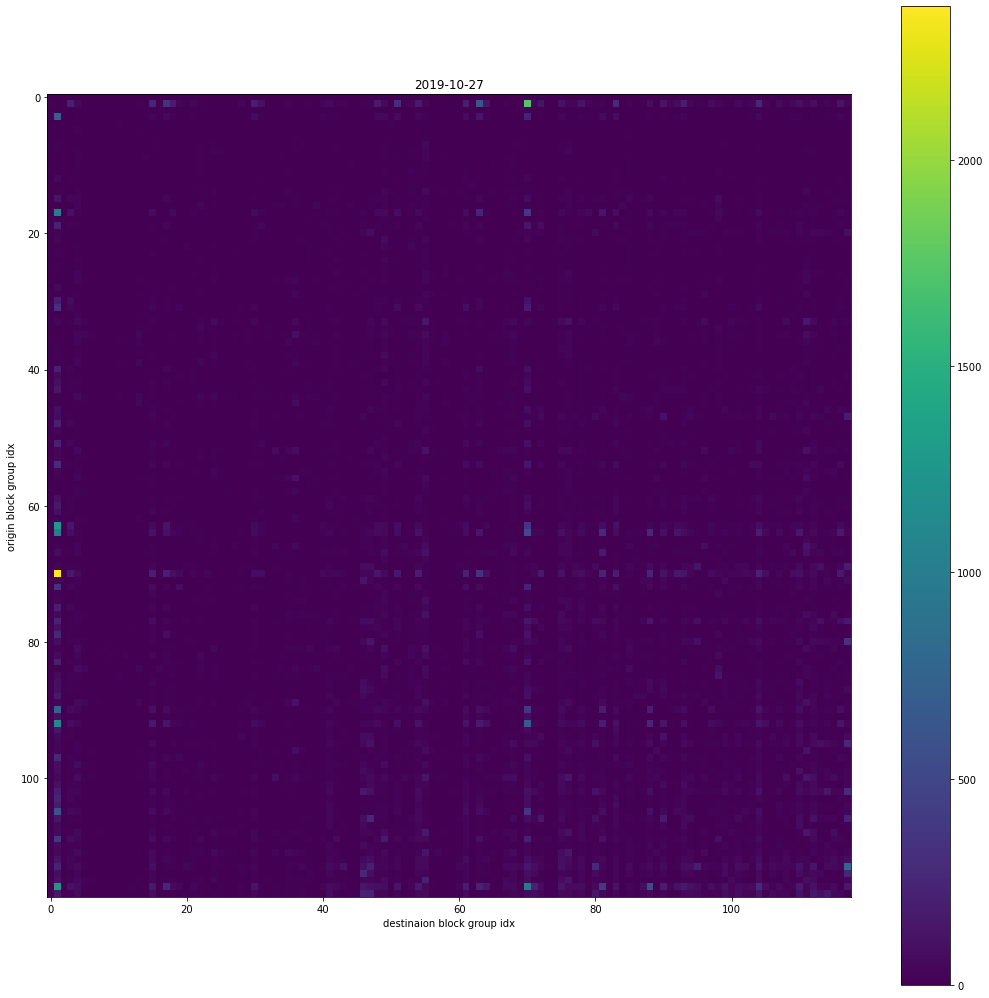

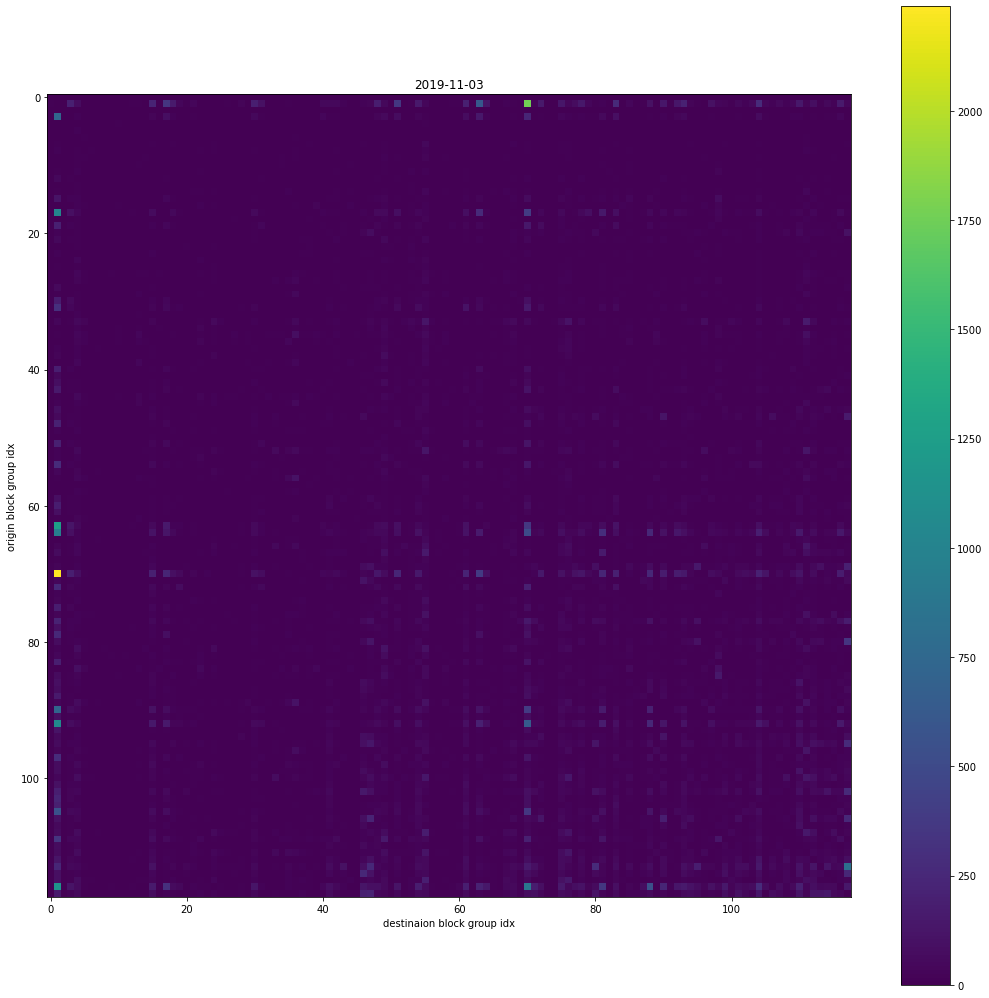

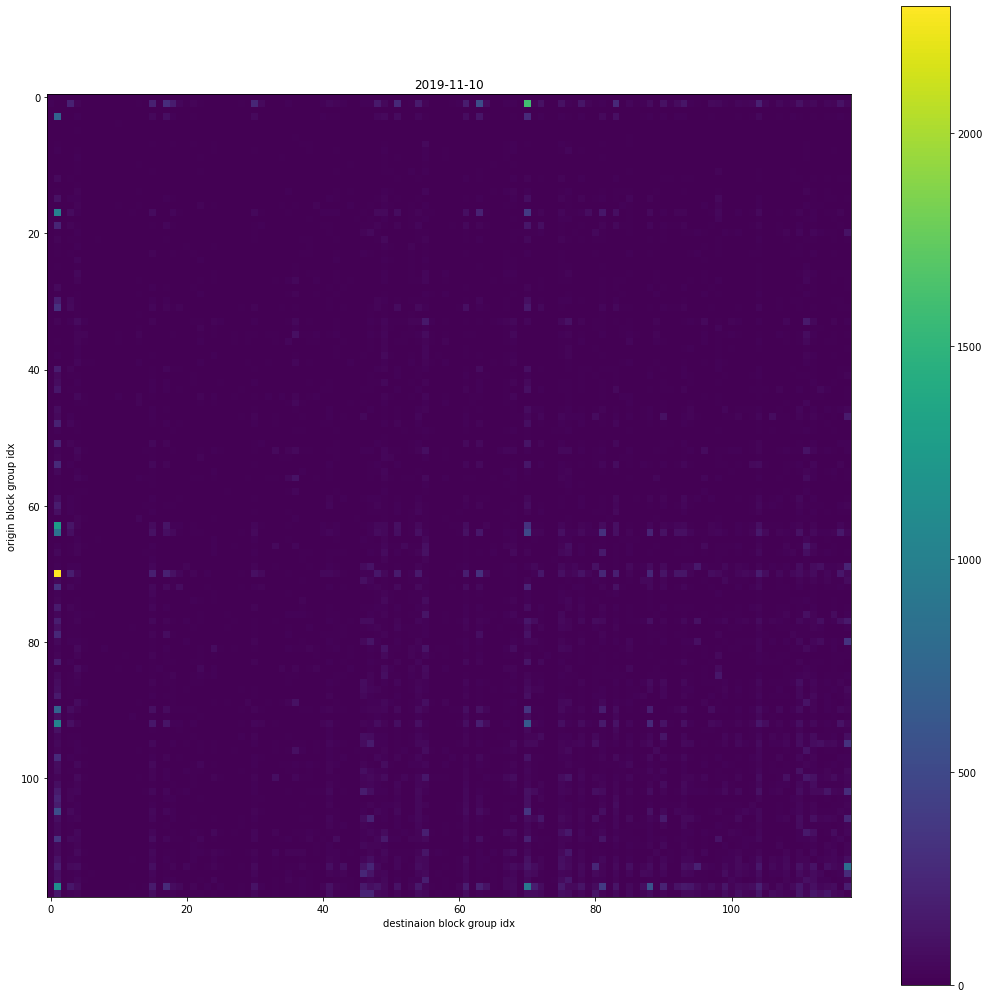

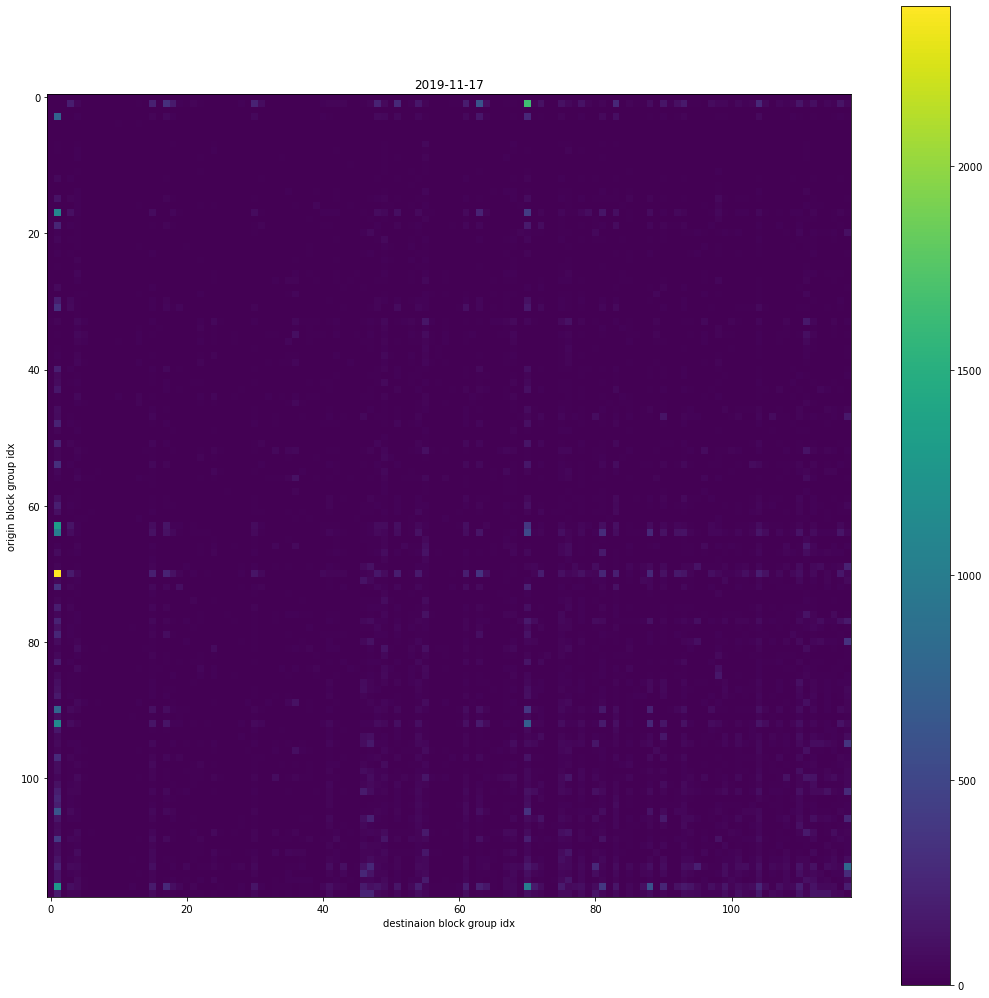

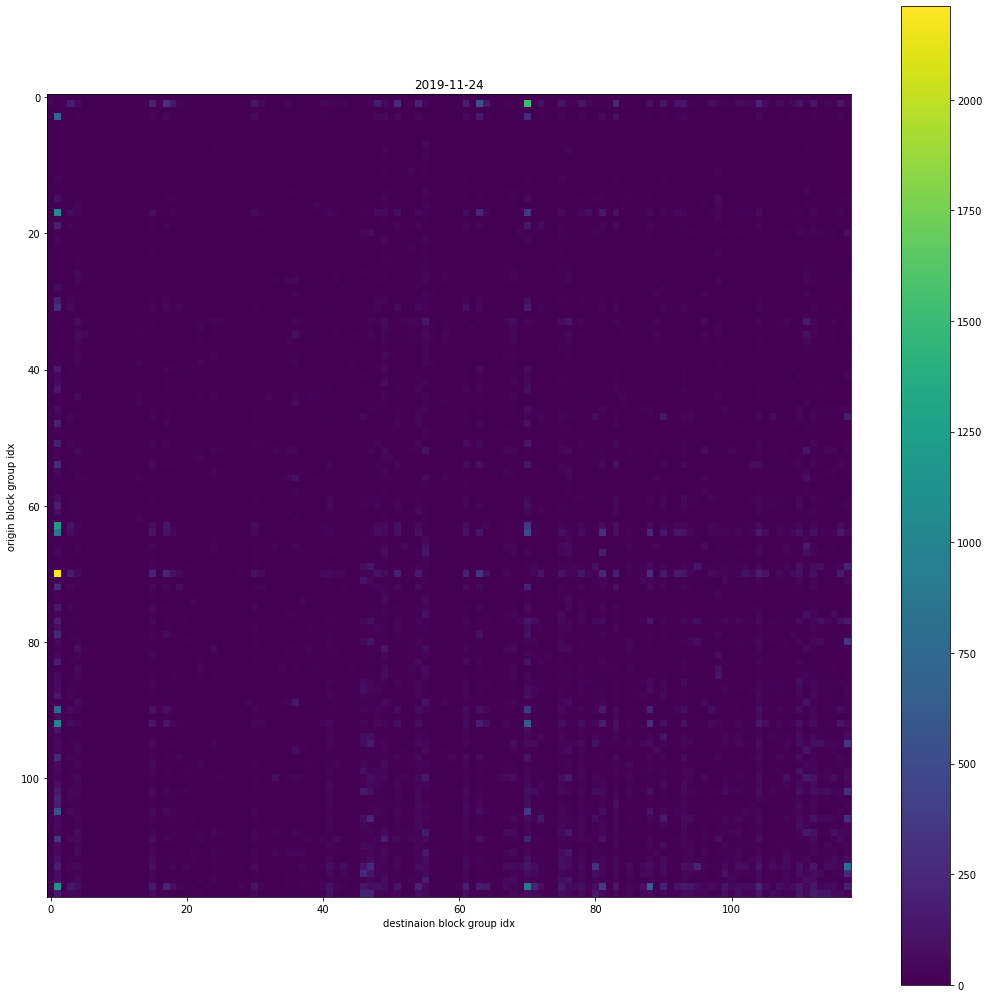

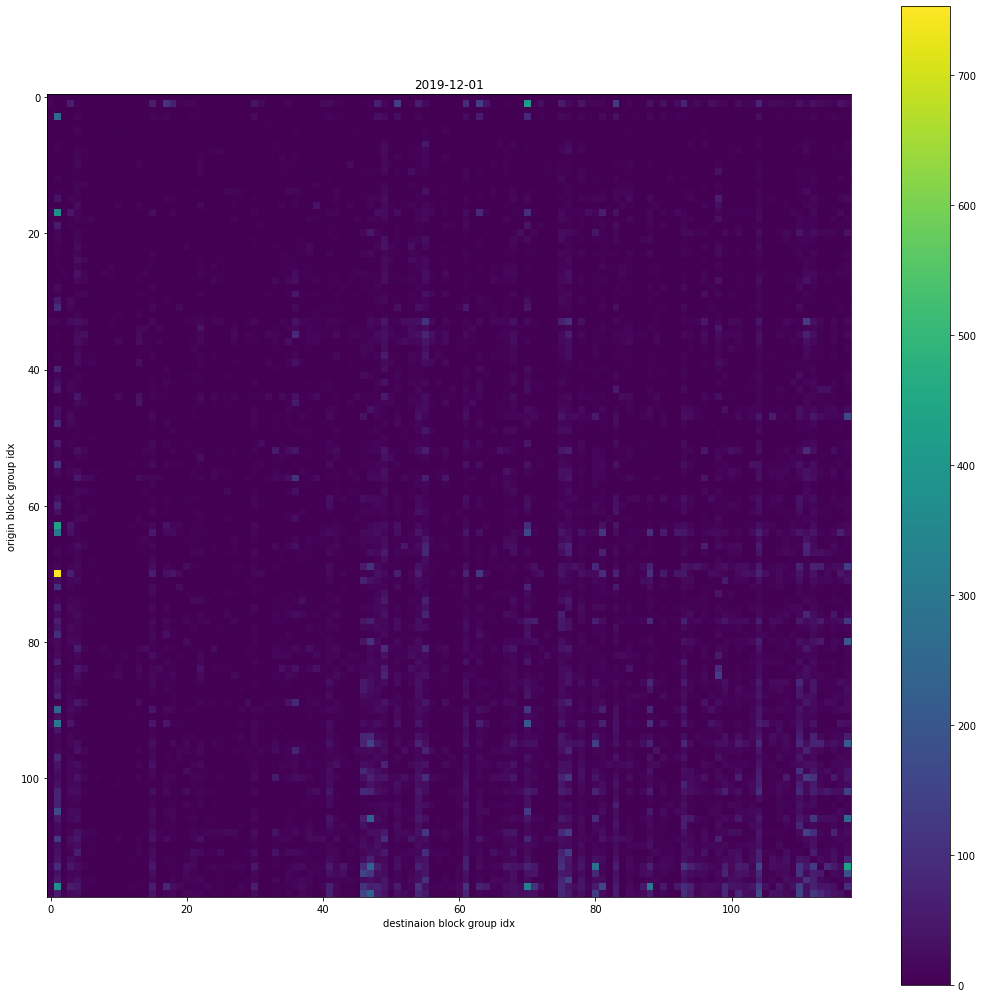

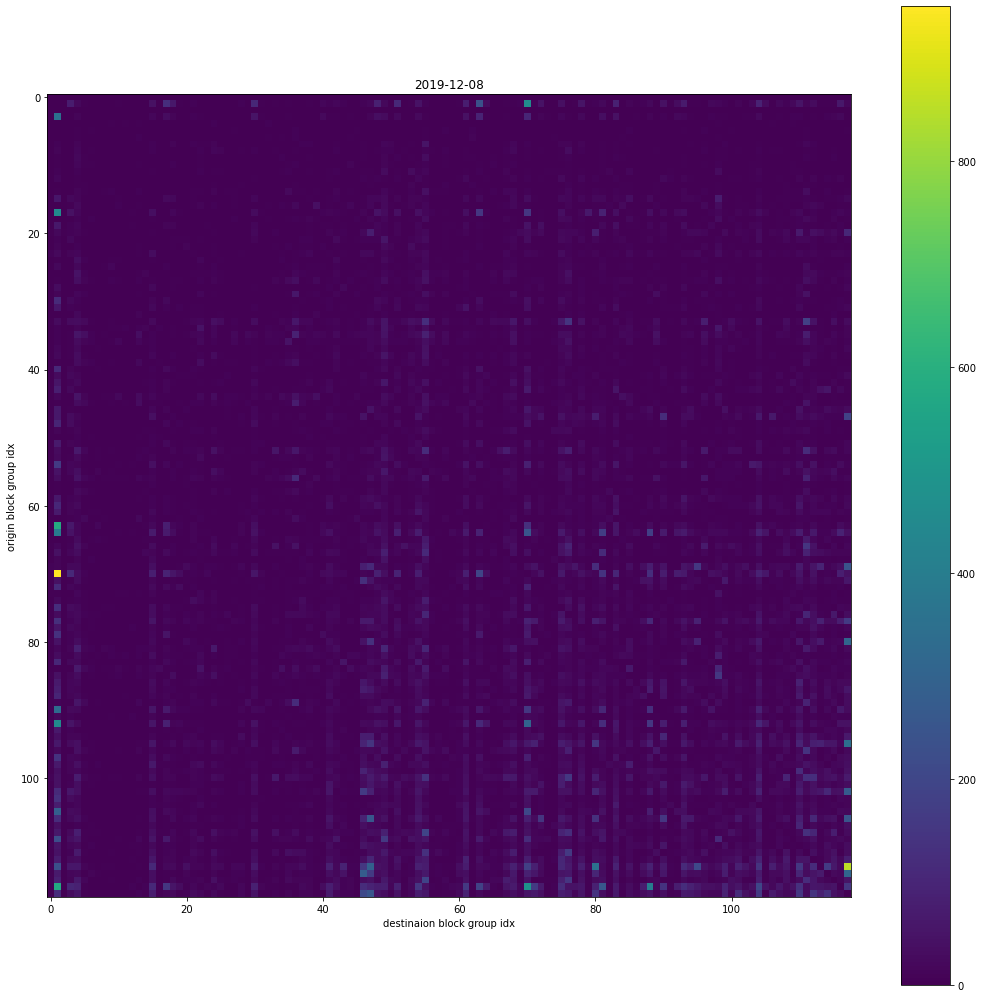

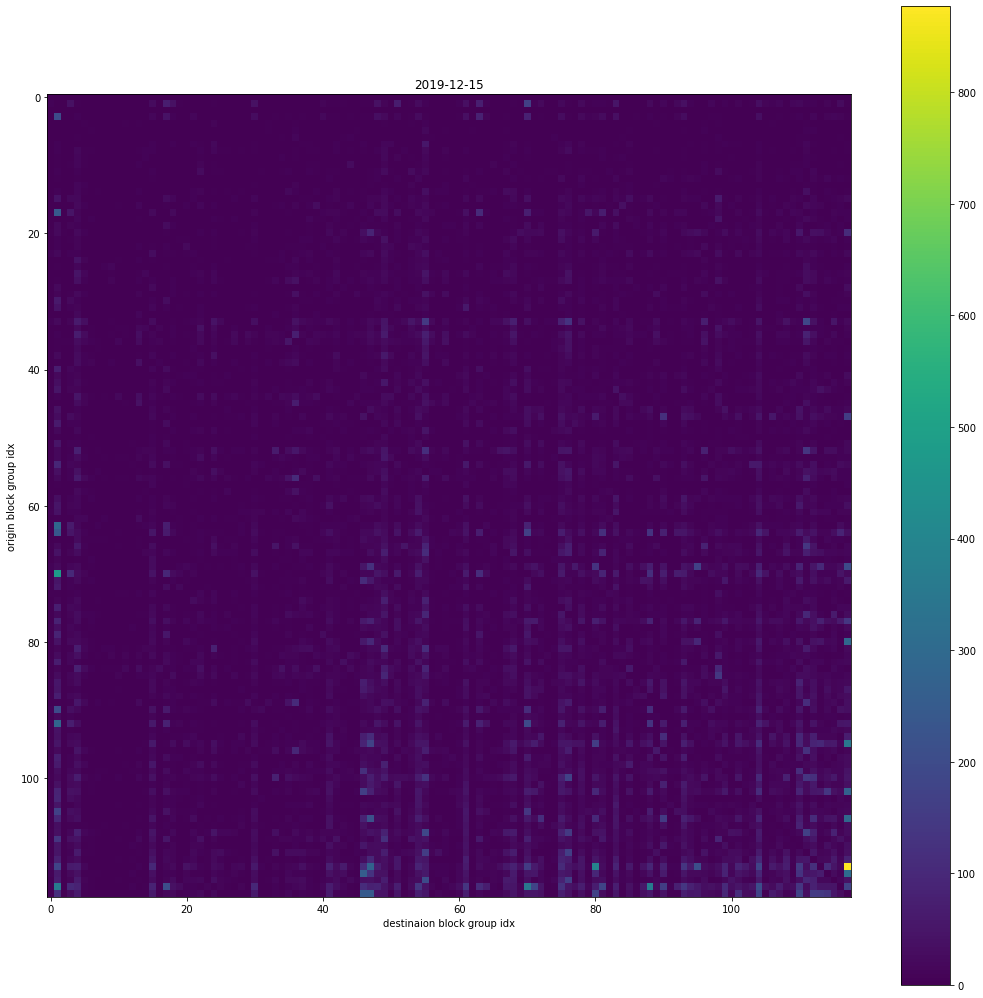

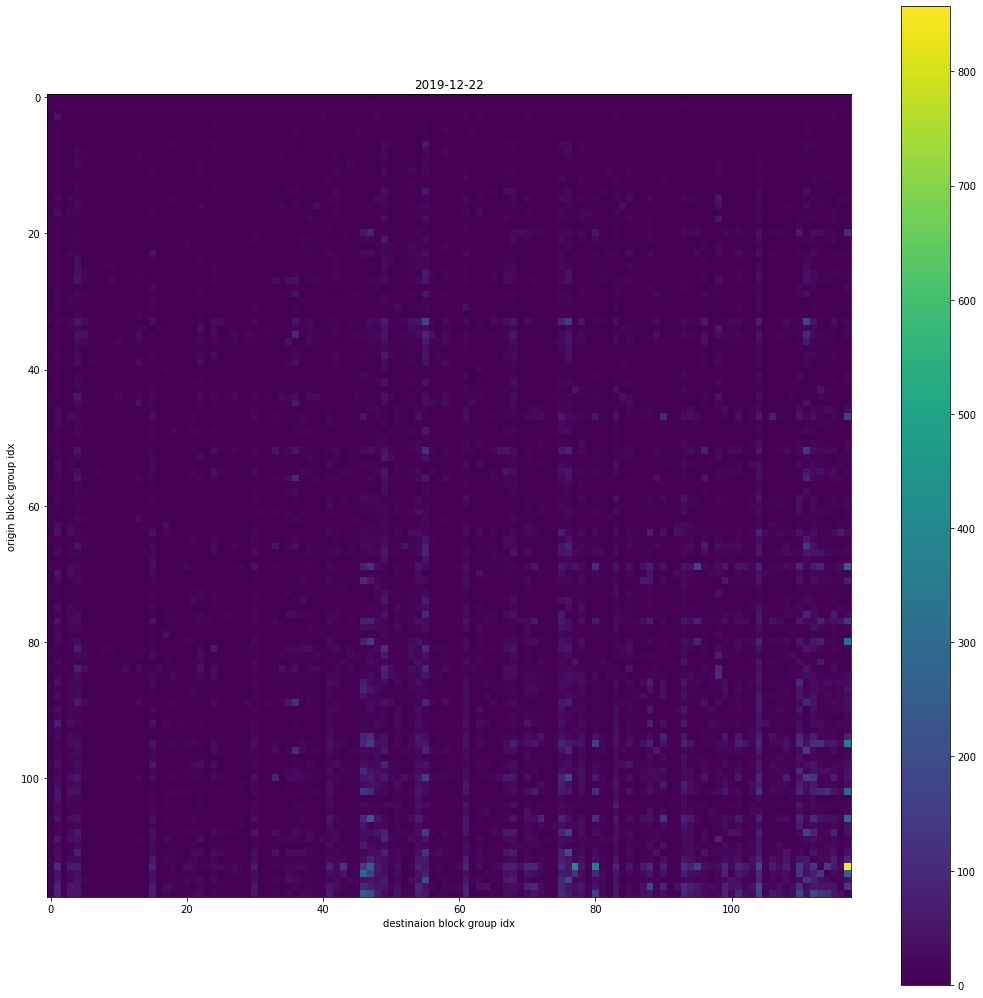

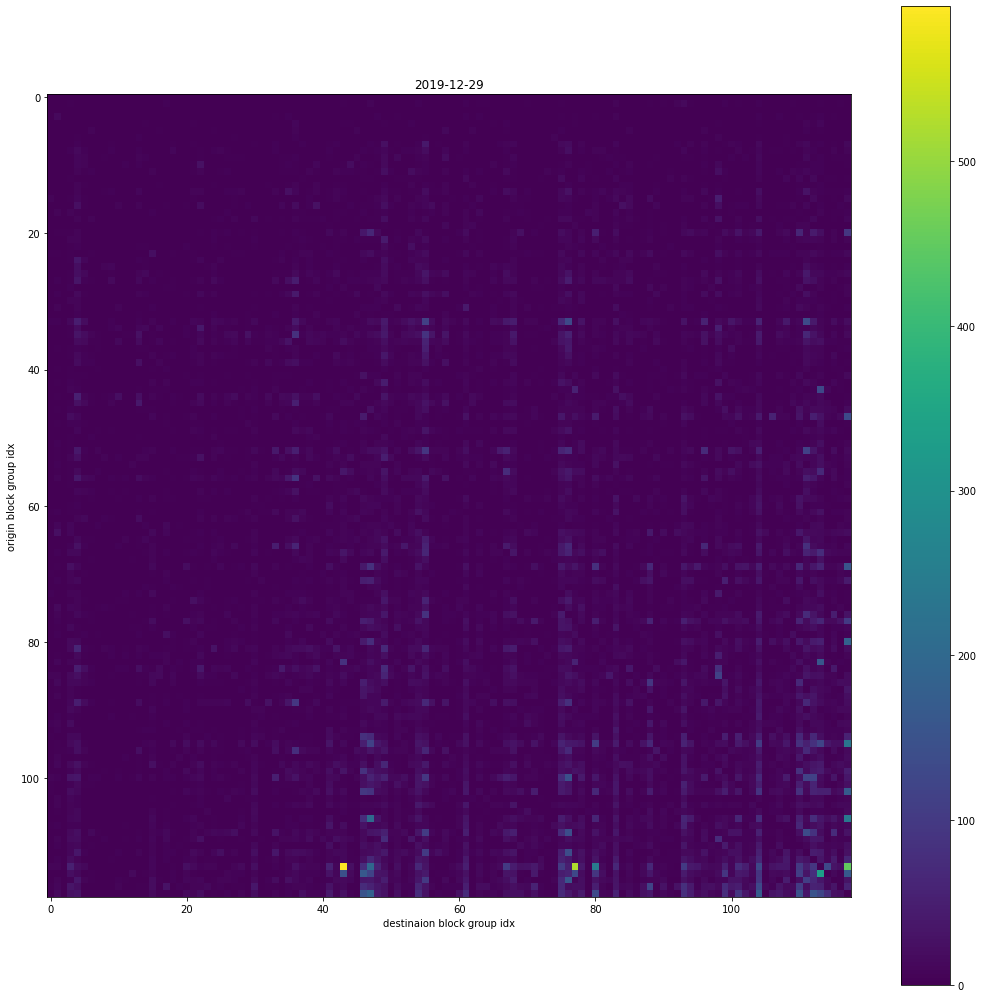

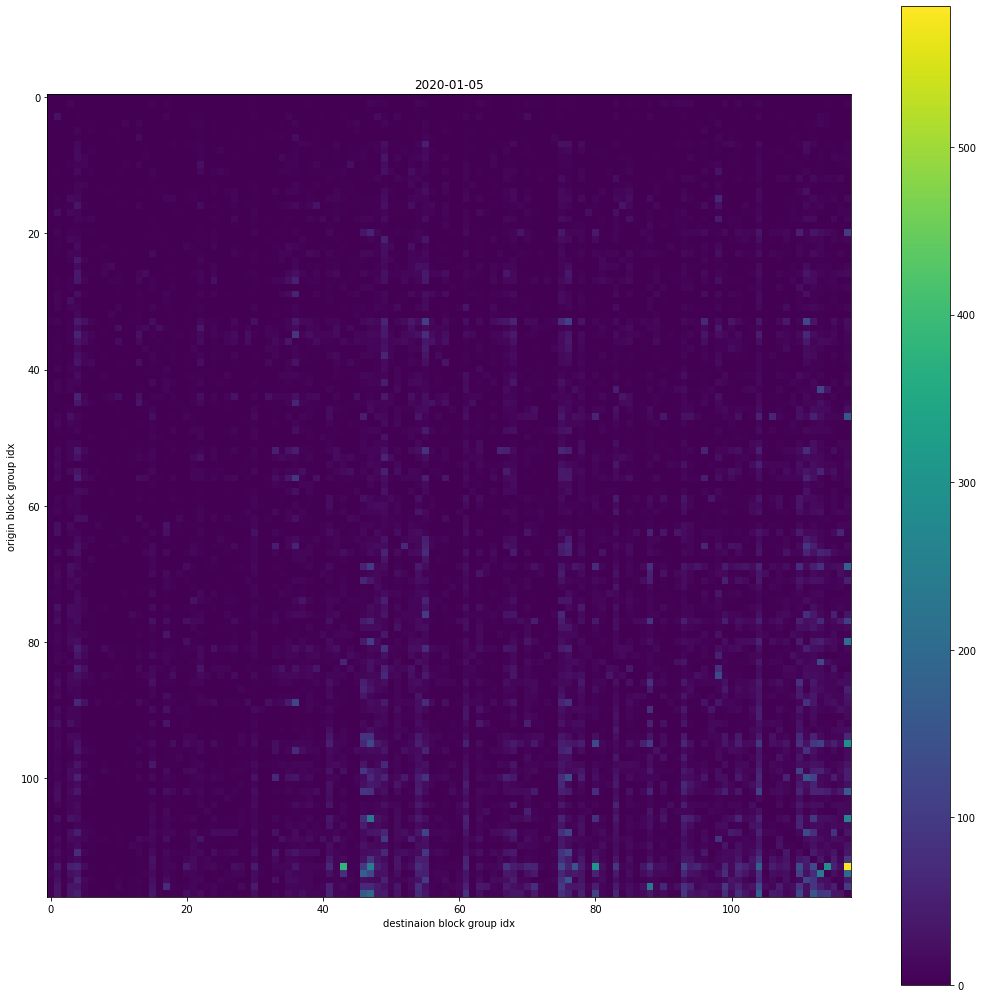

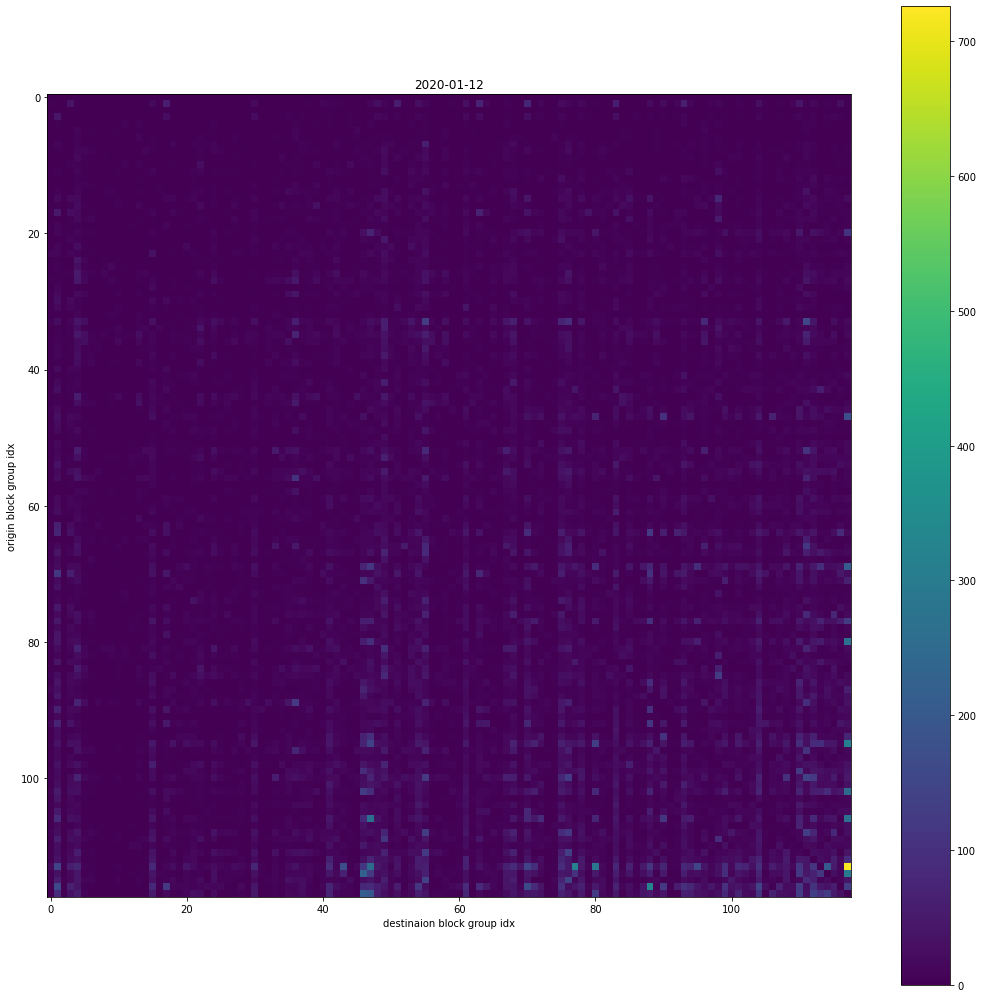

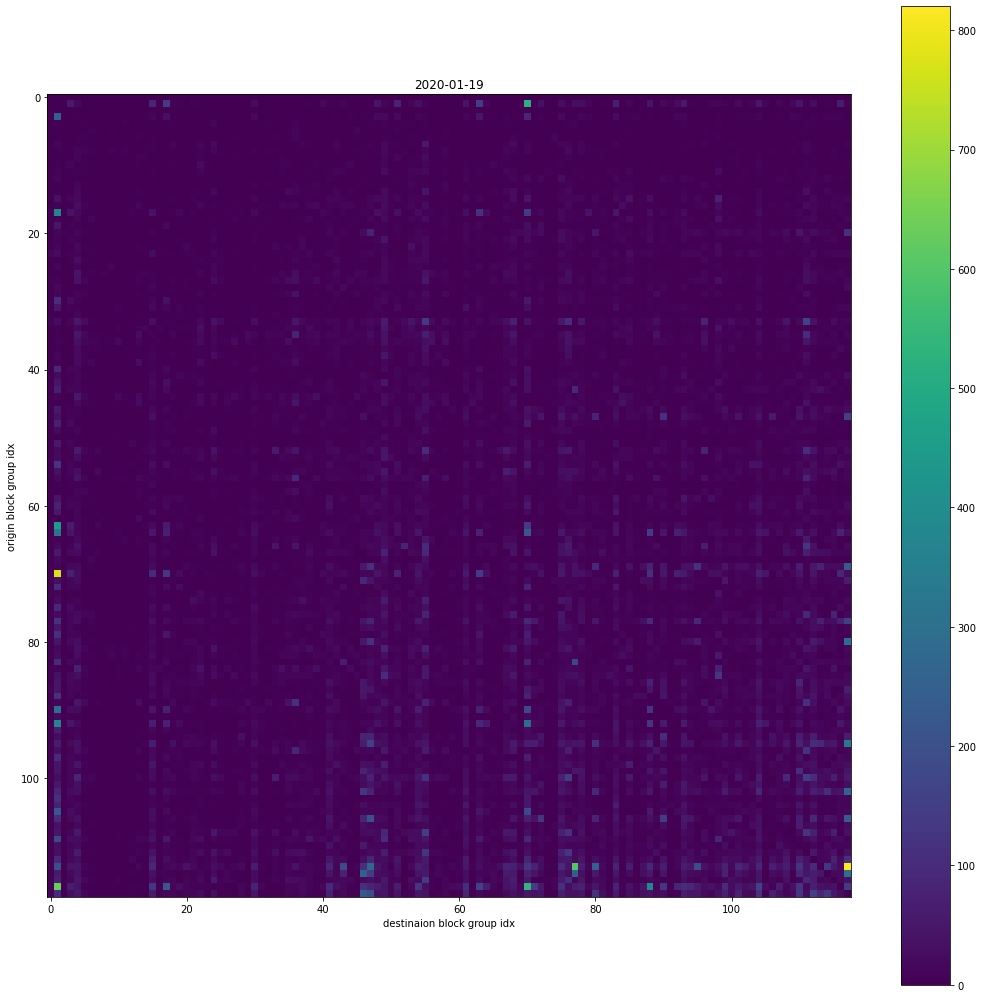

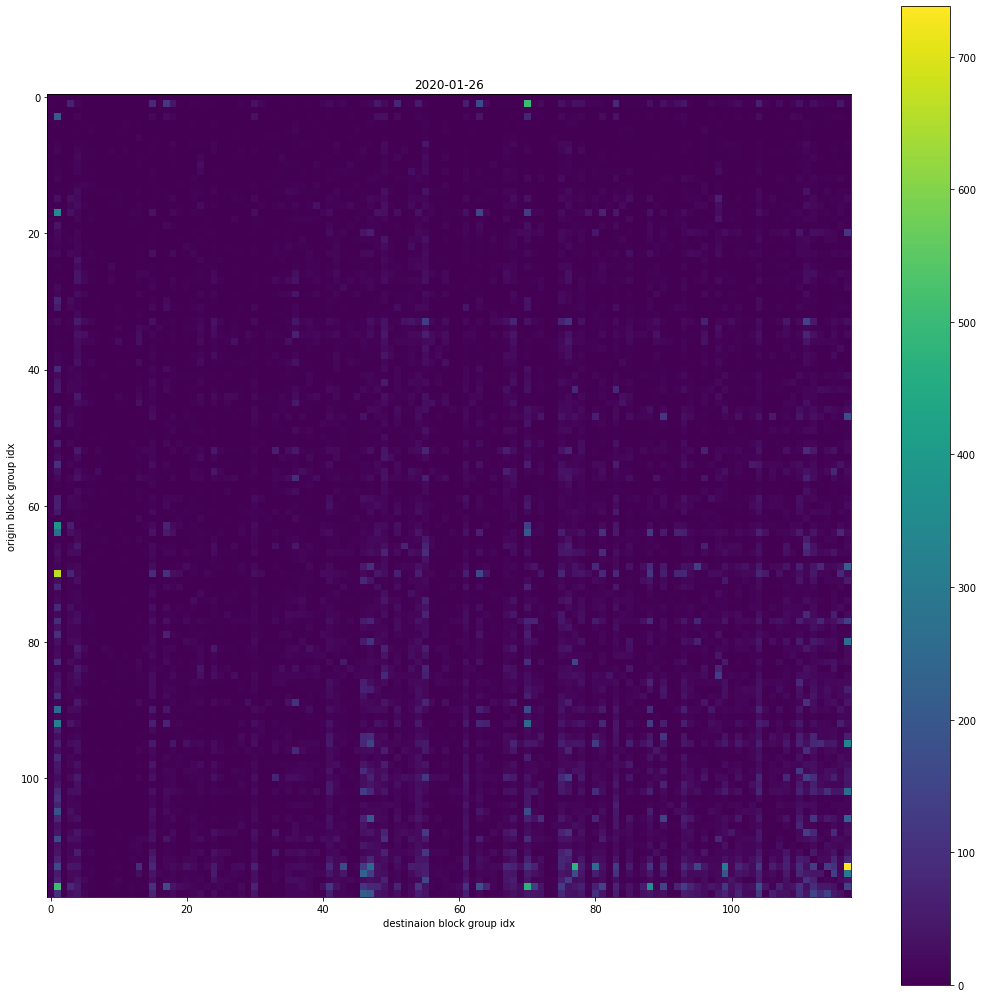

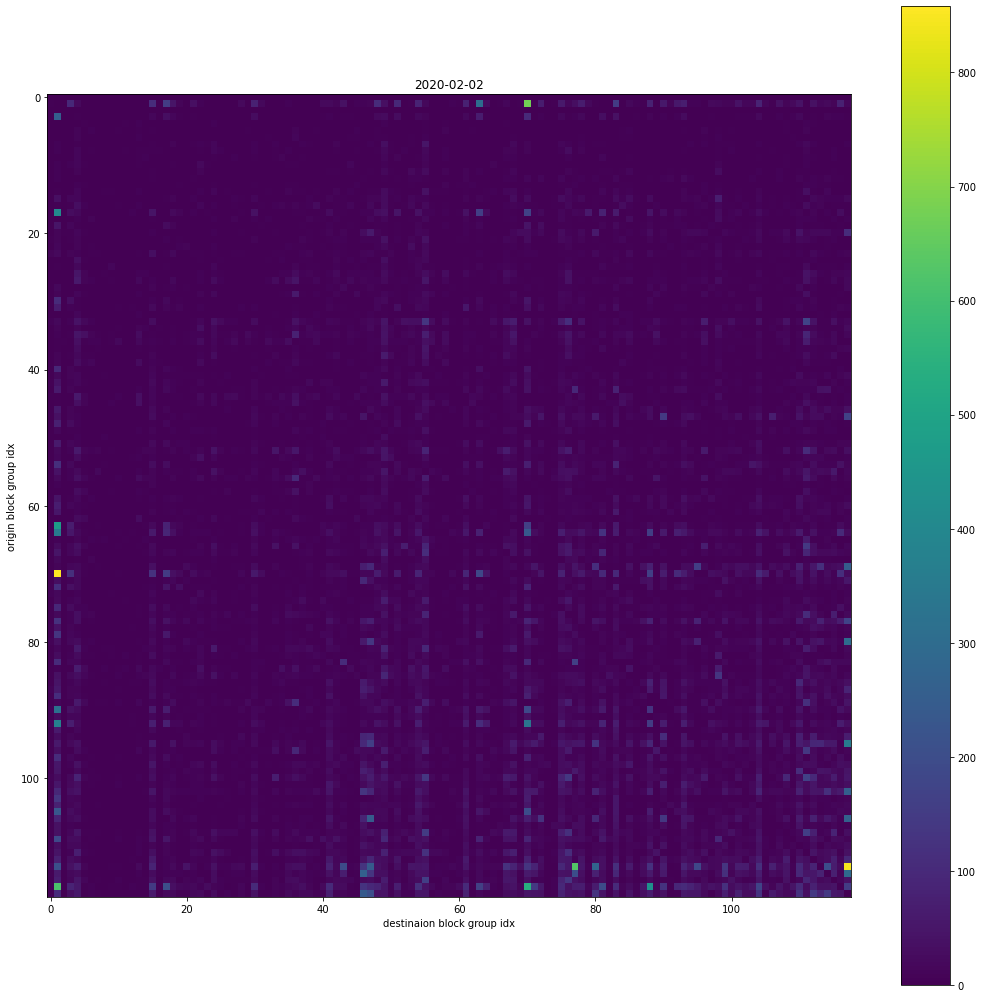

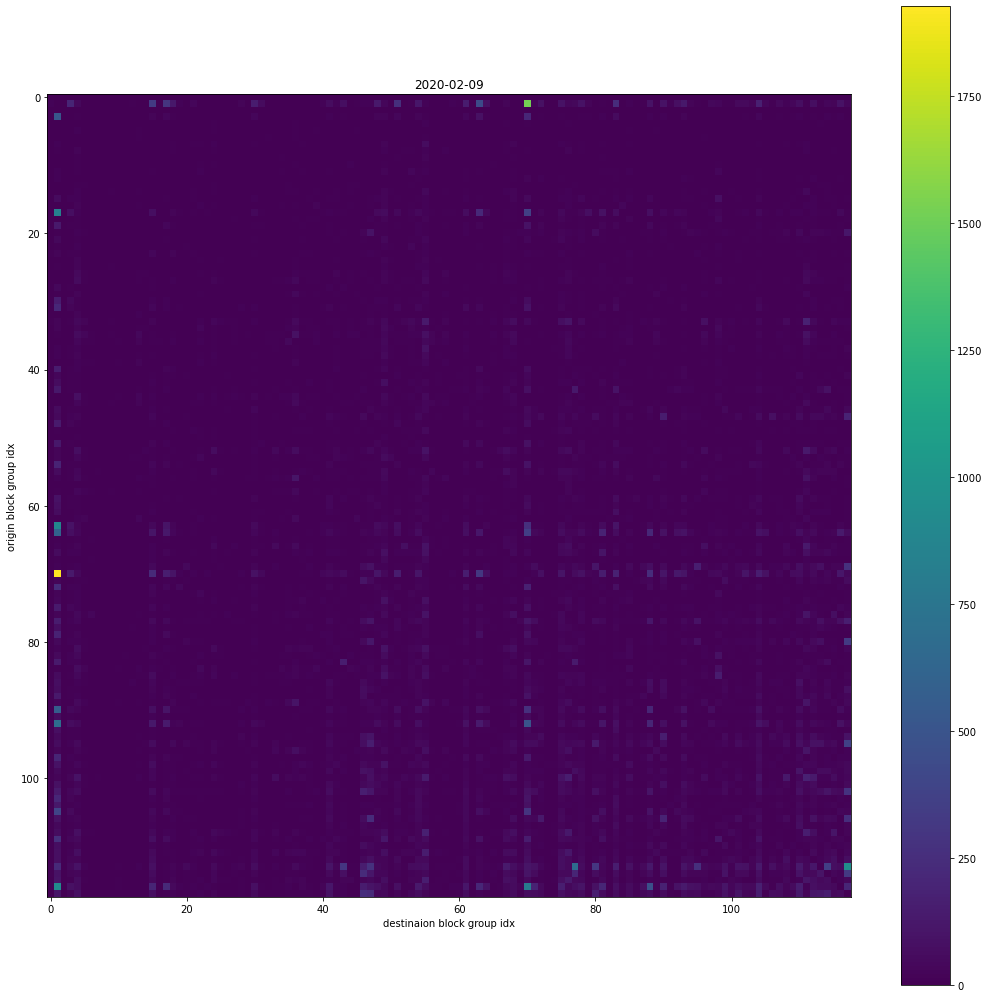

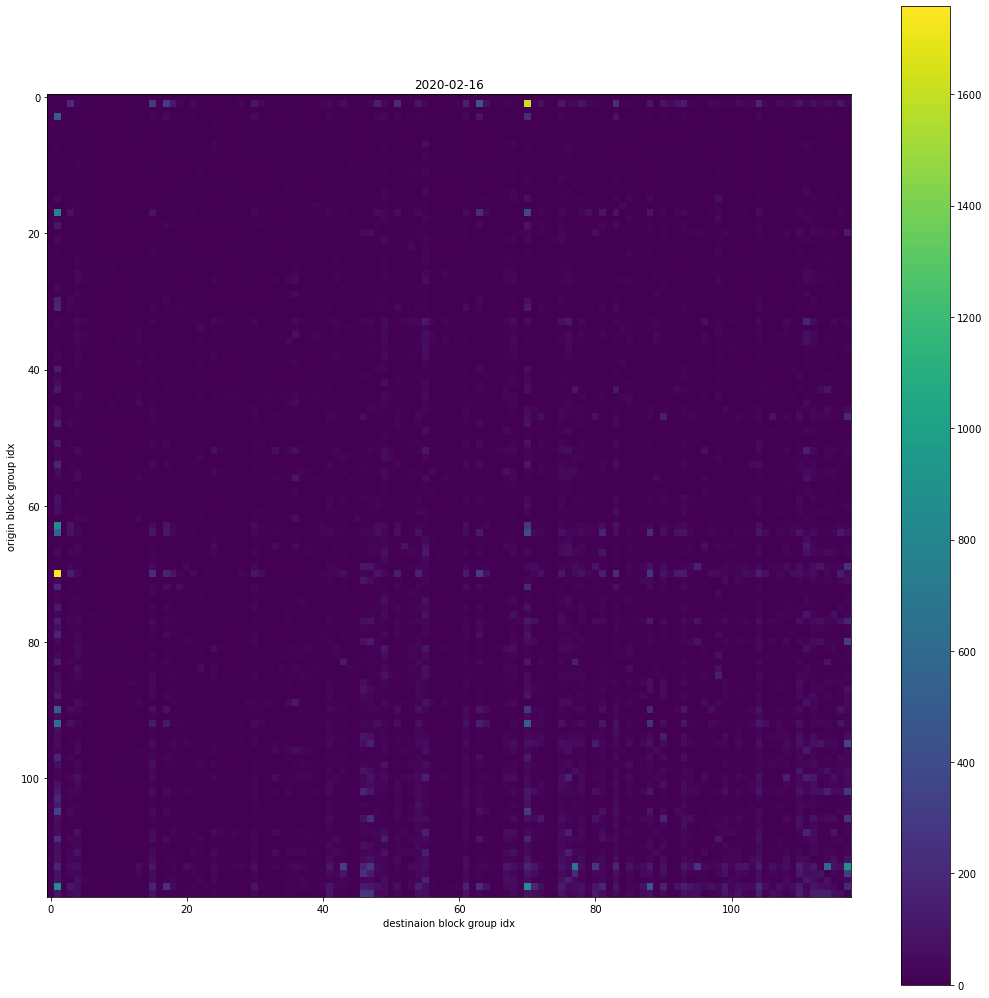

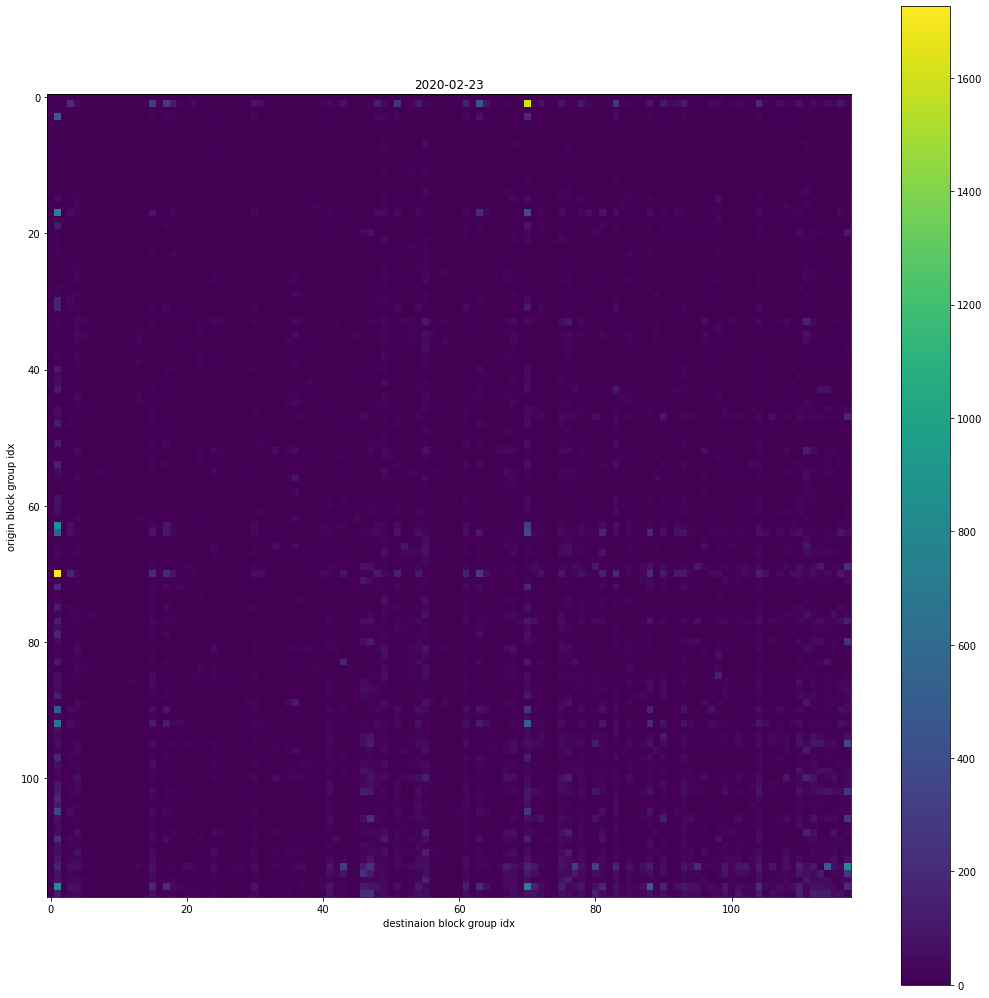

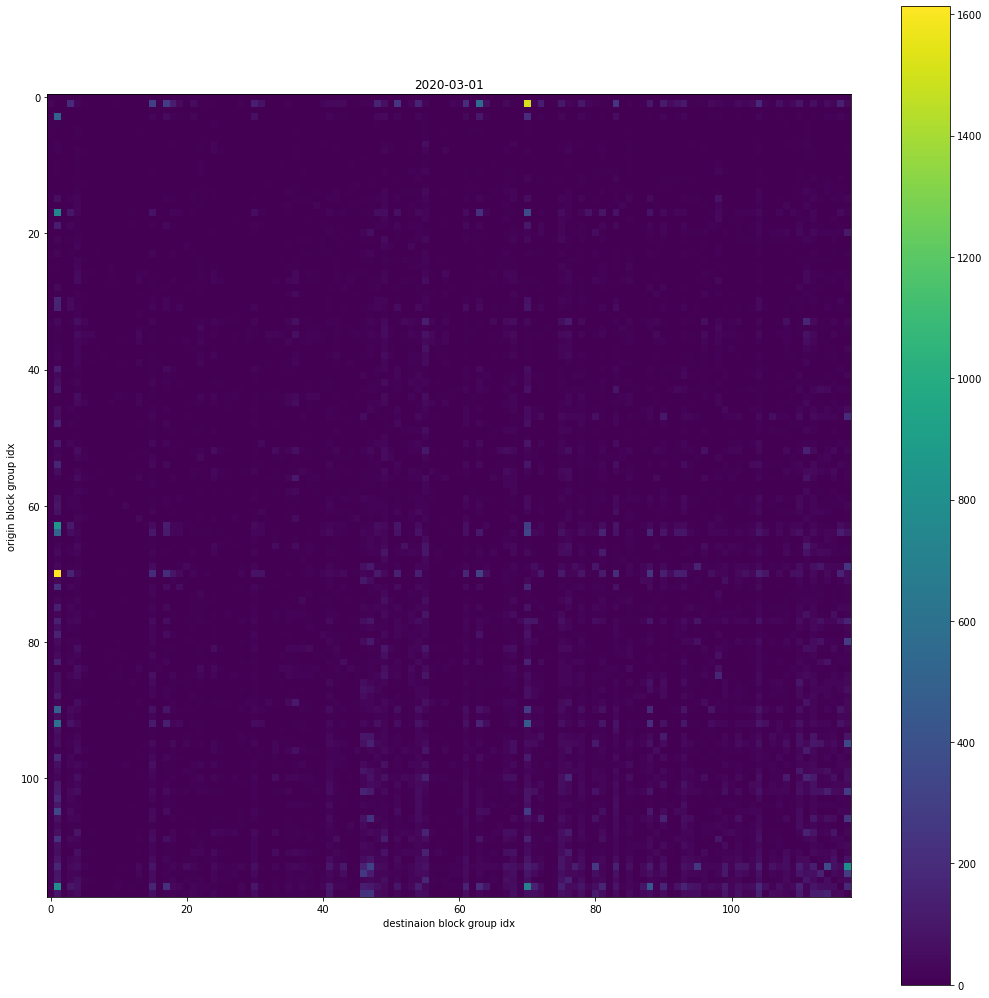

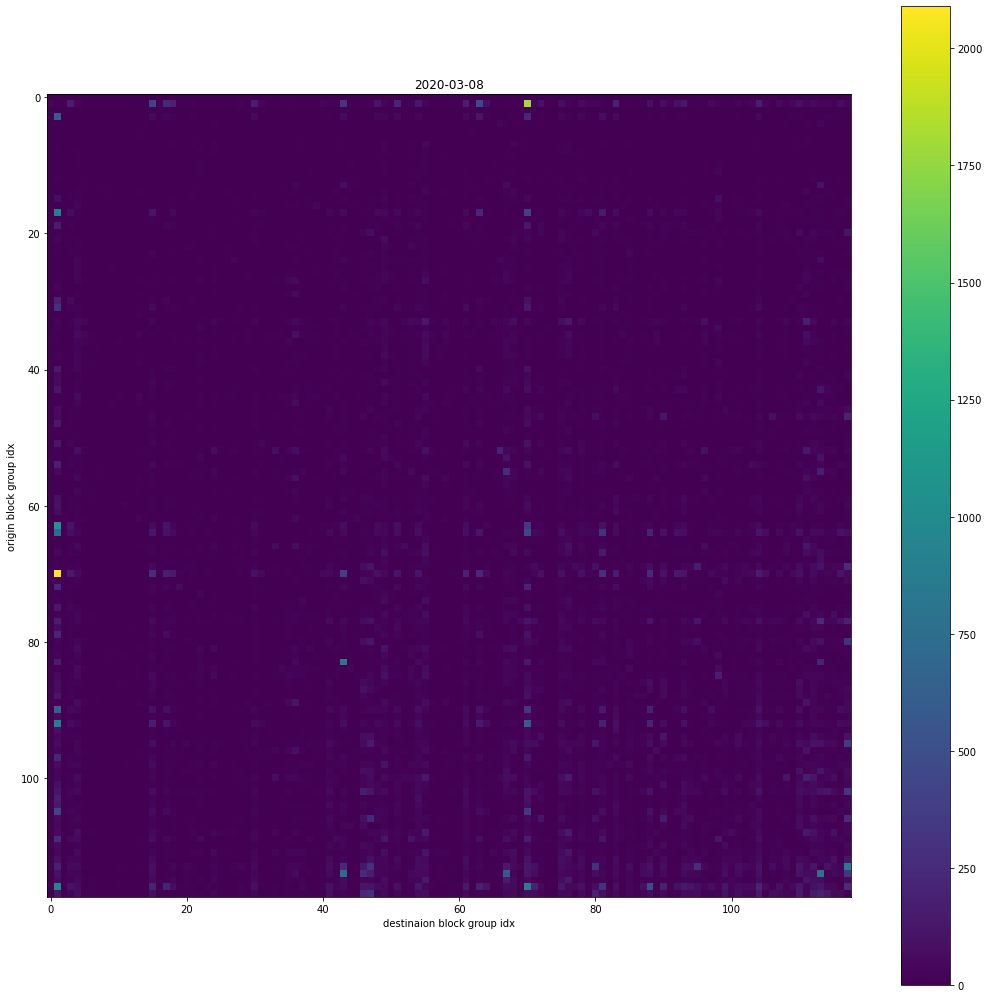

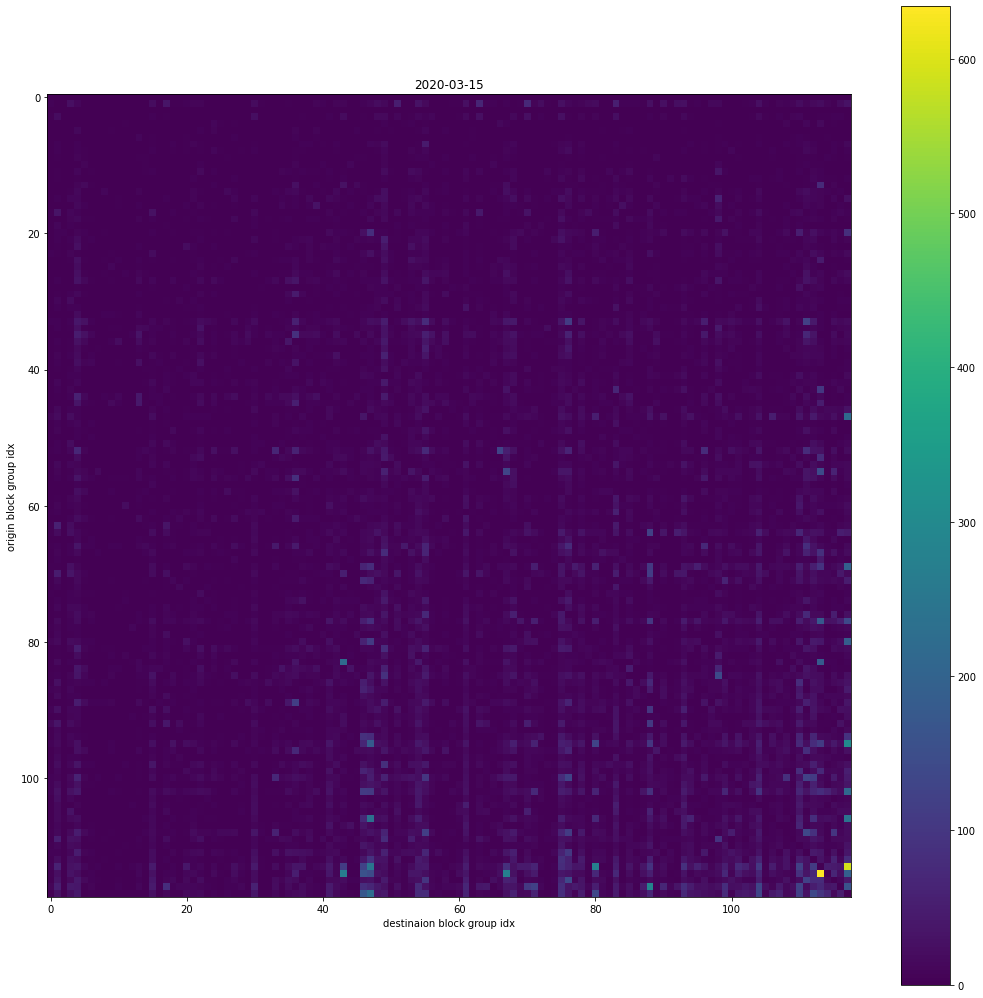

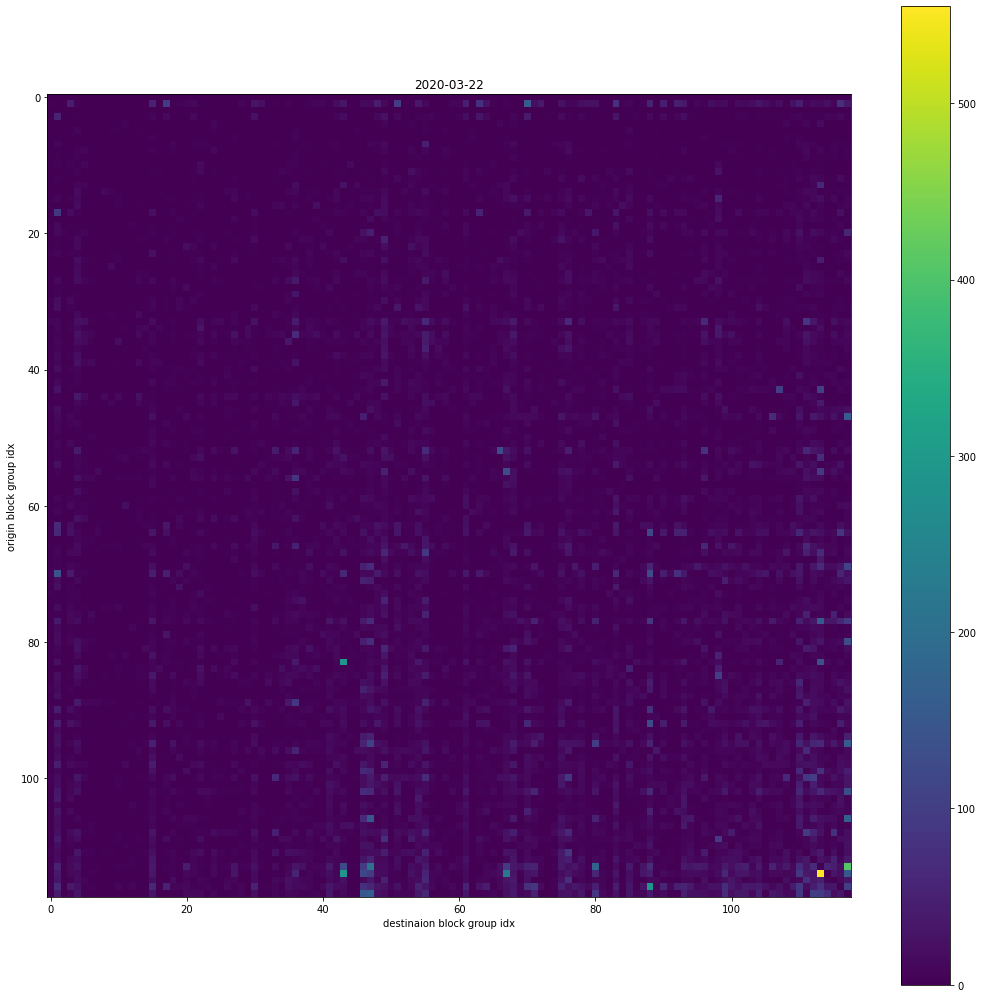

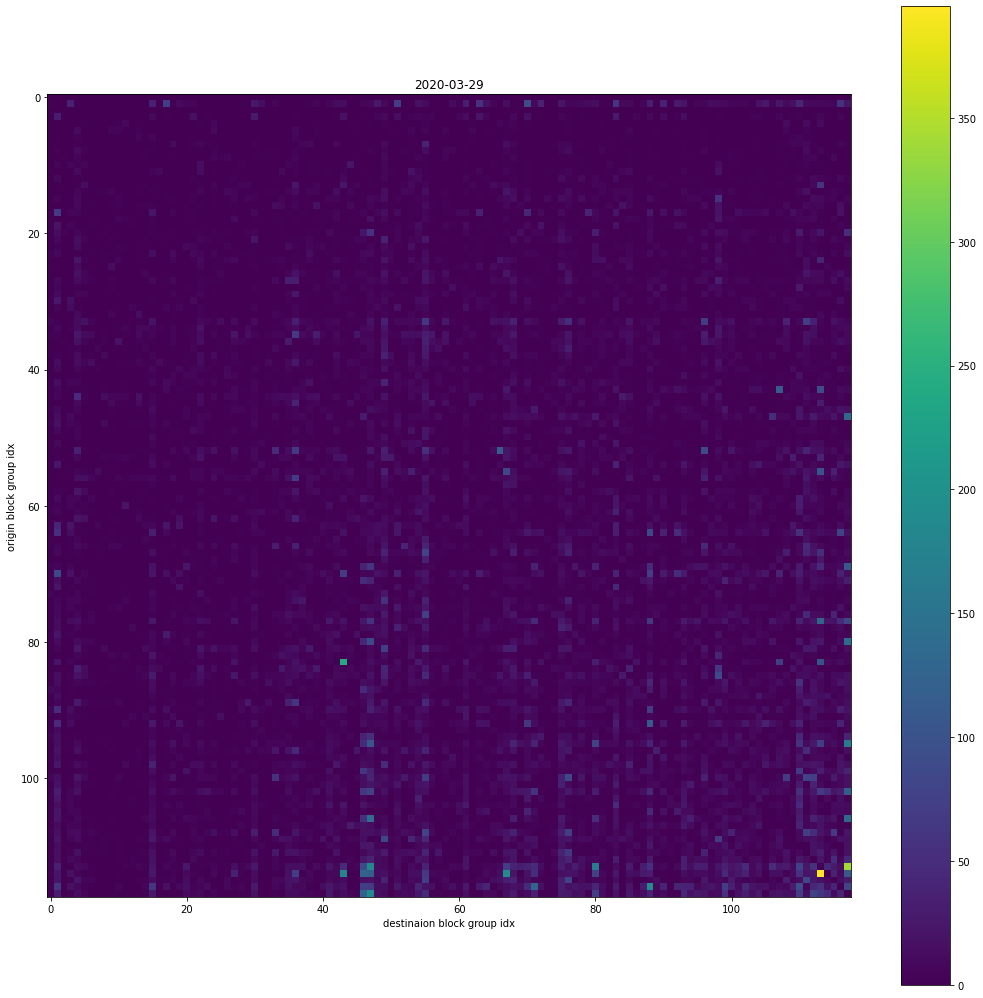

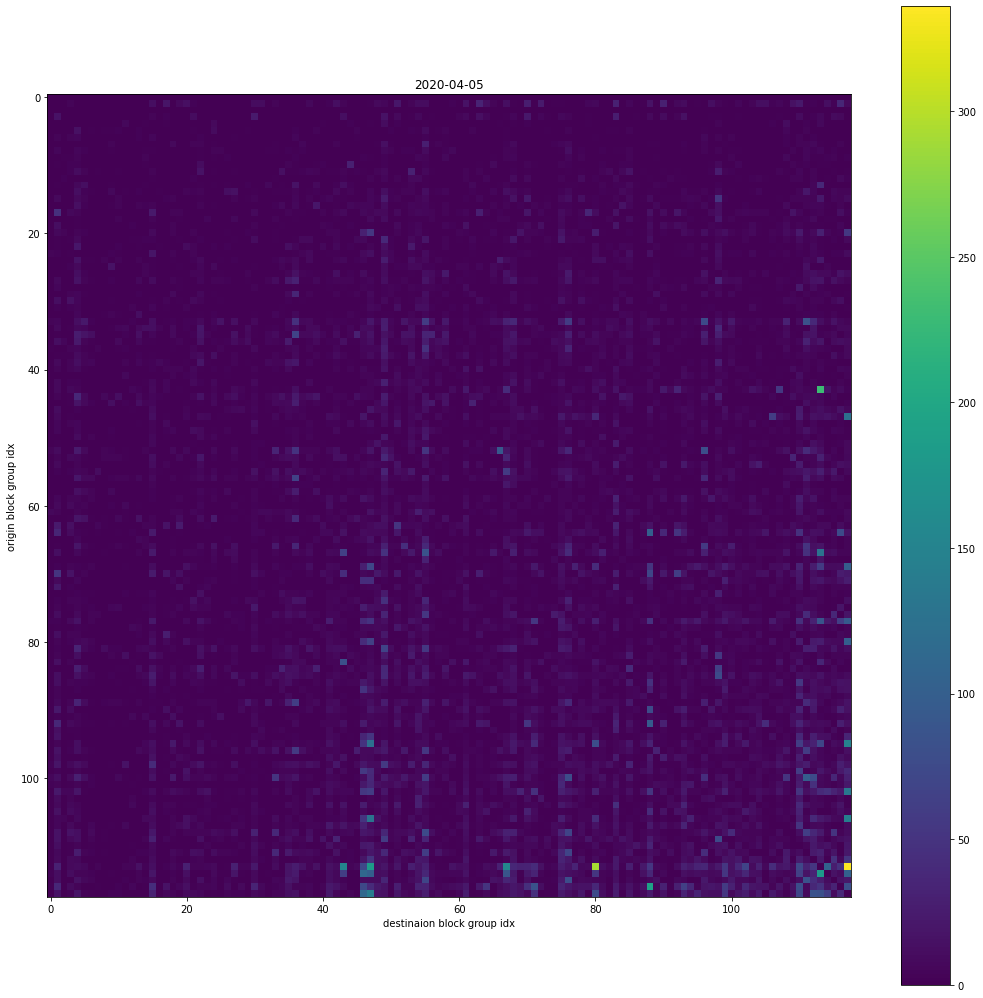

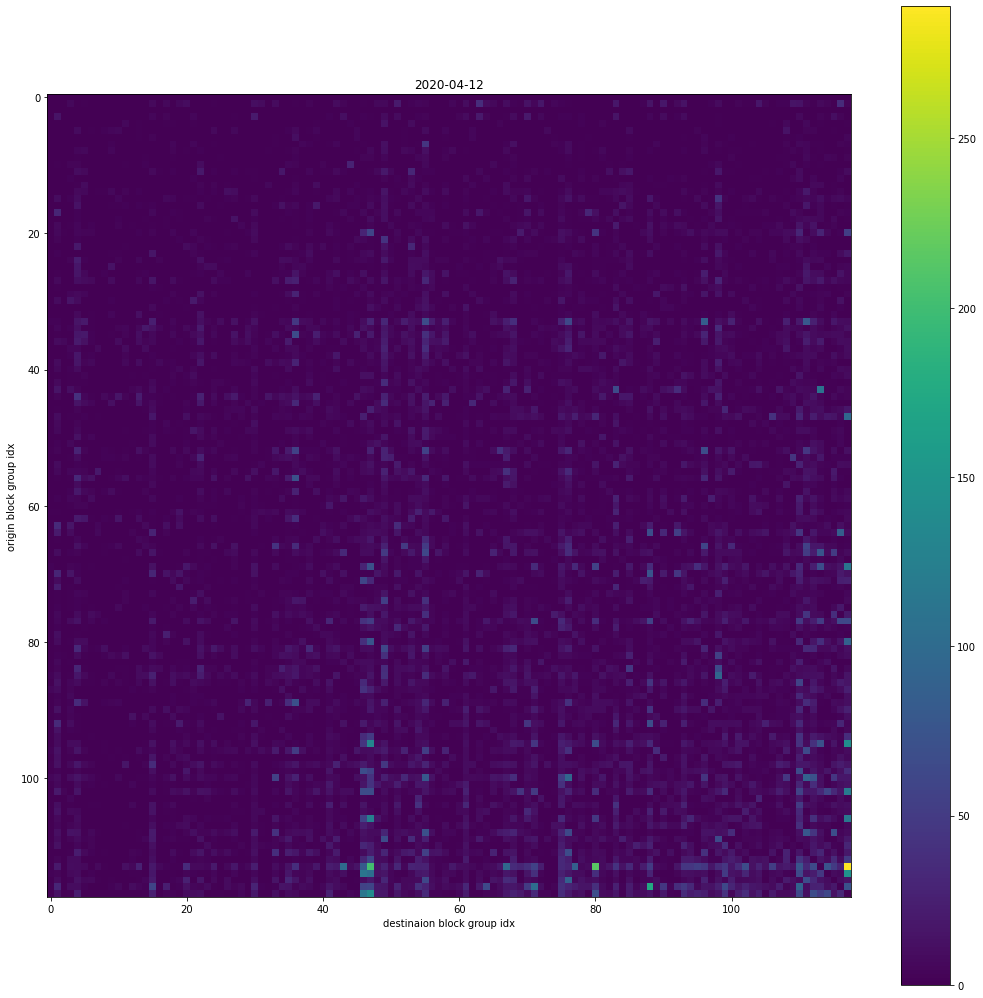

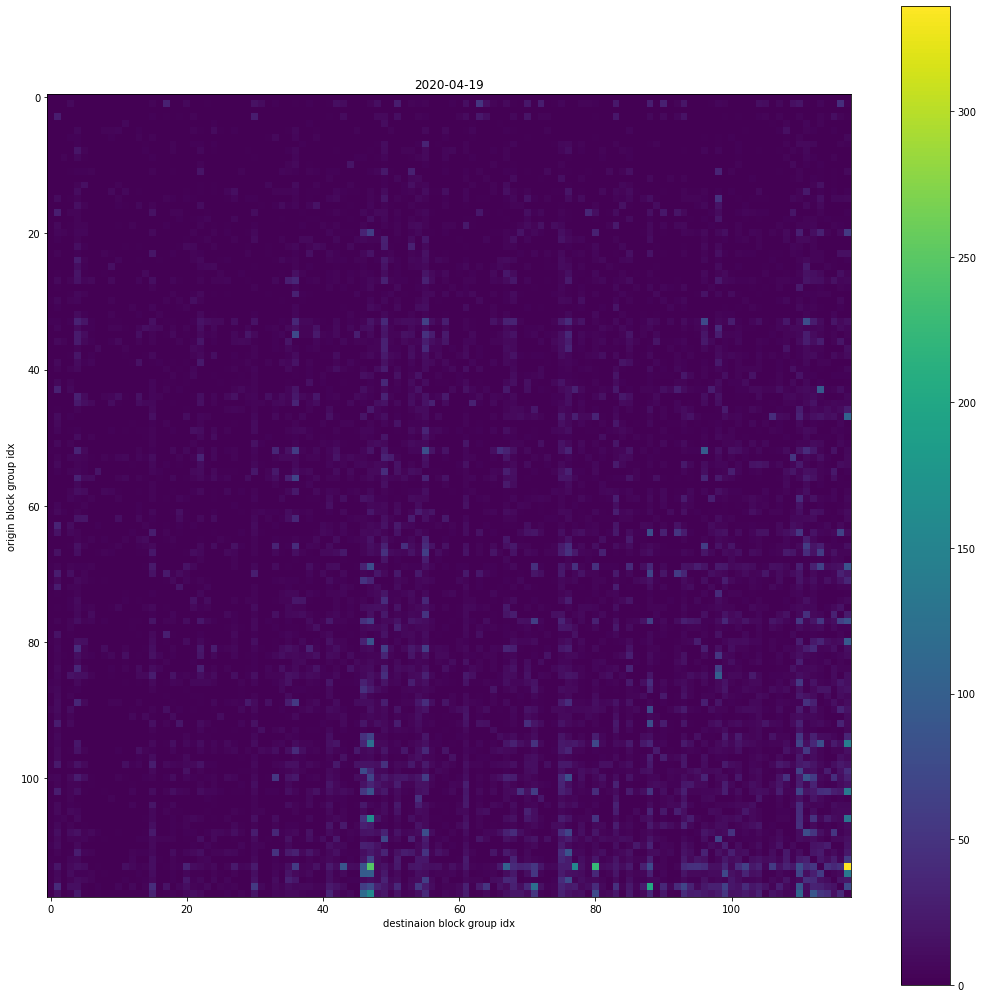

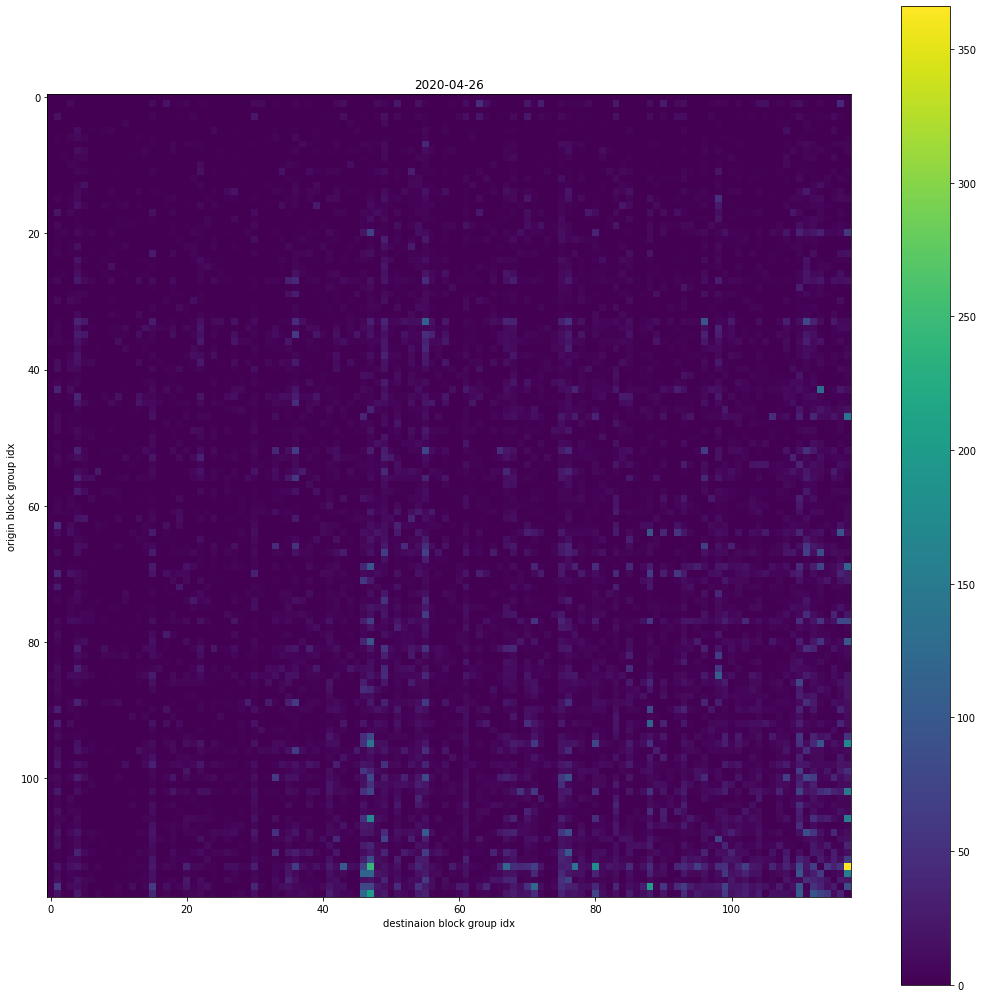

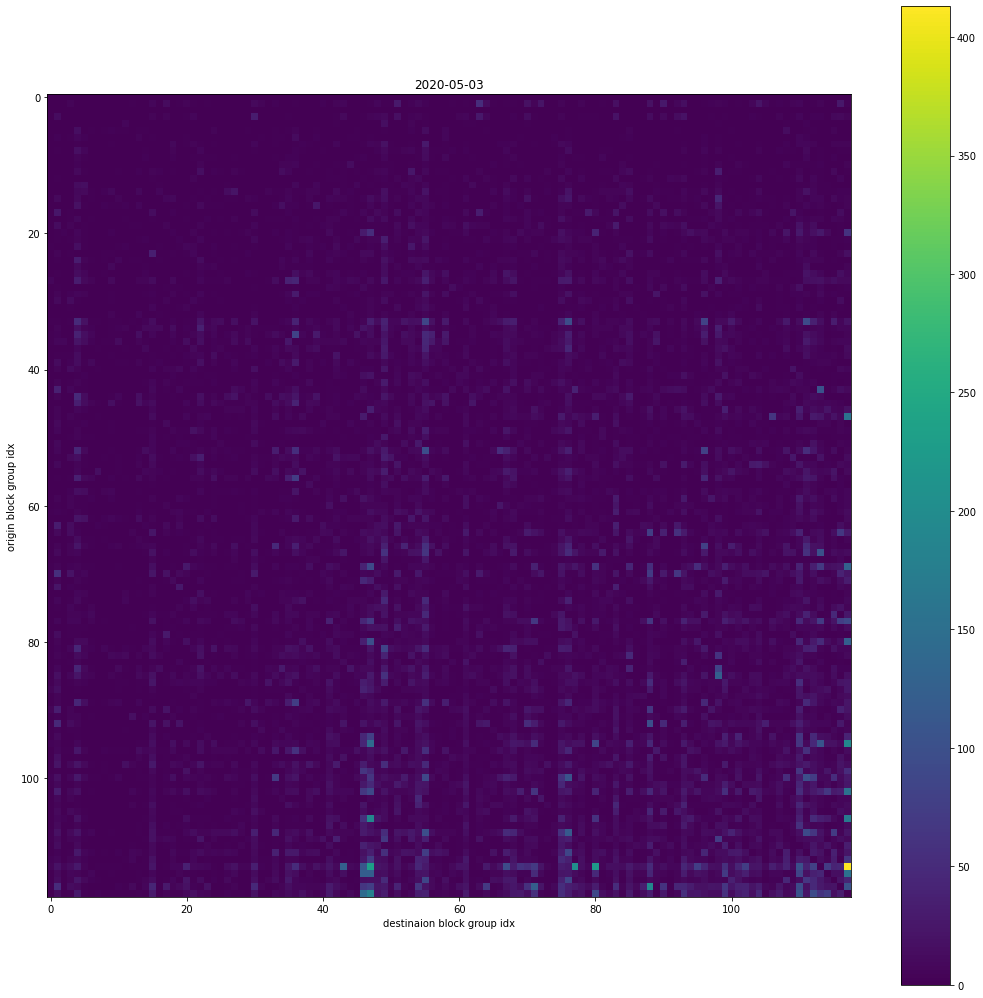

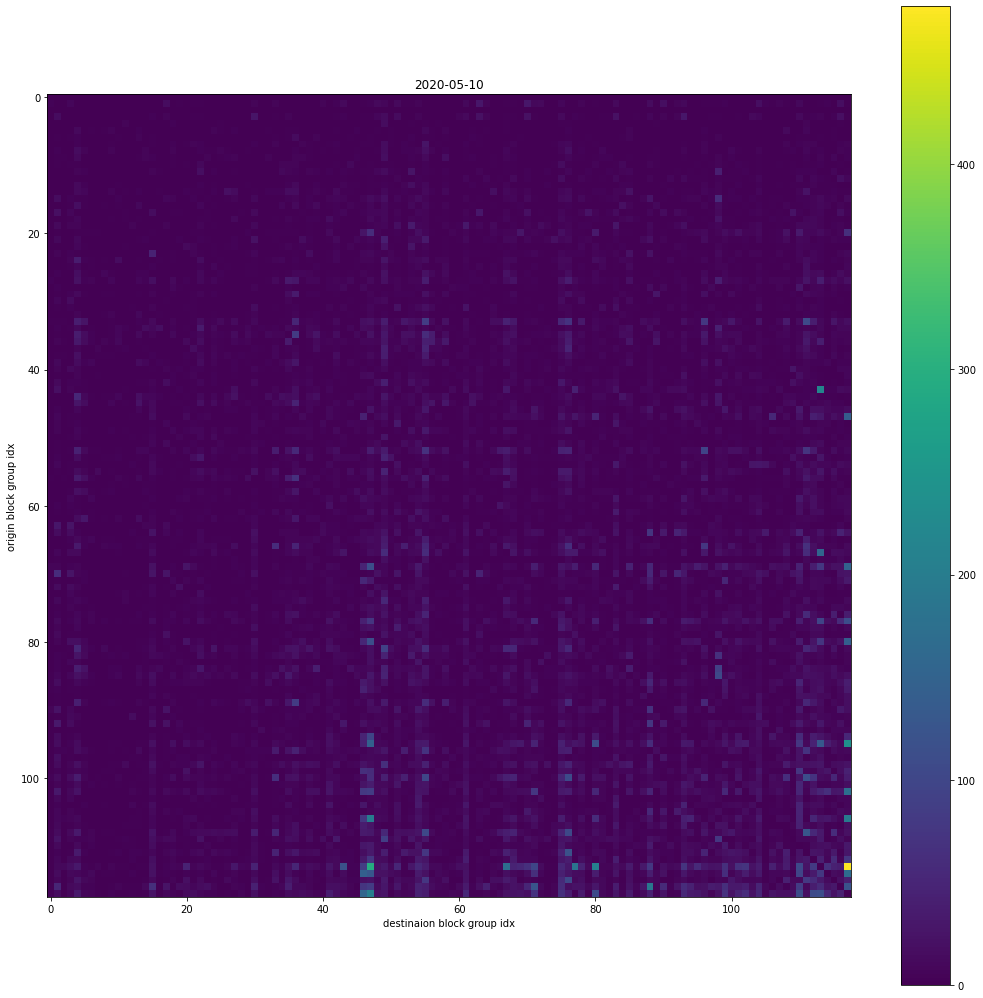

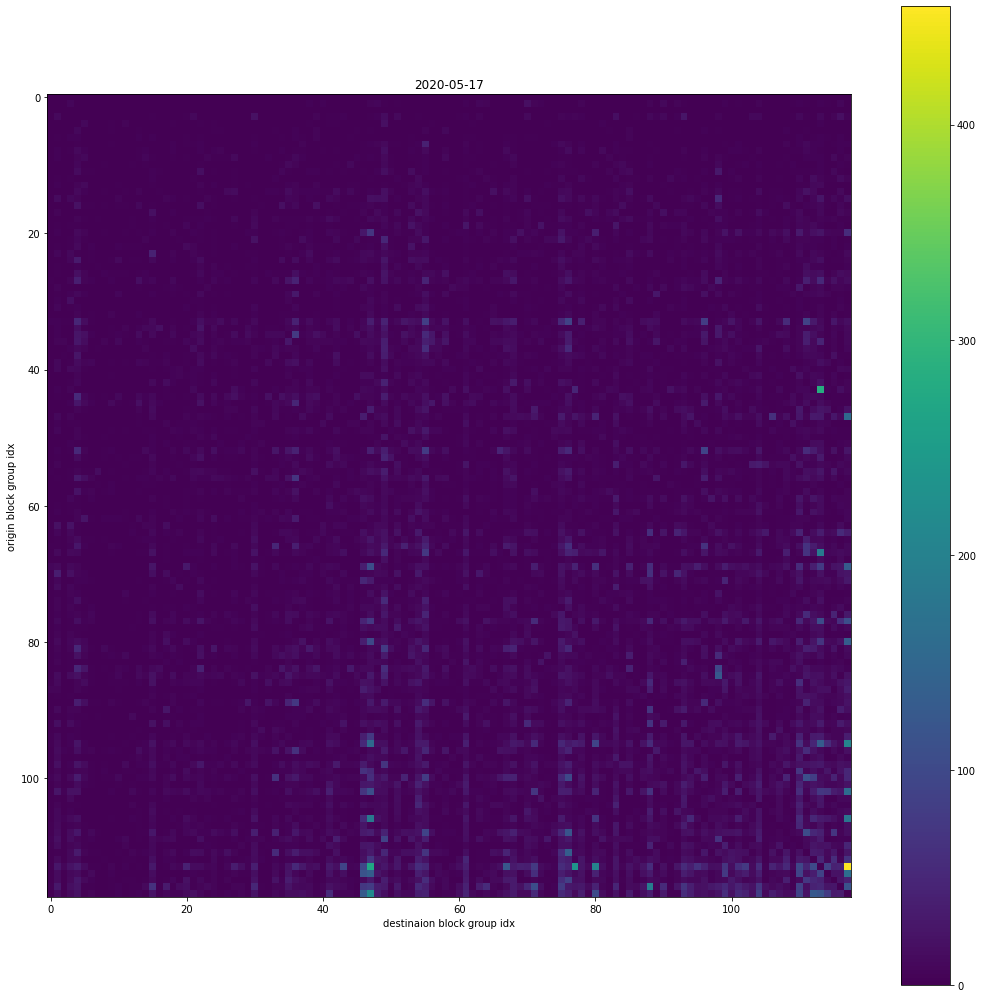

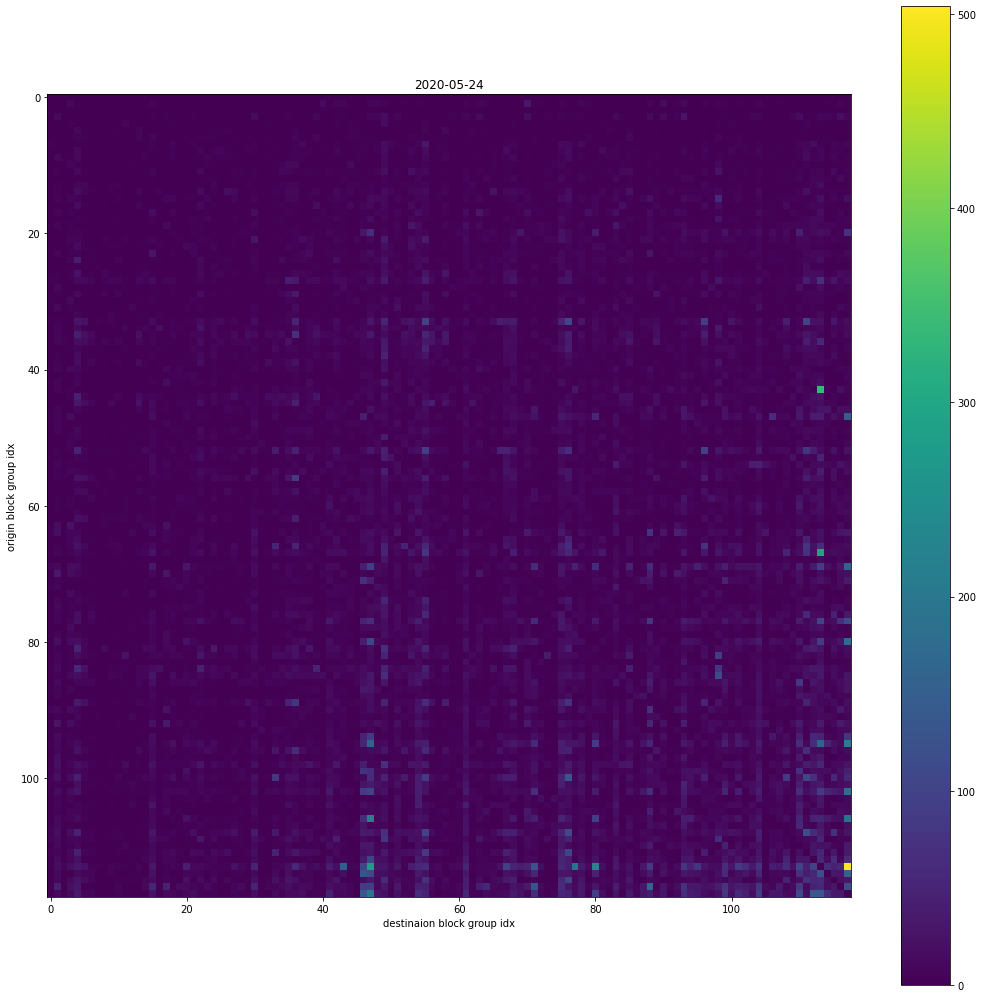

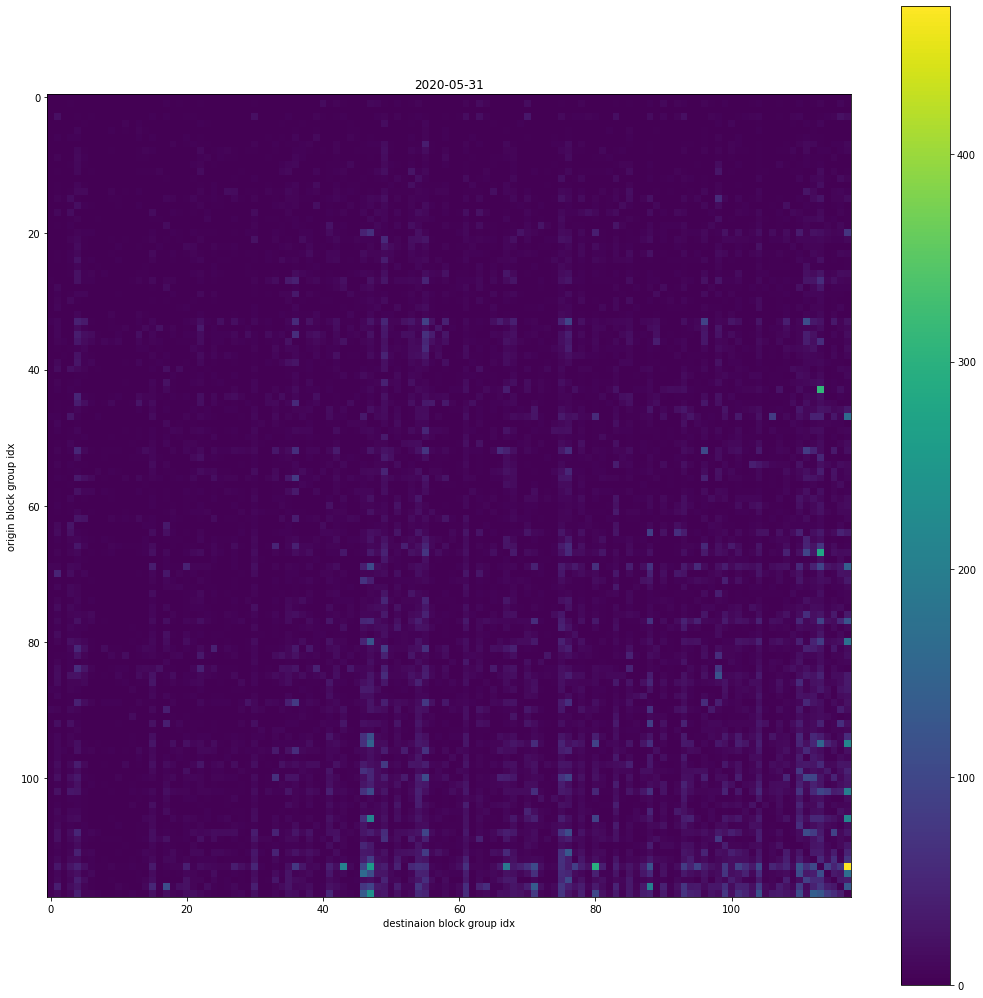

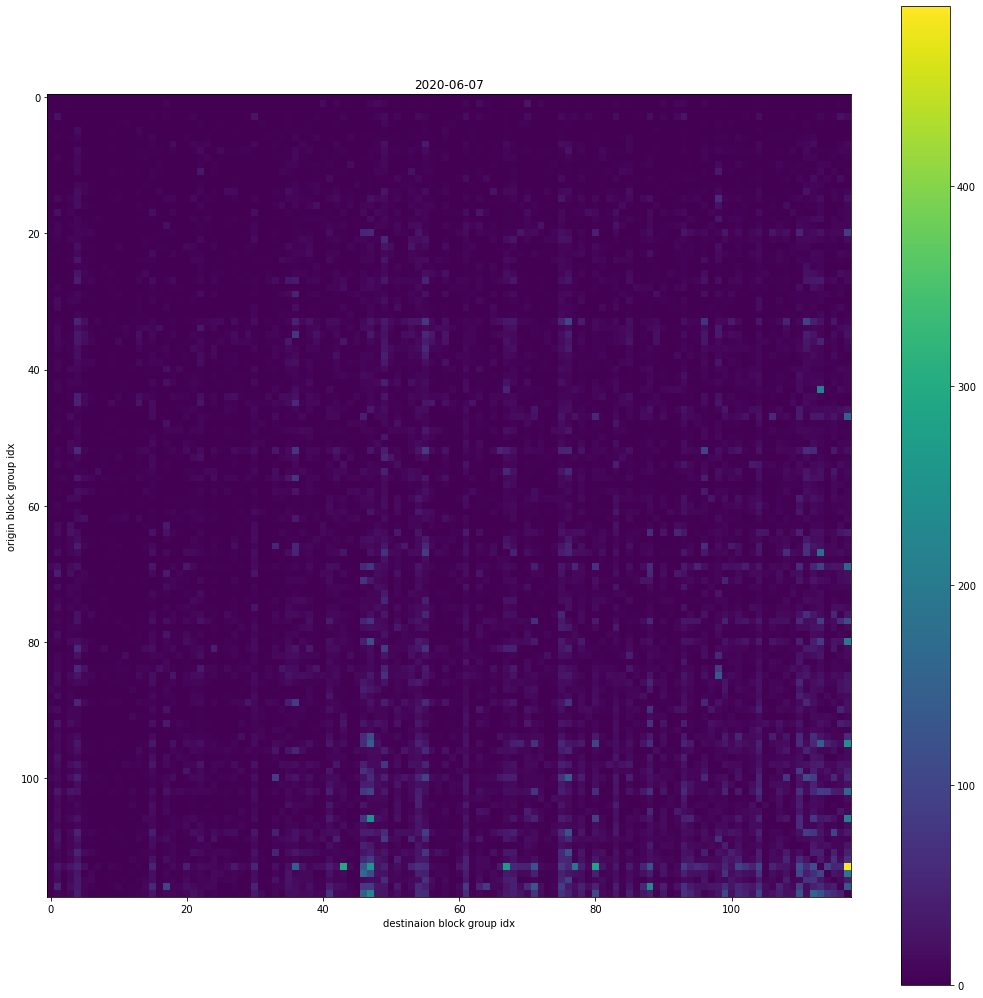

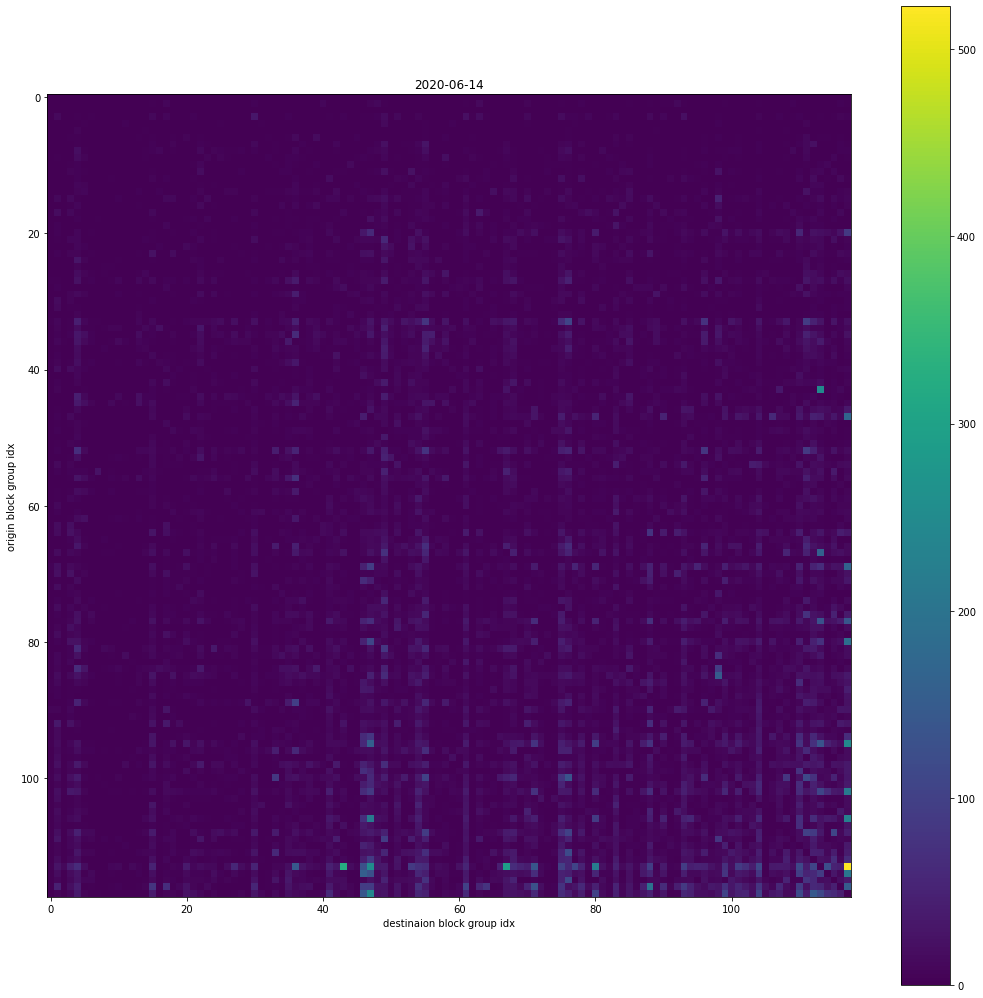

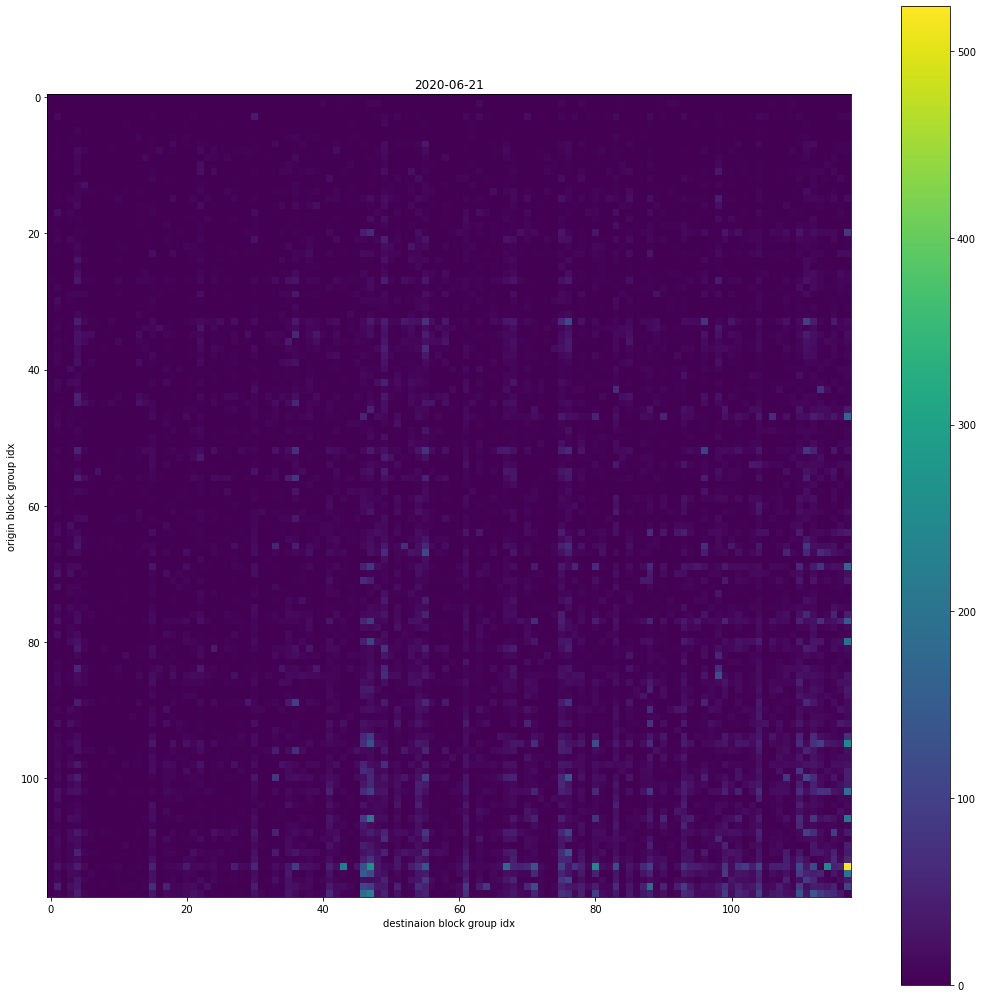

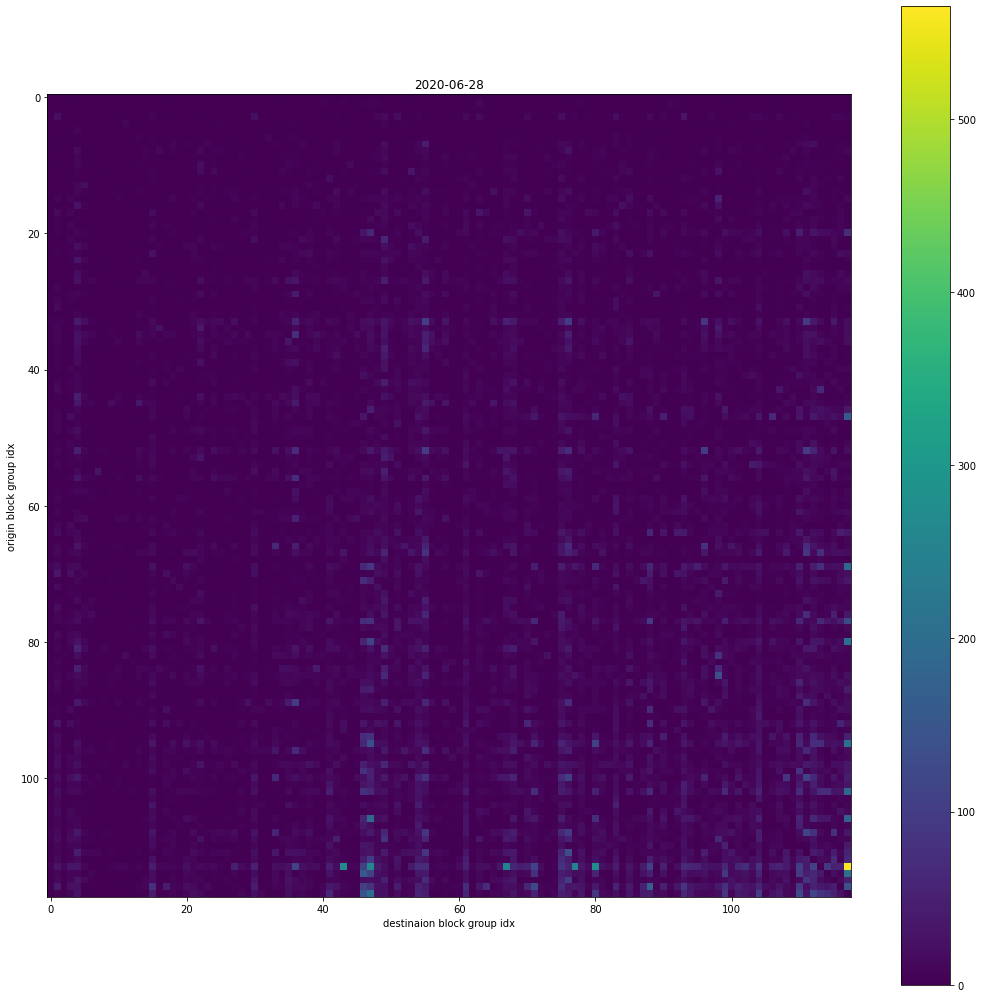

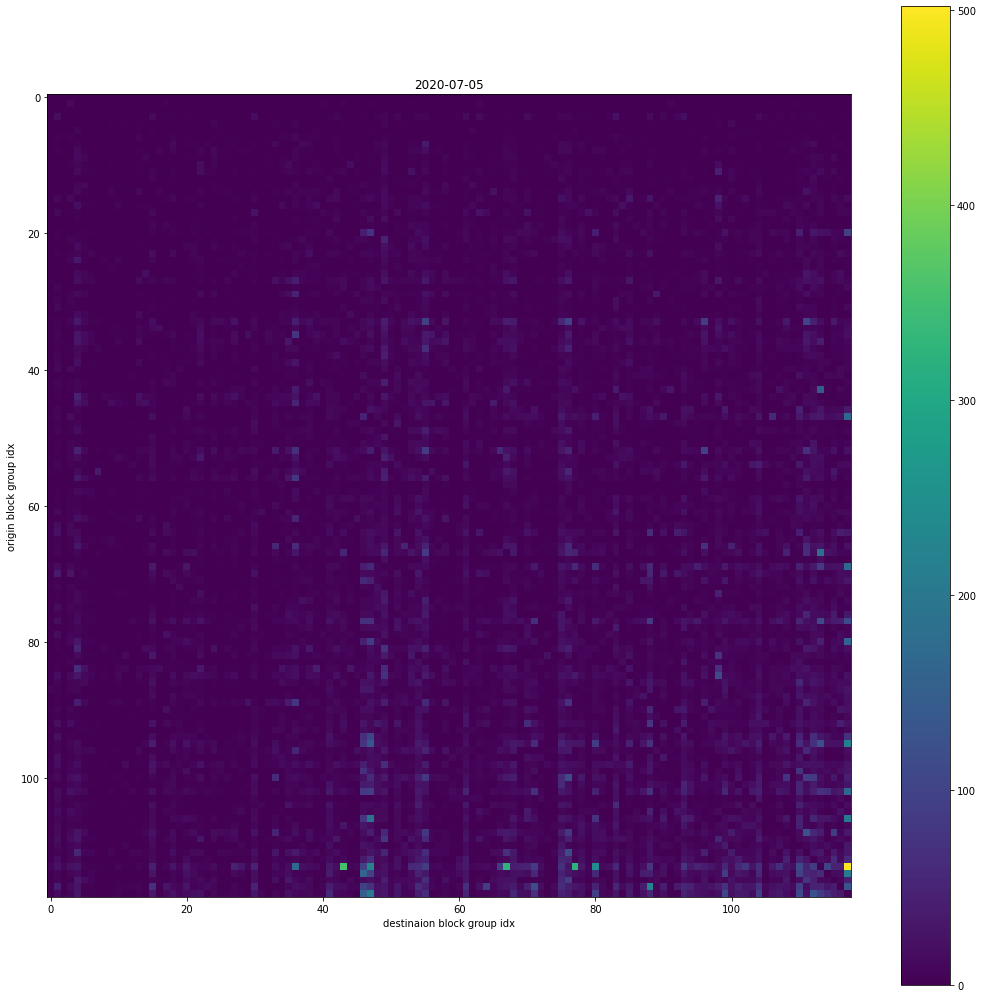

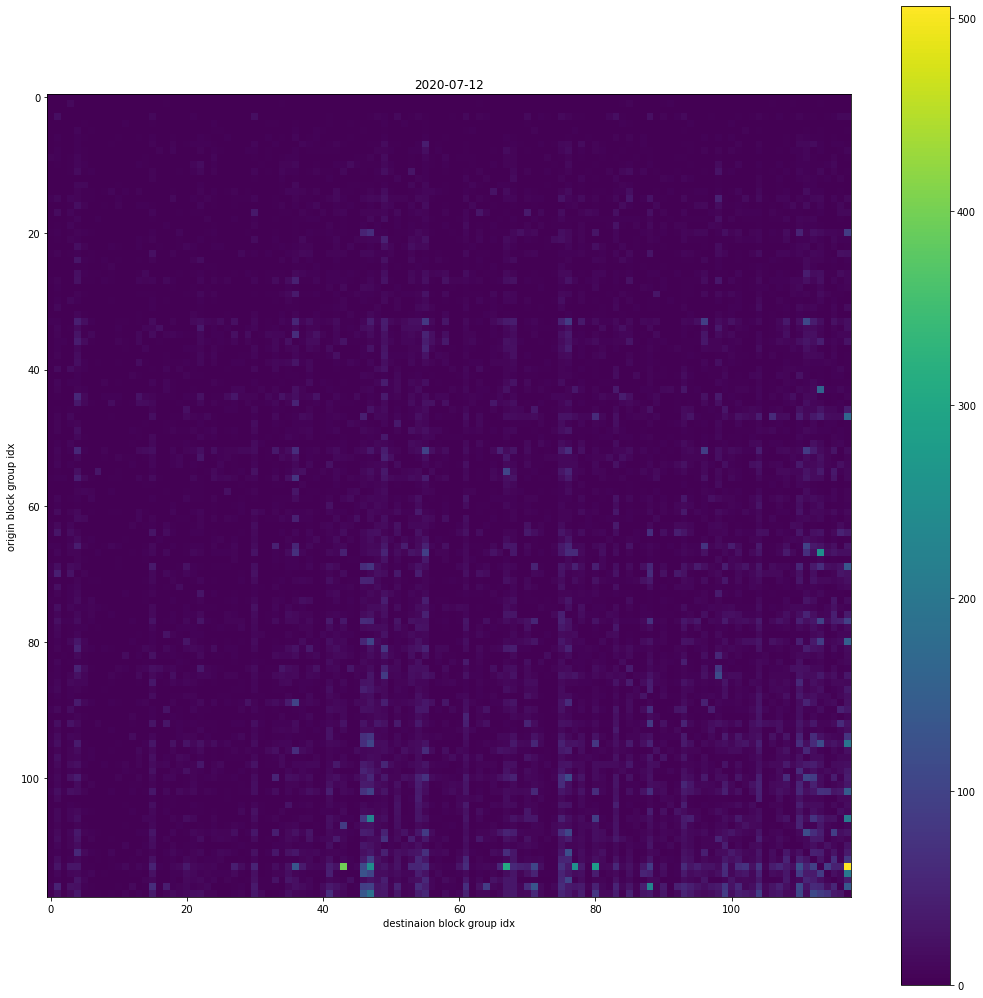

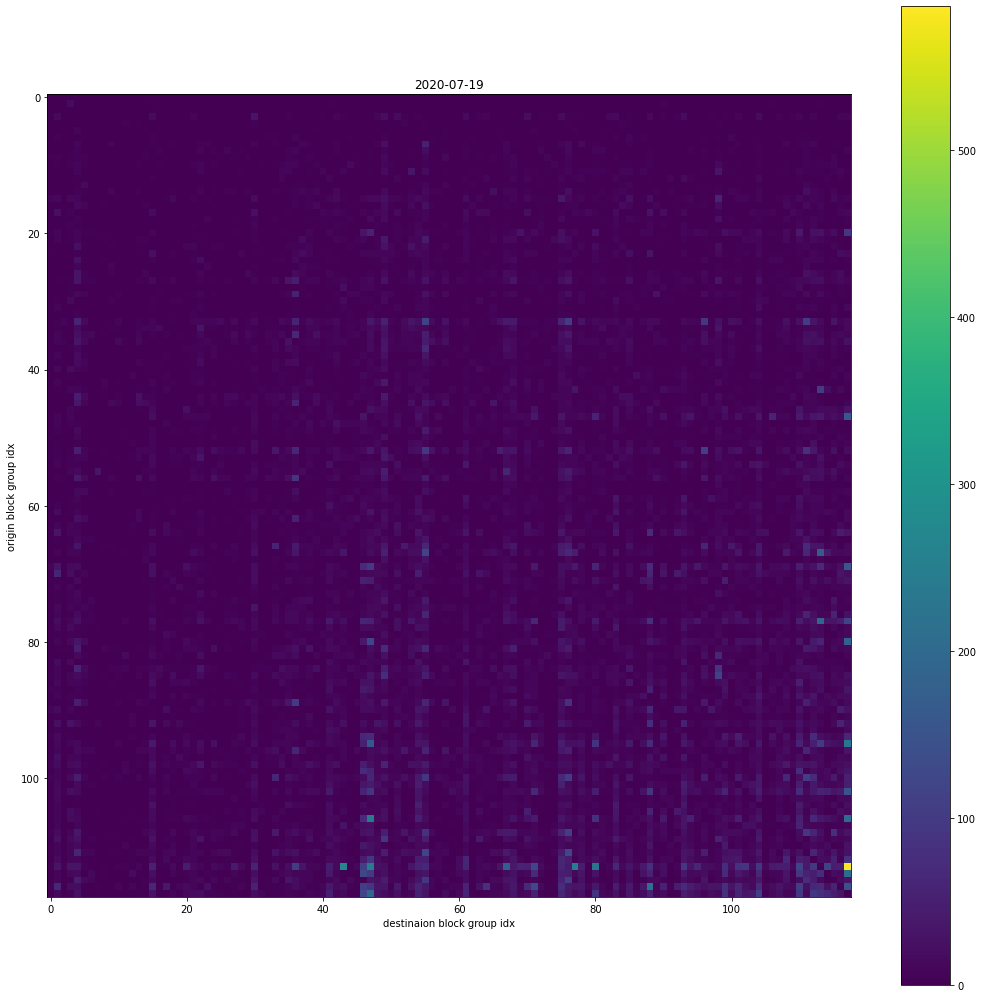

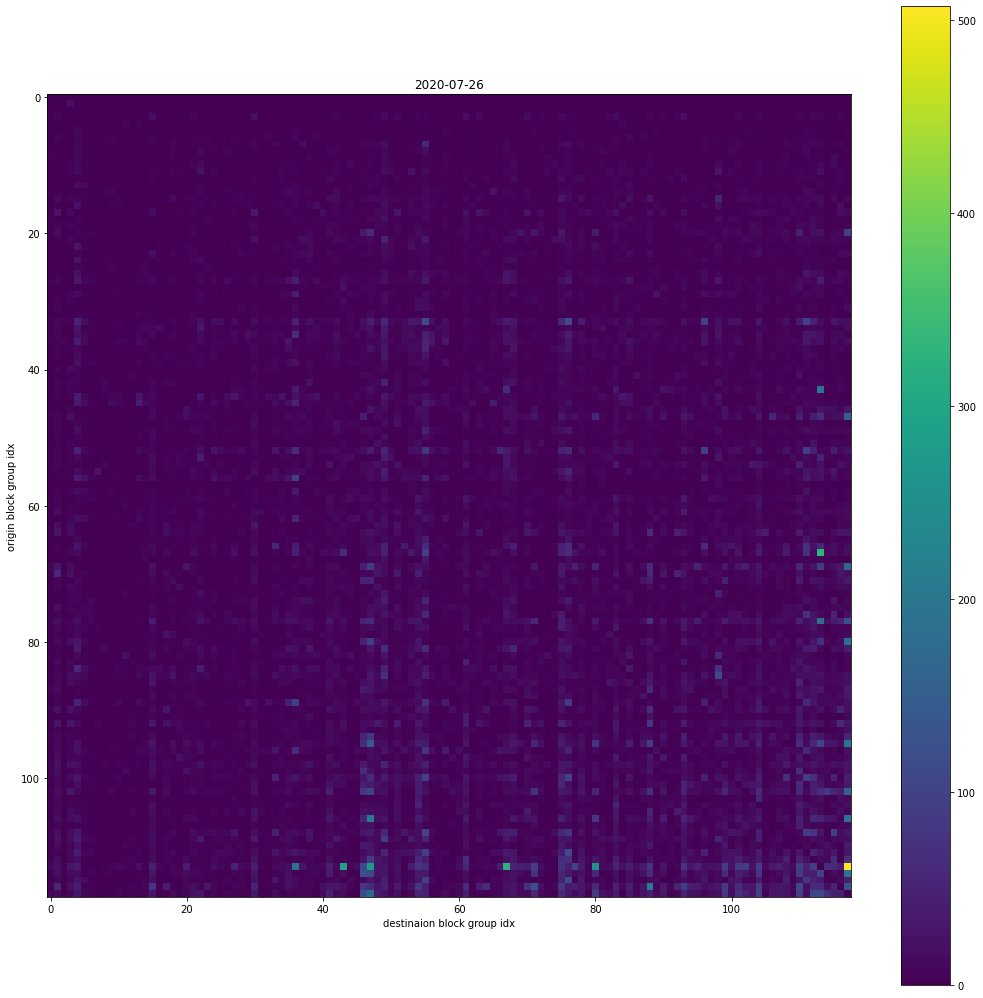

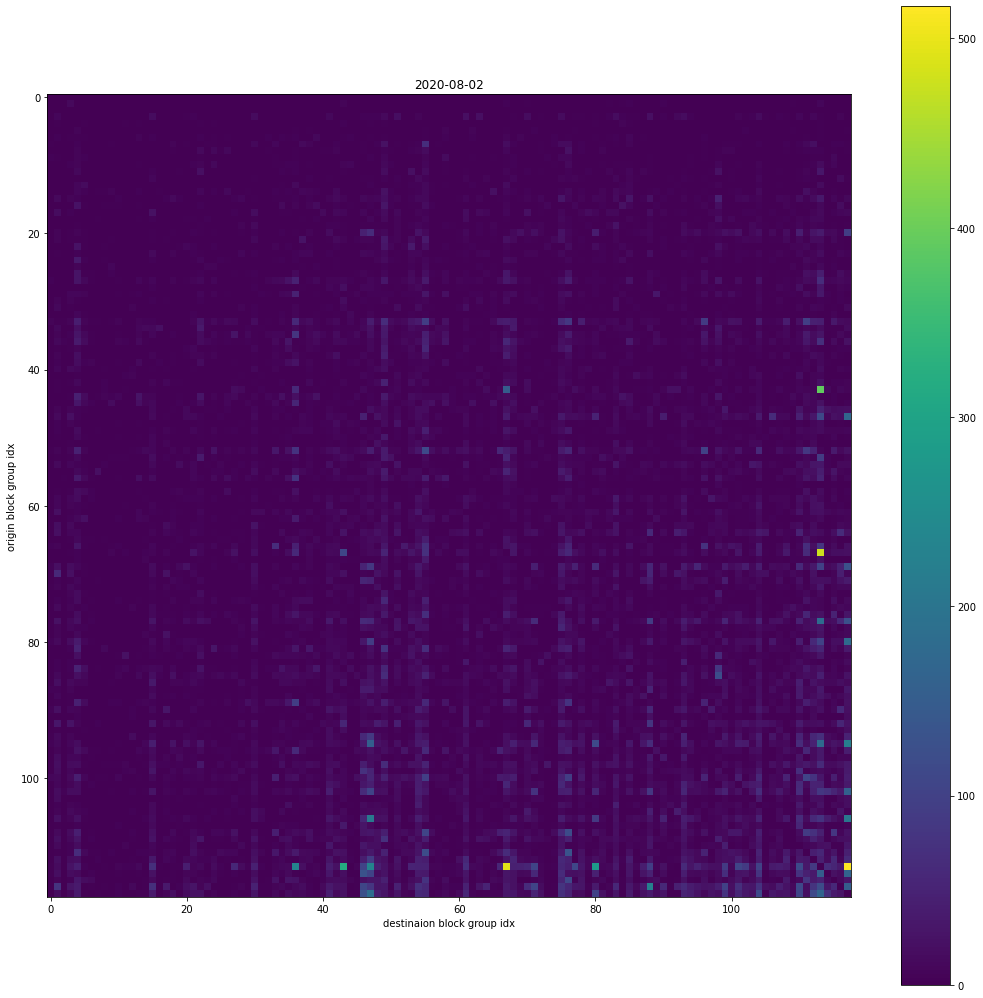

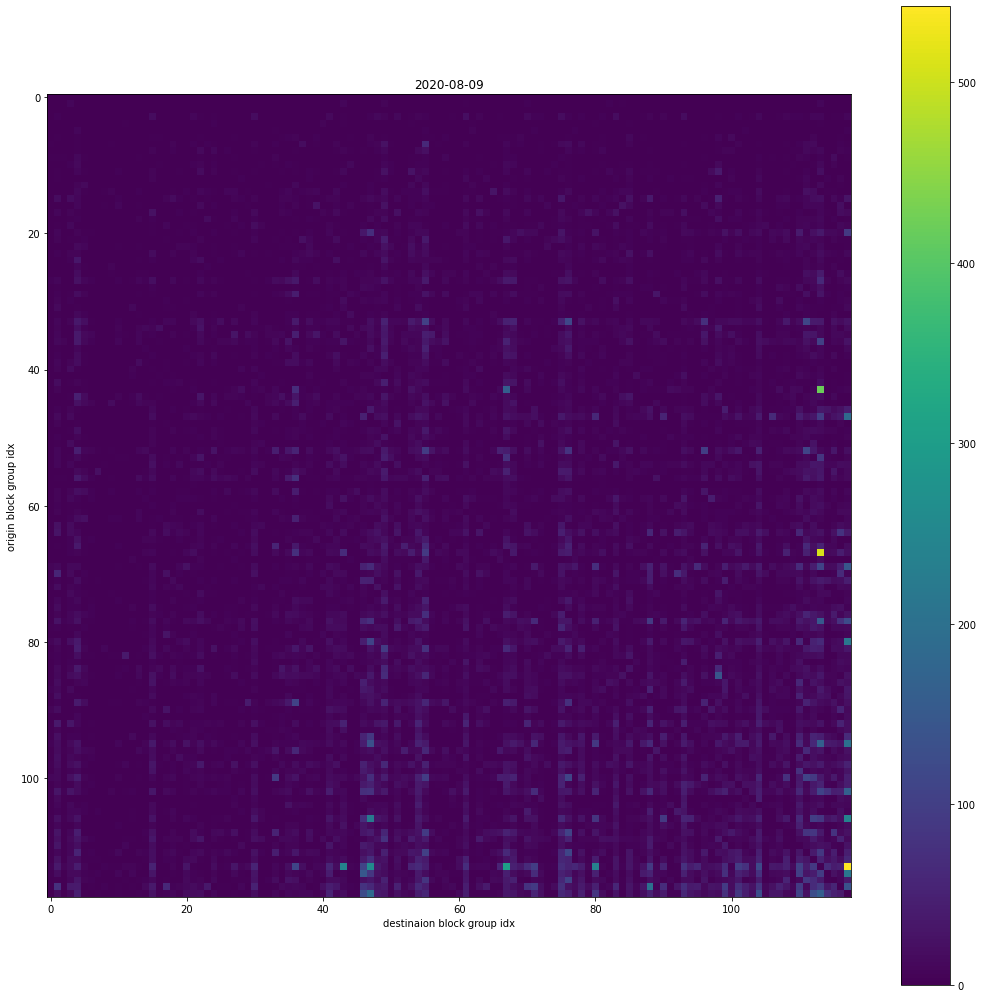

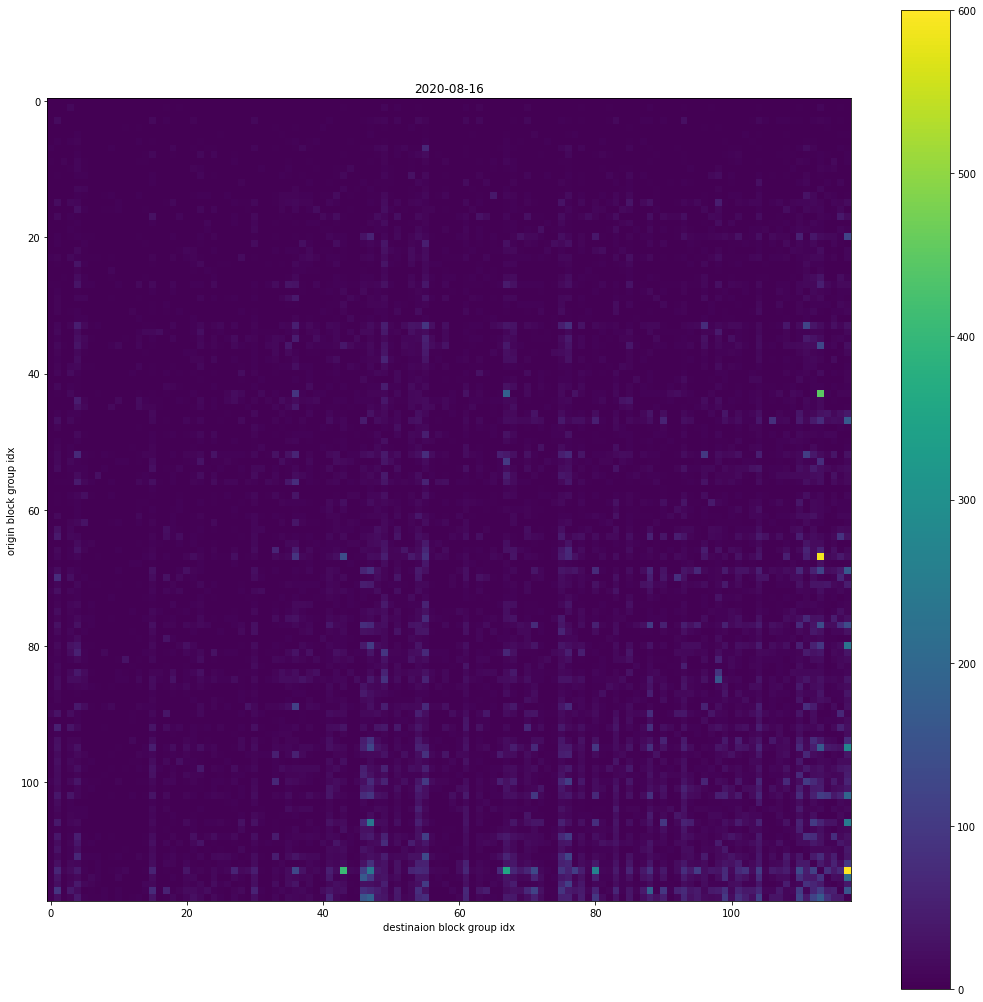

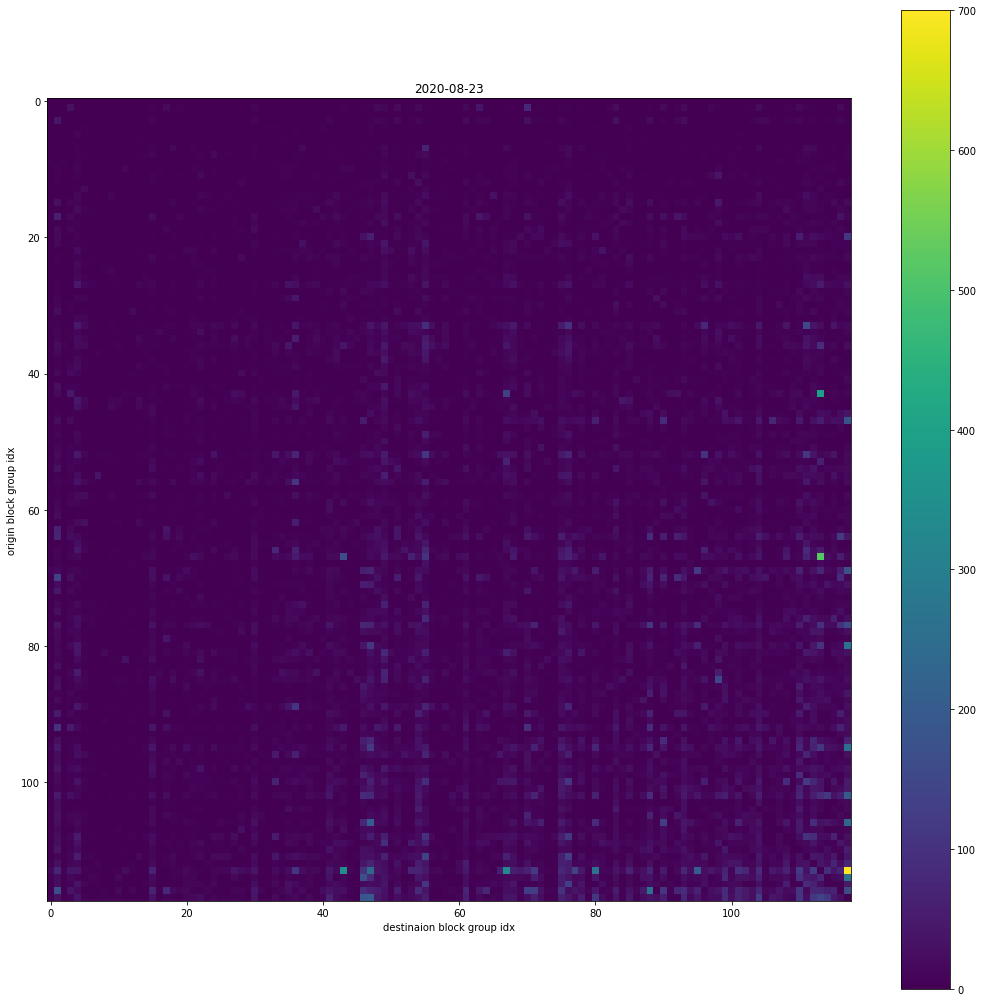

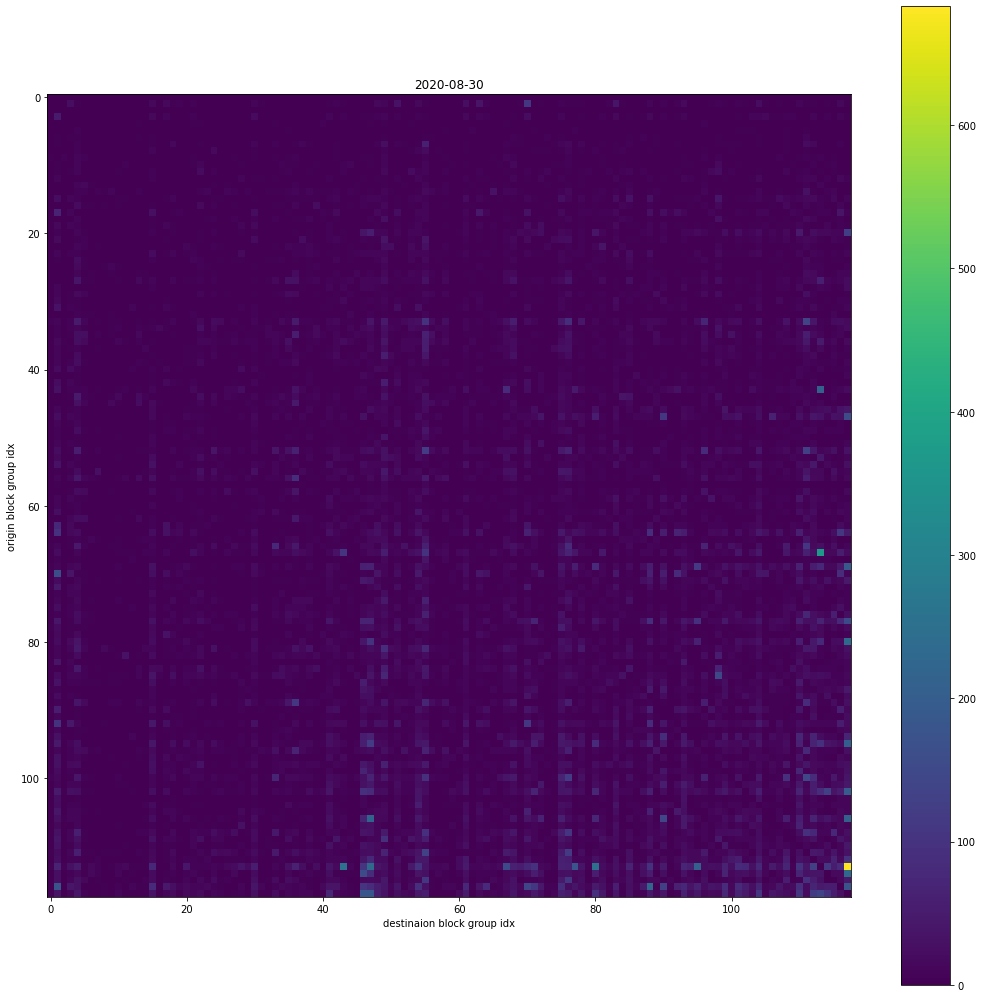

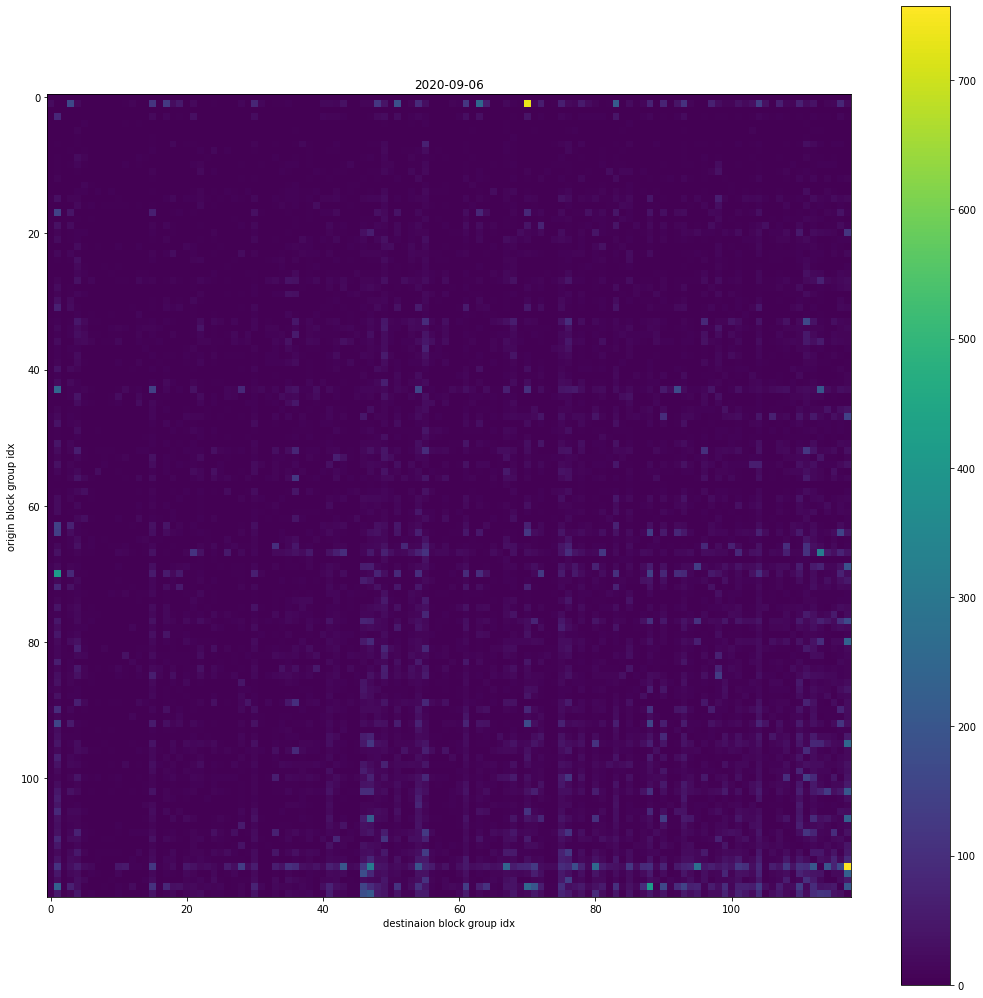

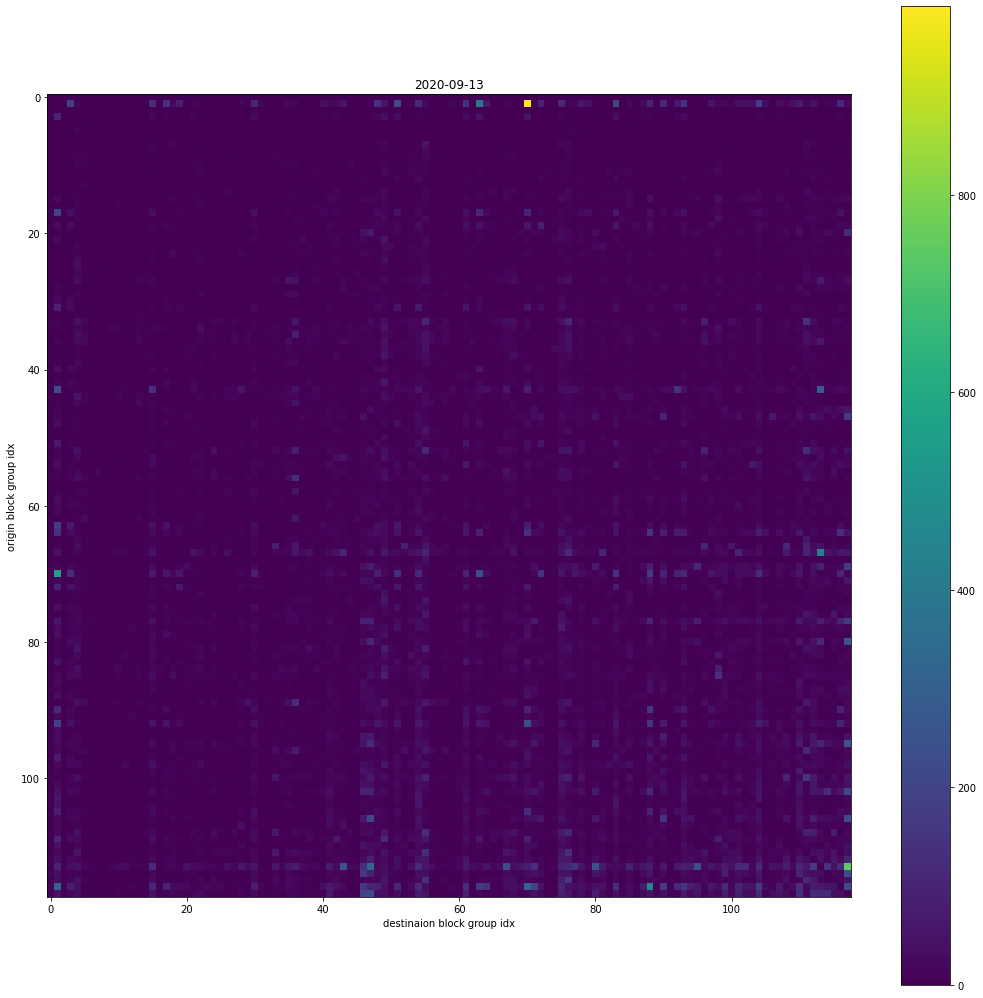

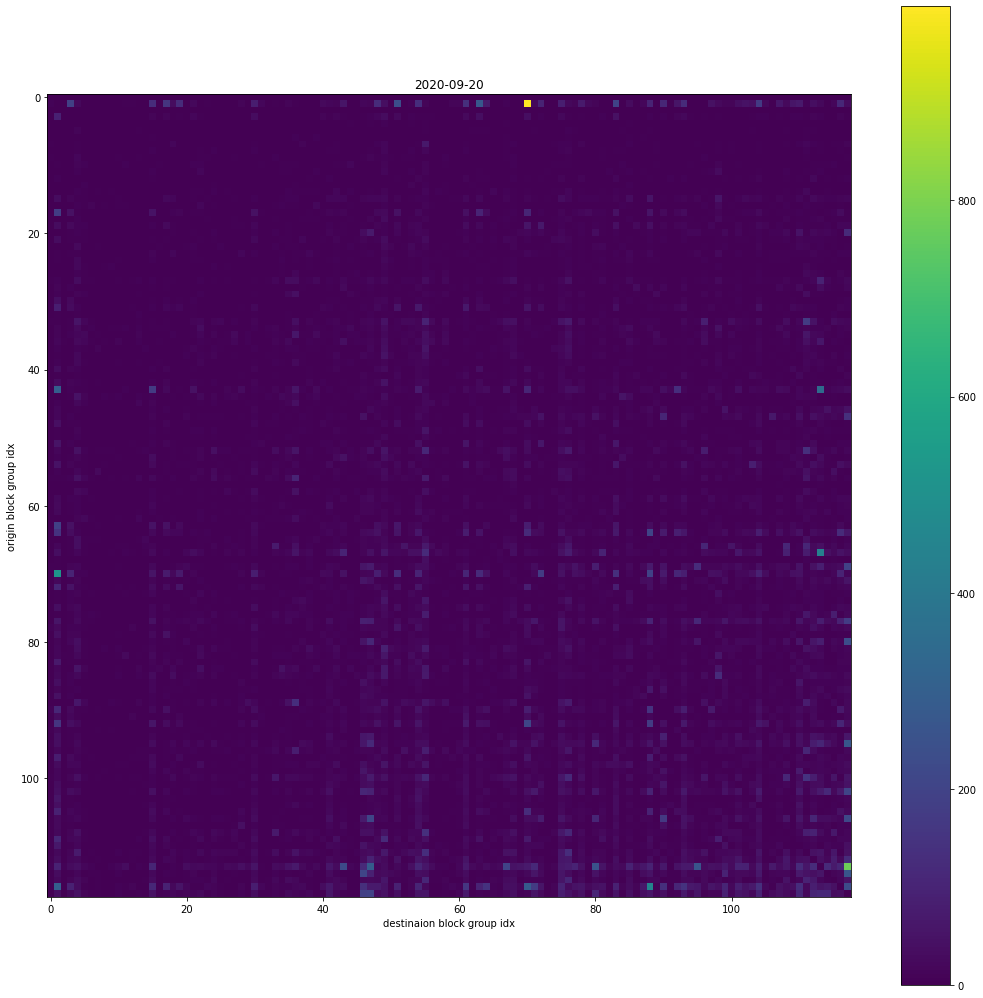

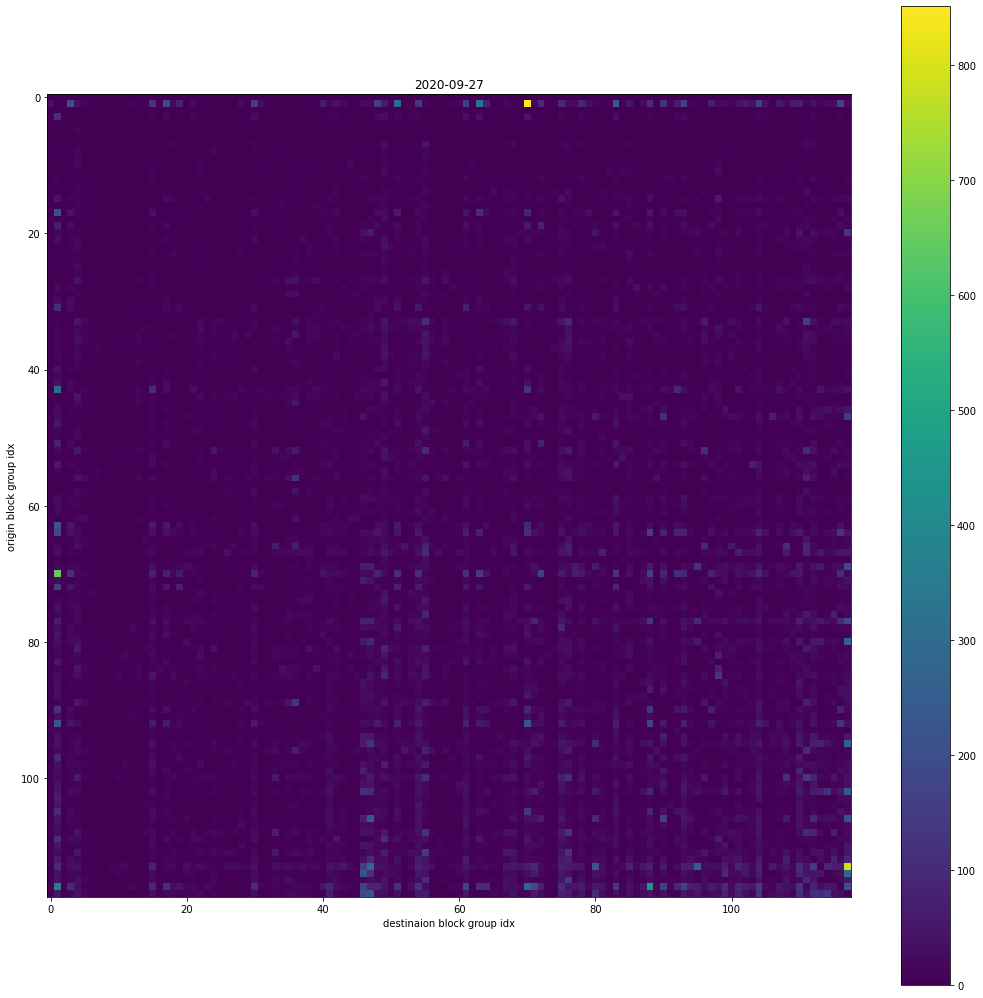

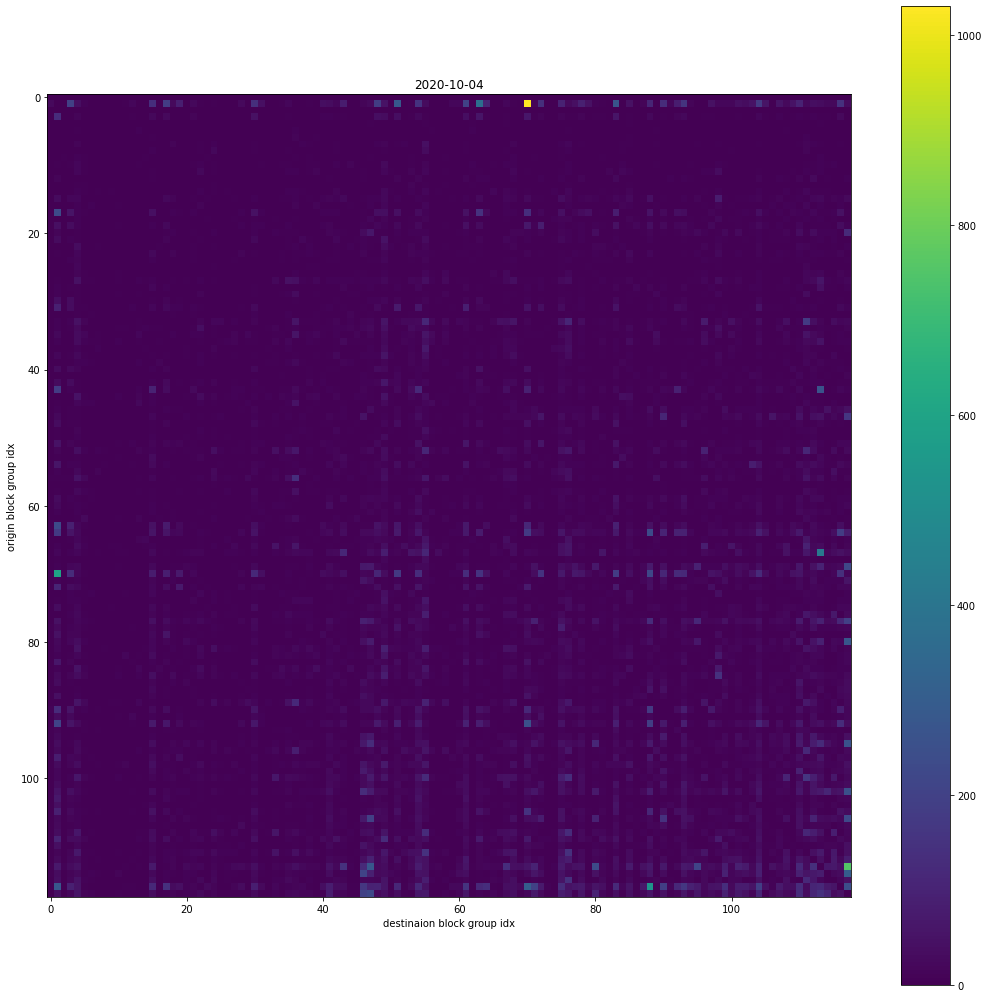

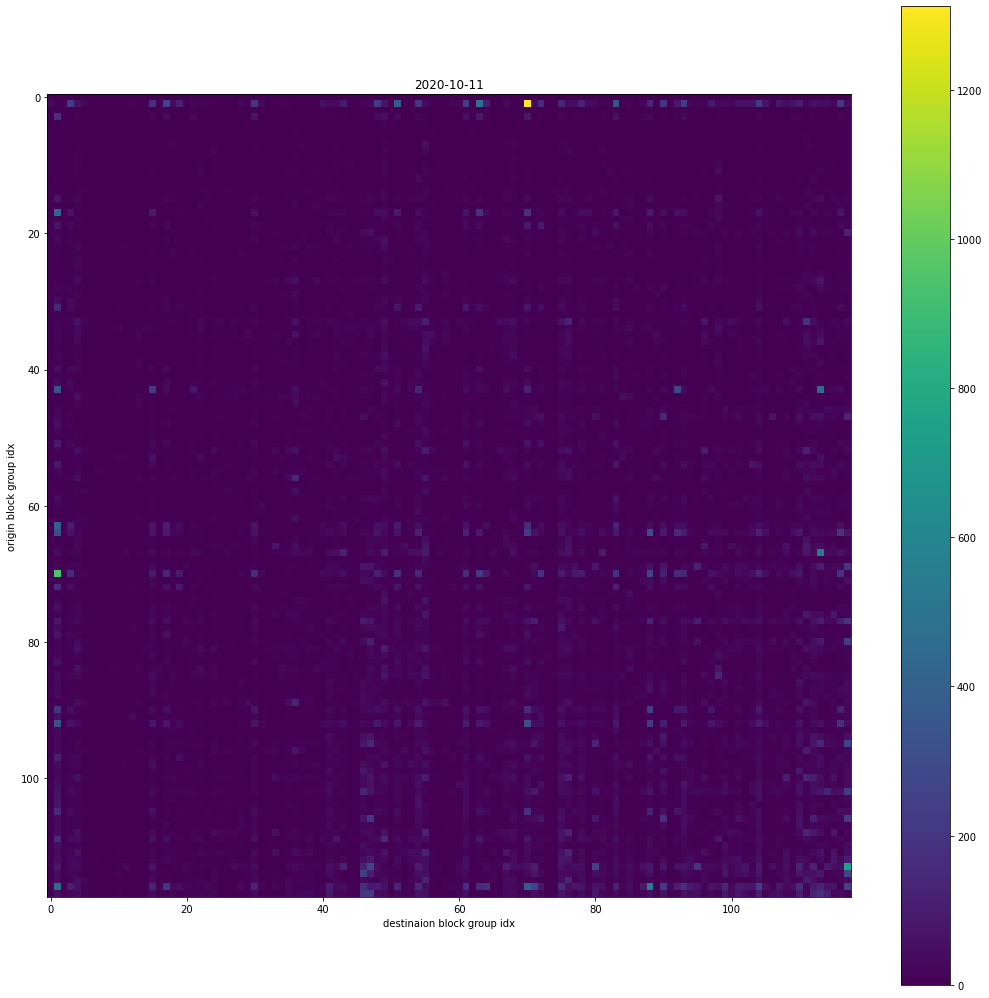

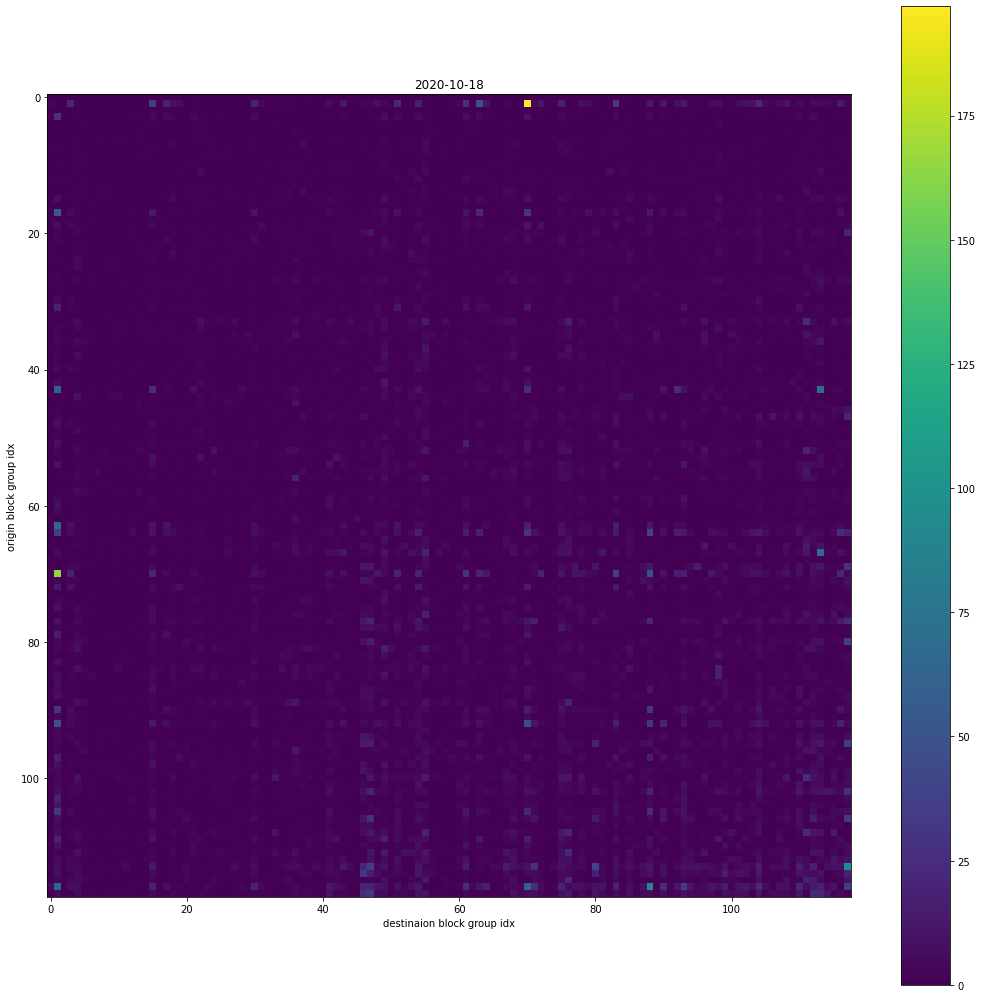

In [151]:

saved_path = r'E:\temp\SafeGraph\texas\brazos\figures_weeks'
for i in range(len(date_list)):
    fig = plt.figure(figsize=(18, 18))
    day_idx = i
    plt.title(date_list[day_idx])
    plt.xlabel("destinaion block group idx")
    plt.ylabel("origin block group idx")
    
    im = plt.imshow(mob_arr[day_idx], cmap='viridis')
    fig.colorbar(im)
    new_name = os.path.join(saved_path, date_list[day_idx] + "_no_self.png")
#     new_name = os.path.join(saved_path, date_list[day_idx] + ".png")

    plt.savefig(new_name)
    

In [150]:
#clean diagonal line

for i in range(mob_arr.shape[0]):
#     print(i)
    np.fill_diagonal(mob_arr[i, :, :], 0)

In [ ]:
out_county

In [ ]:
df_filtered[:]['count'].sum()

## generate movements

In [ ]:
import geopandas as gpd
from shapely import *

Get the points of block groups

In [ ]:
bg_pts = r'E:\temp\SafeGraph\USA_Block_Groups\USA_Block_Groups_pts.shp'
gdf = gpd.read_file(bg_pts)


In [ ]:
gdf_short = gdf[["FIPS", "POINT_X", "POINT_Y"]]

In [ ]:
gdf.dtypes

In [ ]:
gdf_short.dtypes

In [ ]:
df_filtered['origin'] = df_filtered['origin'].astype(str)
df_filtered['destination'] = df_filtered['destination'].astype(str)

In [ ]:
df_filtered.dtypes

In [ ]:
mergered = pd.merge(df_filtered, gdf_short, left_on="origin", right_on="FIPS")
mergered = mergered.rename(columns={"POINT_X": "origin_x", "POINT_Y": "origin_y", "FIPS": "FIPS_origin"})

mergered = pd.merge(mergered, gdf_short, left_on="destination", right_on="FIPS")
mergered = mergered.rename(columns={"POINT_X": "destination_x", "POINT_Y": "destination_y", "FIPS": "FIPS_destination"})

mergered

In [ ]:
saved_file = r'E:\temp\SafeGraph\texas\brazos\test\week_2019-04-01.shp'

from shapely.geometry import LineString
lines = []
for idx, row in mergered[:].iterrows():
#     print(row['origin_x'])
    line = LineString([(row['origin_x'], row["origin_y"]), (row["destination_x"], row["destination_y"])])
    lines.append(line) 

flow_lines = gpd.GeoDataFrame(mergered[:], geometry=lines)    
flow_lines.to_file(saved_file)

In [ ]:
gdf["POINT_X"]

In [ ]:
gdf["FIPS"]

## plot the daily data

In [ ]:
df_od['date'] = pd.to_datetime(df_od['date'], format="%Y-%m-%d")
# df_od['date'] =df_od['date'].to_datetime().date()

df_od

In [ ]:
origin_list = df_od['origin'].unique()
origin_list

In [ ]:

for idx, o in enumerate(origin_list):
    df_o = df_od[df_od['origin'] == o]
    df_o = df_o.sort_values("date")
    
    
    days = df_o["date"]
    f = plt.figure(figsize= (6, 6*118))
    ax = plt.subplot(len(origin_list), 1, idx + 1)
#     ax.title = "Block group ID: " + str(o)
    
    g = df_o.groupby(['date'])['count'].agg('sum') 
#     print(days)
    ax.plot(g.index, g.to_list())
#     plt.gcf().autofmt_xdate()
    
# plt.show()
    

In [ ]:
saved_path = r'E:\temp\SafeGraph\texas\brazos\mobility_out_of_blockgroup'

for idx, o in enumerate(origin_list):
    df_o = df_od[df_od['origin'] == o]
    df_o = df_o.sort_values("date")
    
    
    days = df_o["date"]
    f = plt.figure(figsize= (18, 6))
    
    plt.title("Block group ID: " + str(o))
    
    g = df_o.groupby(['date'])['count'].agg('sum') 
#     print(days)
    plt.plot(g.index, g.to_list())
    plt.gcf().autofmt_xdate()
    
    plt.ylabel('Sum of travels')
    
    new_name = os.path.join(saved_path, str(o) + ".png")
    
    plt.savefig(new_name)
    
    plt.show()
    


In [ ]:
df_o

In [ ]:
g = df_o.groupby(['date'])['count'].agg('sum') 

In [ ]:
g.index

In [ ]:
import matplotlib.pyplot as plt 
import matplotlib.dates as mdates


In [3]:
days

NameError: name 'days' is not defined

In [ ]:
 df_o["origin"]

In [ ]:
df_o

In [ ]:
g = df_od.groupby("count").count()
g

In [ ]:

for idx, row in joined.iterrows():
#     print(key, to_blocks[key])
#     print(row["destination_cbgs"])
    try:
        jdata = json.loads(row["destination_cbgs"])
        for key in jdata.keys():
#             pass
            fields = [row["origin_census_block_group"], int(key), jdata[key]]
            print(fields)
    except Exception as e:
        print( idx, e)

## Group by week 

In [55]:
csv_file =  r'E:\temp\SafeGraph\texas\brazos\origin-destination.csv'
df_od = pd.read_csv(csv_file, dtype={"origin":str, "destination":str})

In [97]:
df_od

origin   destination  count
date                                         
2019-01-01  480410019003  080690028022      2
2019-01-01  480410019003  510190302021      1
2019-01-01  480410019003  080690028031      2
2019-01-01  480410019003  483959604001      1
2019-01-01  480410019003  483130003001      1
...                  ...           ...    ...
2020-10-12  480410020021  480410001022      6
2020-10-12  480410020021  480410017012      1
2020-10-12  480410020021  483396939003      1
2020-10-12  480410020021  480519703002      1
2020-10-12  480410020021  480410018041      4

[8072134 rows x 3 columns]

In [99]:
df_od['date']  =  pd.to_datetime(df_od['date']) 

KeyError: 'date'

In [ ]:
df_od.dtypes


In [98]:
df_od = df_od.set_index("date")

KeyError: "None of ['date'] are in the columns"

In [70]:
test = df_od[:100]
test['pair'] = test['origin']  + "-" +  test['destination'] 

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [71]:
test

origin   destination  count                       pair
date                                                                    
2019-01-01  480410019003  080690028022      2  480410019003-080690028022
2019-01-01  480410019003  510190302021      1  480410019003-510190302021
2019-01-01  480410019003  080690028031      2  480410019003-080690028031
2019-01-01  480410019003  483959604001      1  480410019003-483959604001
2019-01-01  480410019003  483130003001      1  480410019003-483130003001
...                  ...           ...    ...                        ...
2019-01-01  480410009001  133130013003      1  480410009001-133130013003
2019-01-01  480410009001  480410002022      1  480410009001-480410002022
2019-01-01  480410009001  483396936002      1  480410009001-483396936002
2019-01-01  480410009001  480410001013      4  480410009001-480410001013
2019-01-01  480410009001  480410008002      2  480410009001-480410008002

[100 rows x 4 columns]

In [67]:
test.groupby(['pair'])

In [85]:
grouper = df_od.groupby([pd.Grouper(freq='1W'), 'origin', 'destination'])

In [86]:
re = grouper['count'].sum().reset_index()

In [96]:
re.to_csv(r"E:\temp\SafeGraph\texas\brazos\origin-destination_weekly.csv", index=False)

In [89]:
re['count'].sum()

26919758

In [90]:
df_od["count"].sum()

26919758

## H5py

In [12]:
import h5py
import pandas as pd
import glob

In [14]:
cgb_df = pd.read_csv(r'E:\temp\SafeGraph\blockgroup_ID_data.csv', dtype={"census_block_group": str})

In [15]:
cgb_list = cgb_df['census_block_group'].to_list()
cgb_list

['010010201001',
 '010010201002',
 '010010202001',
 '010010202002',
 '010010203001',
 '010010203002',
 '010010204001',
 '010010204002',
 '010010204003',
 '010010204004',
 '010010205001',
 '010010205002',
 '010010205003',
 '010010206001',
 '010010206002',
 '010010207001',
 '010010207002',
 '010010208011',
 '010010208012',
 '010010208021',
 '010010208022',
 '010010208023',
 '010010208024',
 '010010209001',
 '010010209002',
 '010010209003',
 '010010209004',
 '010010210001',
 '010010210002',
 '010010211001',
 '010010211002',
 '010010211003',
 '010030101001',
 '010030101002',
 '010030101003',
 '010030102001',
 '010030102002',
 '010030103001',
 '010030103002',
 '010030103003',
 '010030104001',
 '010030104002',
 '010030104003',
 '010030105001',
 '010030105002',
 '010030105003',
 '010030105004',
 '010030106001',
 '010030106002',
 '010030106003',
 '010030107011',
 '010030107012',
 '010030107013',
 '010030107014',
 '010030107031',
 '010030107032',
 '010030107041',
 '010030107042',
 '010030107051

### get gz files

In [16]:
csv_dir = r'E:\temp\SafeGraph\Social Distancing Metrics v2.1 (formerly Physical Distancing Metrics)\all\*.gz'
csv_files = glob.glob(csv_dir)
len(csv_files)

651

In [17]:
h5_dir = r'E:\temp\SafeGraph\h5_files'

In [18]:
cgb_dict

{'010010201001': 0,
 '010010201002': 1,
 '010010202001': 2,
 '010010202002': 3,
 '010010203001': 4,
 '010010203002': 5,
 '010010204001': 6,
 '010010204002': 7,
 '010010204003': 8,
 '010010204004': 9,
 '010010205001': 10,
 '010010205002': 11,
 '010010205003': 12,
 '010010206001': 13,
 '010010206002': 14,
 '010010207001': 15,
 '010010207002': 16,
 '010010208011': 17,
 '010010208012': 18,
 '010010208021': 19,
 '010010208022': 20,
 '010010208023': 21,
 '010010208024': 22,
 '010010209001': 23,
 '010010209002': 24,
 '010010209003': 25,
 '010010209004': 26,
 '010010210001': 27,
 '010010210002': 28,
 '010010211001': 29,
 '010010211002': 30,
 '010010211003': 31,
 '010030101001': 32,
 '010030101002': 33,
 '010030101003': 34,
 '010030102001': 35,
 '010030102002': 36,
 '010030103001': 37,
 '010030103002': 38,
 '010030103003': 39,
 '010030104001': 40,
 '010030104002': 41,
 '010030104003': 42,
 '010030105001': 43,
 '010030105002': 44,
 '010030105003': 45,
 '010030105004': 46,
 '010030106001': 47,
 '

In [19]:
cgb_dict = {}
for idx, bg in enumerate(cgb_list):
    cgb_dict[bg] = idx

In [ ]:
# dgroup = f.create_group("o-d_cnts")


In [22]:
import json
import os
lines = []
for idx, file in enumerate(csv_files[:1]):
    try:
        
        basename = os.path.basename(file) 
        date = basename[:10]

        try:
            new_name = r"{}\{}.h5".format(h5_dir, date)
            f = h5py.File(new_name, 'w')
            dset = f.create_dataset(date, (230000, 230000), dtype='int64', chunks=(100, 100), compression="gzip")
        except:
            print("Date exists:", new_name)
            

        df = pd.read_csv(file, dtype={"origin_census_block_group": str})
        
        print("Processing: ", idx, file, len(df))
        
        log_interval = 10000

        for idx2, row in df.iterrows():  # for each origin block group
            try:
                
                if idx2 % log_interval == 0:
                    print("Processing row: ", idx2)
                    
                jdata = json.loads(row["destination_cbgs"])
                origin = str(row["origin_census_block_group"])

                o_idx = cgb_dict[origin]
#                 o_idx = 0

                for key in jdata.keys():
                    try:
                        des = str(key)
                        d_idx = cgb_dict[des]
#                         d_idx = 0
                        dset[o_idx, d_idx] = jdata[key]     
 
                    except:
                        print("cannot find the destination block group:", des)
                        continue
    #                 print(fields)

            except Exception as e:
                print("cannot find the origin block group:", origin)
                print(idx, idx2, e)
                continue
        f.close()
        
    except Exception as e:
        print("Error in processing file:", file)
        print(idx, idx2, e)
        f.close()
        continue

Processing:  0 E:\temp\SafeGraph\Social Distancing Metrics v2.1 (formerly Physical Distancing Metrics)\all\2019-01-01-social-distancing.csv.gz 219490
Processing row:  0
cannot find the destination block group: 060376007031
cannot find the destination block group: 120950136062
cannot find the destination block group: 150030077022
cannot find the destination block group: 170310307011
cannot find the destination block group: 170318048032
cannot find the destination block group: 240317008171
cannot find the destination block group: 120860078011
cannot find the destination block group: 340130204004
cannot find the destination block group: 010890106223
cannot find the destination block group: 261390202002
cannot find the destination block group: 480610119012
cannot find the destination block group: 261635395002
cannot find the destination block group: 261635512004
cannot find the destination block group: 281559501003
cannot find the destination block group: 131530211054
cannot find the desti


KeyboardInterrupt



In [21]:
f.close()

In [ ]:
o_idx = cgb_list.index("260650044032")
o_idx

In [ ]:
h5py.run_tests()


In [ ]:
with h5py.File(r"E:\temp\SafeGraph\Matrix.hdf5", 'w') as f:
    dset = f.create_dataset("block_group", (220000, 220000))
    dset[0, 0] = 1
    